In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from numpy.linalg import norm 

import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data_final.csv', low_memory = False)

In [3]:
data.drop(columns = data.columns[0], inplace = True)
data

code  \
0             00000000000000225   
1        0000000000000207025004   
2          00000000000003429145   
3          00000000000026772226   
4                 0000000000017   
...                         ...   
2653072               999999999   
2653073           9999999990397   
2653074              9999999999   
2653075           9999999999994   
2653076         999999999999999   

                                                       url  \
0        http://world-en.openfoodfacts.org/product/0000...   
1        http://world-en.openfoodfacts.org/product/0000...   
2        http://world-en.openfoodfacts.org/product/0000...   
3        http://world-en.openfoodfacts.org/product/0000...   
4        http://world-en.openfoodfacts.org/product/0000...   
...                                                    ...   
2653072  http://world-en.openfoodfacts.org/product/9999...   
2653073  http://world-en.openfoodfacts.org/product/9999...   
2653074  http://world-en.openfoodfacts.org/product/9999...   
2653075  http://world-en.openfoodfacts.org/product/9999...   
2653076  http://world-en.openfoodfacts.org/product/9999...   

        last_modified_datetime               product_name  \
0         2021-06-16T14:53:29Z             jeunes pousses   
1         2022-07-04T15:30:13Z                      Andrè   
2         2022-06-29T07:35:06Z                    L.casei   
3         2022-06-03T15:34:34Z                       Skyr   
4         2019-06-25T11:55:18Z           Vitória crackers   
...                        ...                        ...   
2653072   2020-12-16T07:58:24Z    Thé noir BIO Darjeeling   
2653073   2020-02-25T15:24:07Z                       Fati   
2653074   2022-10-24T08:16:58Z            Duschgel - Iris   
2653075   2022-08-12T18:53:41Z  Light & Free SKYR A BOIRE   
2653076   2020-11-16T20:24:55Z          Signal Toothpaste   

                                                categories nutriscore_grade  \
0                                                      NaN              NaN   
1                                                      NaN              NaN   
2                                                      NaN              NaN   
3        Produits laitiers, Desserts, Produits fermenté...                a   
4                                                      NaN              NaN   
...                                                    ...              ...   
2653072                                                NaN              NaN   
2653073                                                NaN              NaN   
2653074                                                NaN              NaN   
2653075  Produits laitiers, Desserts, Produits fermenté...                e   
2653076   Non food products, Open Beauty Facts, Toothpaste              NaN   

               food_groups                                          image_url  \
0                      NaN                                                NaN   
1                      NaN                                                NaN   
2                      NaN  https://images.openfoodfacts.org/images/produc...   
3        en:dairy-desserts  https://images.openfoodfacts.org/images/produc...   
4                      NaN  https://images.openfoodfacts.org/images/produc...   
...                    ...                                                ...   
2653072                NaN                                                NaN   
2653073                NaN  https://images.openfoodfacts.org/images/produc...   
2653074                NaN  https://images.openfoodfacts.org/images/produc...   
2653075  en:dairy-desserts  https://images.openfoodfacts.org/images/produc...   
2653076                NaN  https://images.openfoodfacts.org/images/produc...   

                                           image_small_url  sugars_100g  \
0                                                      NaN    12.823337   
1                                                      N

In [4]:
data["categories"].isnull().sum()/data.shape[0]

0.5863881824764227

In [8]:
data.describe().astype('float')

sugars_100g    fiber_100g  energy-kcal_100g      fat_100g  \
count  2.653077e+06  2.653077e+06      2.653077e+06  2.653077e+06   
mean   1.283741e+01  3.788534e+00      2.638624e+02  1.337839e+01   
std    1.723757e+01  4.463189e+00      1.734878e+02  1.580781e+01   
min    0.000000e+00  4.440892e-16     -5.300000e+01  0.000000e+00   
25%    1.000000e+00  1.000000e+00      1.200000e+02  1.330000e+00   
50%    7.142857e+00  3.082119e+00      2.698056e+02  1.200000e+01   
75%    1.282334e+01  4.400000e+00      3.660000e+02  1.660000e+01   
max    1.000000e+02  4.490000e+01      9.998100e+02  1.000000e+02   

       saturated-fat_100g  cholesterol_100g     salt_100g   sodium_100g  
count        2.653077e+06      2.653077e+06  2.653077e+06  2.653077e+06  
mean         4.883243e+00      4.226298e-02  1.618883e+00  6.540343e-01  
std          6.954662e+00      1.035672e-01  4.683658e+00  1.927628e+00  
min          0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00  
25%          2.000000e-01      0.000000e+00  1.400000e-01  5.600000e-02  
50%          3.200000e+00      1.900542e-02  9.825000e-01  3.930000e-01  
75%          4.989548e+00      2.820000e-02  1.390133e+00  5.596743e-01  
max          1.000000e+02      3.333000e+00  1.000000e+02  4.998720e+01

In [5]:
data_float = data.select_dtypes(include=['float64'])
data_float.set_index(data['product_name'], inplace = True)
data_float

sugars_100g  fiber_100g  energy-kcal_100g  \
product_name                                                           
jeunes pousses               12.823337    3.082119        269.805561   
Andrè                        12.600000    3.000000        165.000000   
L.casei                       9.800000    7.466667         99.666667   
Skyr                          3.900000    0.600000         57.000000   
Vitória crackers             15.000000   23.166667        375.000000   
...                                ...         ...               ...   
Thé noir BIO Darjeeling      12.823337    3.082119        269.805561   
Fati                          0.600000    1.866667         24.000000   
Duschgel - Iris              12.823337    3.082119        269.805561   
Light & Free SKYR A BOIRE    49.000000    6.000000         24.000000   
Signal Toothpaste            12.823337    3.082119        269.805561   

                            fat_100g  saturated-fat_100g  cholesterol_100g  \
product_name                                                                 
jeunes pousses             13.627047            4.989548          0.019005   
Andrè                       2.000000            2.000000          0.036667   
L.casei                     1.400000            0.900000          0.084333   
Skyr                        0.200000            0.100000          0.004000   
Vitória crackers            7.000000            3.080000          0.003000   
...                              ...                 ...               ...   
Thé noir BIO Darjeeling    13.627047            4.989548          0.019005   
Fati                        0.300000            0.000000          0.002000   
Duschgel - Iris            13.627047            4.989548          0.019005   
Light & Free SKYR A BOIRE  28.000000           13.000000          0.005000   
Signal Toothpaste          13.627047            4.989548          0.019005   

                           salt_100g  sodium_100g  
product_name                                       
jeunes pousses              1.390133     0.559674  
Andrè                       0.395733     0.158293  
L.casei                     0.100000     0.040000  
Skyr                        0.090000     0.036000  
Vitória crackers            1.400000     0.560000  
...                              ...          ...  
Thé noir BIO Darjeeling     1.390133     0.559674  
Fati                        0.640000     0.256000  
Duschgel - Iris             1.390133     0.559674  
Light & Free SKYR A BOIRE   3.000000     1.200000  
Signal Toothpaste           1.390133     0.559674  

[2653077 rows x 8 columns]

In [14]:
data_float.columns[0]

'sugars_100g'

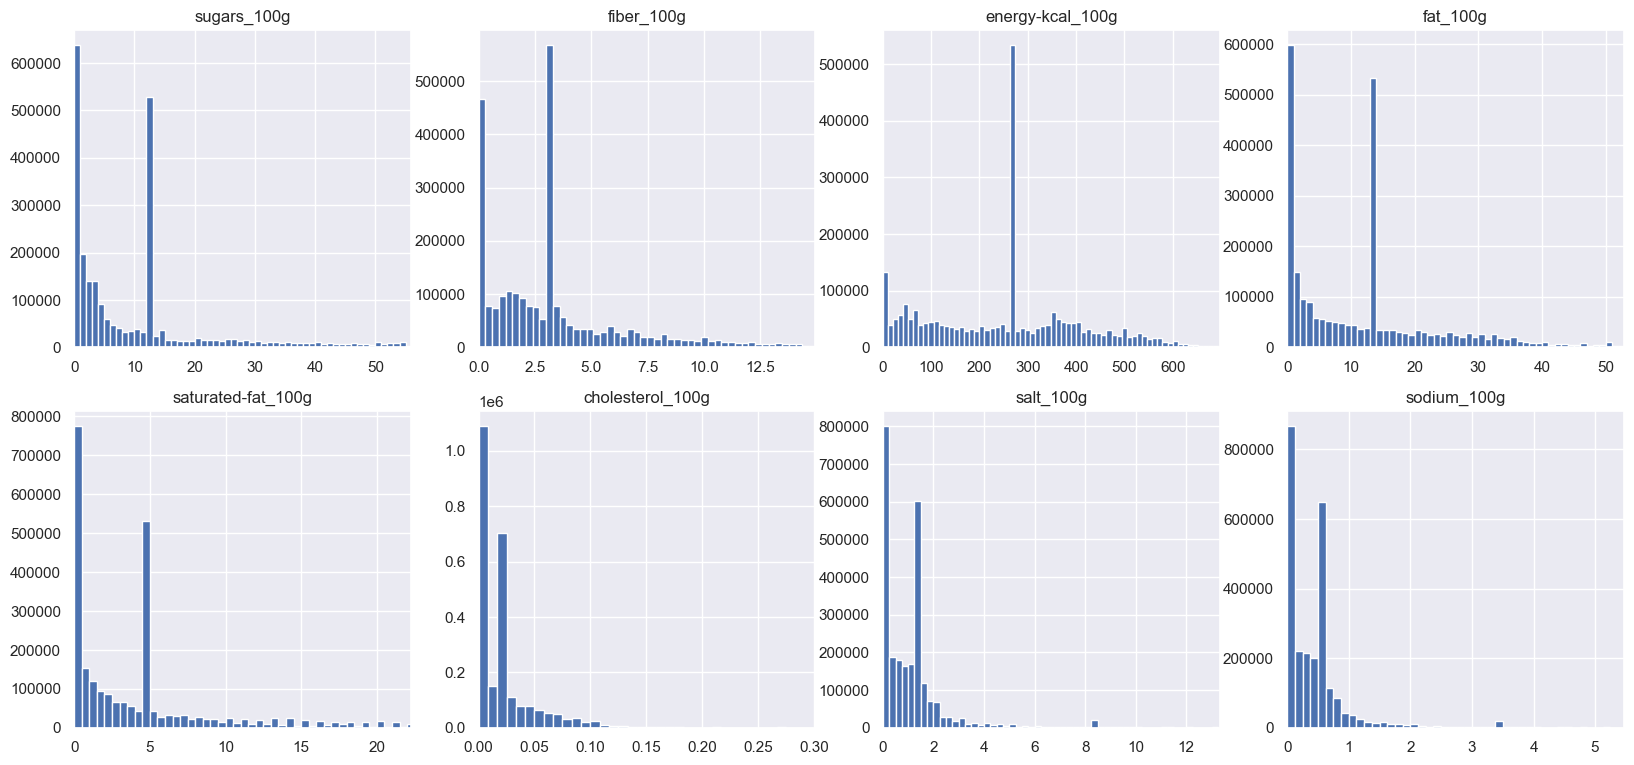

In [27]:
fig = plt.figure(figsize=(20, 14))
bin_dic = {'sugars_100g' : 100 ,
           'fiber_100g' : 150,
           'energy-kcal_100g' : 100,
           'fat_100g' : 100 ,
           'saturated-fat_100g' : 200, 
           'cholesterol_100g' : 400,
           'salt_100g' : 400 , 
           'sodium_100g' : 400}
for i in range(data_float.columns.shape[0]):
    ax = fig.add_subplot(3,4, (i+1))
    ax.hist(data_float[data_float.columns[i]], bins = bin_dic[data_float.columns[i]])
    ax.set_xlim([0, data_float[data_float.columns[i]].mean() + 2.5*data_float[data_float.columns[i]].std()])
    ax.set_title(data_float.columns[i])

<AxesSubplot:>

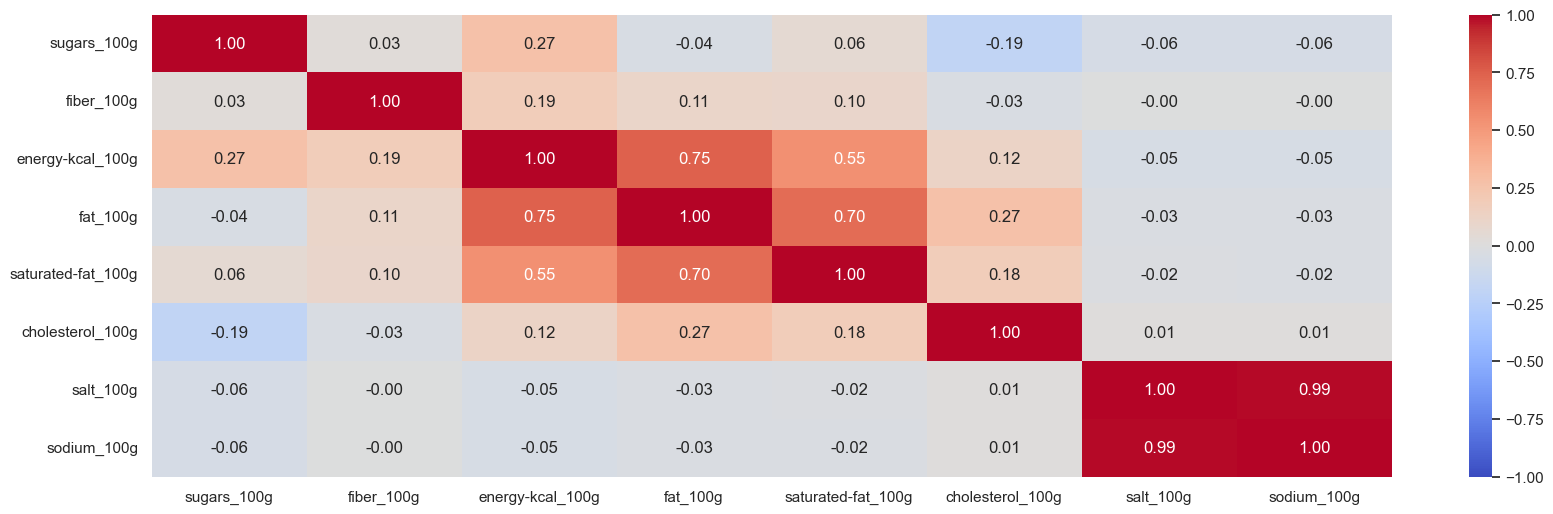

In [28]:
# Coefficient de corrélation entre les différentes variables :
correlations = data_float.corr()
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [29]:
# Faisont maintenant la corrélation entre le nutriscore et les variable ci dessus.
def eta_squared(x,y):
    moyenne_y = y.mean() # On fait la moyenne du quantitatif
    classes = []
    for classe in x.unique(): # Pour chaque valeur possible de notre qualitatif
        yi_classe = y[x==classe] # yi = les valeurs de y pour la classe selectionné
        classes.append({'ni': len(yi_classe), # Nombre d'individus ayant yi pour valeur
                        'moyenne_classe': yi_classe.mean()}) # Moyenne de la classe
    SCT = sum([(yj-moyenne_y)**2 for yj in y]) # SCT est donc la somme de l'écart à la moyenne totale des valeurs yi
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # SCE est la somme pondéré par l'eff de l'écart des moyenne de classe à la moyenne du total
    return SCE/SCT # le rapport des deux donne le rapport de corrélation R². 

Text(0.5, 1.0, 'Correlation sqrt(eta square) du nutriscore')

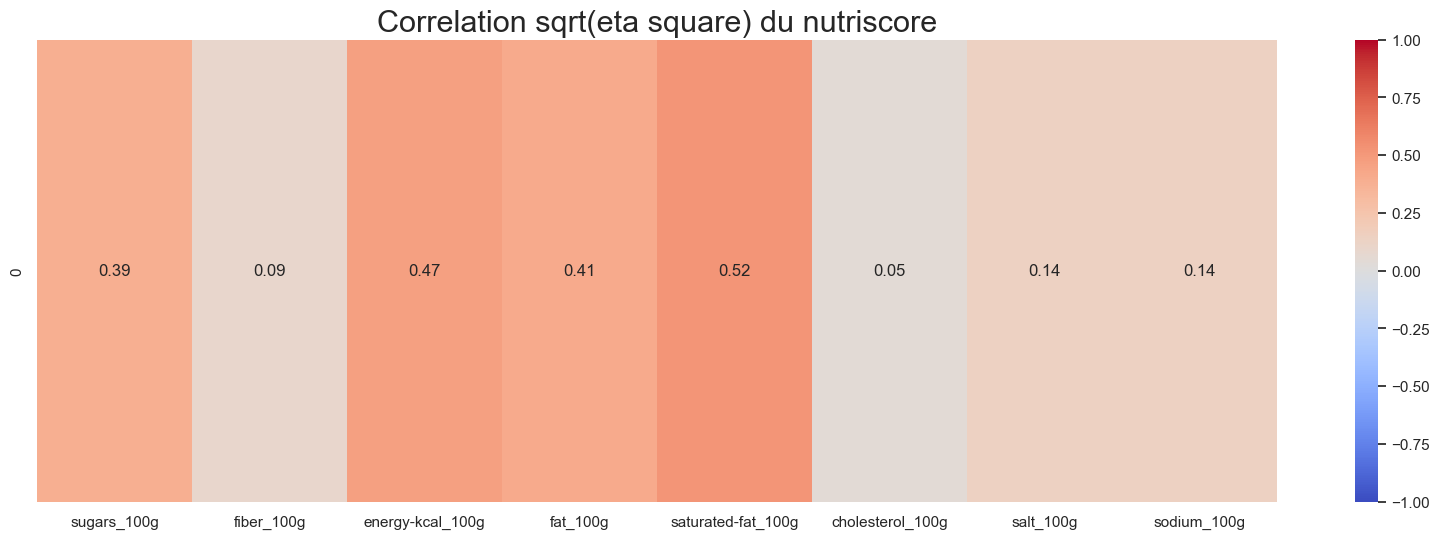

In [30]:
# Regardond maintenant la corrélation potentielle entre le nutriscore et nos différentes variables, deux à deux :

cor_nutri = pd.DataFrame(columns = data_float.columns)
cor = []  # On range les corrélations ici
data_usefull = data.loc[(~data['nutriscore_grade'].isnull()) & # Beaucoup de NaN, et de valeur nulles à virer
                        (data['nutriscore_grade'] != 0)] 
for i in data_float.columns:
    cor.append(math.sqrt(eta_squared(data_usefull['nutriscore_grade'],
                                     data_usefull[i])))
df_newline = pd.DataFrame([cor],
                          columns = data_float.columns)
cor_nutri = pd.concat([cor_nutri,df_newline],
                      ignore_index=True)
cor_nutri.set_index(pd.Index(['corrélation avec nutriscore'])) # On range tout dans un dataframme pour faire une heatmap

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(cor_nutri, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title('Correlation sqrt(eta square) du nutriscore', fontsize =  22)

In [31]:
# Passons à l'APC (je regretterais plus tard de ne pas avoir clusturisé avant, mais tant pis !)
x = data_float.values
scaler = StandardScaler() #Chargement du centrage réduction
scaler.fit(x)

StandardScaler()

In [32]:
X_cr = scaler.transform(x)

In [33]:
# Création des Fi, pour i = 1 à 6
n_components = 6
pca = PCA(n_components=n_components) # On charge l'algo qui le fait automatiquement (tant de difficulté théorique dans une seule ligne)
pca.fit(X_cr) # On adapte à nos valeurs -> on viens de créer F1, 2, 3, 4, 5 et 6

PCA(n_components=6)

In [34]:
scree = (pca.explained_variance_ratio_*100).round(2) # On récupère la variance expliqué par F1, 2.. 6
scree

array([30.79, 24.77, 15.64, 12.06,  9.18,  5.38])

In [35]:
scree_cum = scree.cumsum().round() # Pas super ce PCA
scree_cum

array([31., 56., 71., 83., 92., 98.])

Text(0.5, 1.0, 'Eboulis des valeurs propres')

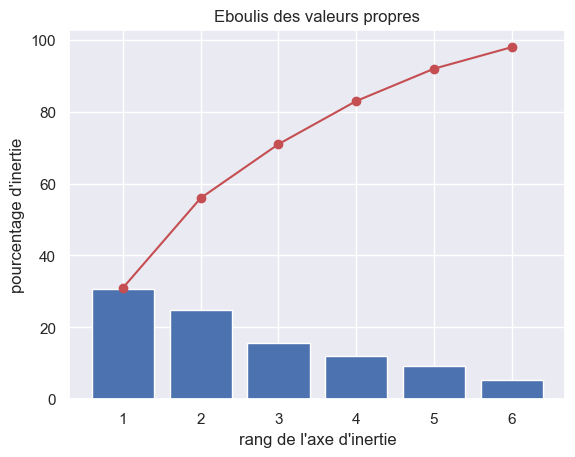

In [36]:
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c = 'r', marker = 'o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

In [37]:
# Relation linéaire entre les Fi et les variables de départ :
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = data_float.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs

sugars_100g  fiber_100g  energy-kcal_100g  fat_100g  saturated-fat_100g  \
F1     0.092856    0.143344          0.547019  0.575020            0.519271   
F2    -0.078344    0.025506          0.070137  0.118381            0.104525   
F3    -0.703827   -0.253663         -0.217713  0.116720            0.027860   
F4    -0.341363    0.932038         -0.063173 -0.039245           -0.088145   
F5     0.537280    0.186578          0.022039 -0.195025           -0.240075   
F6     0.179245    0.091372         -0.564040 -0.226875            0.766324   

    cholesterol_100g  salt_100g  sodium_100g  
F1          0.197947  -0.126400    -0.127082  
F2          0.091263   0.691184     0.690861  
F3          0.605680  -0.075248    -0.077289  
F4         -0.022918  -0.021300    -0.022309  
F5          0.761670   0.009285     0.011637  
F6          0.051079  -0.005761    -0.003835

<AxesSubplot:>

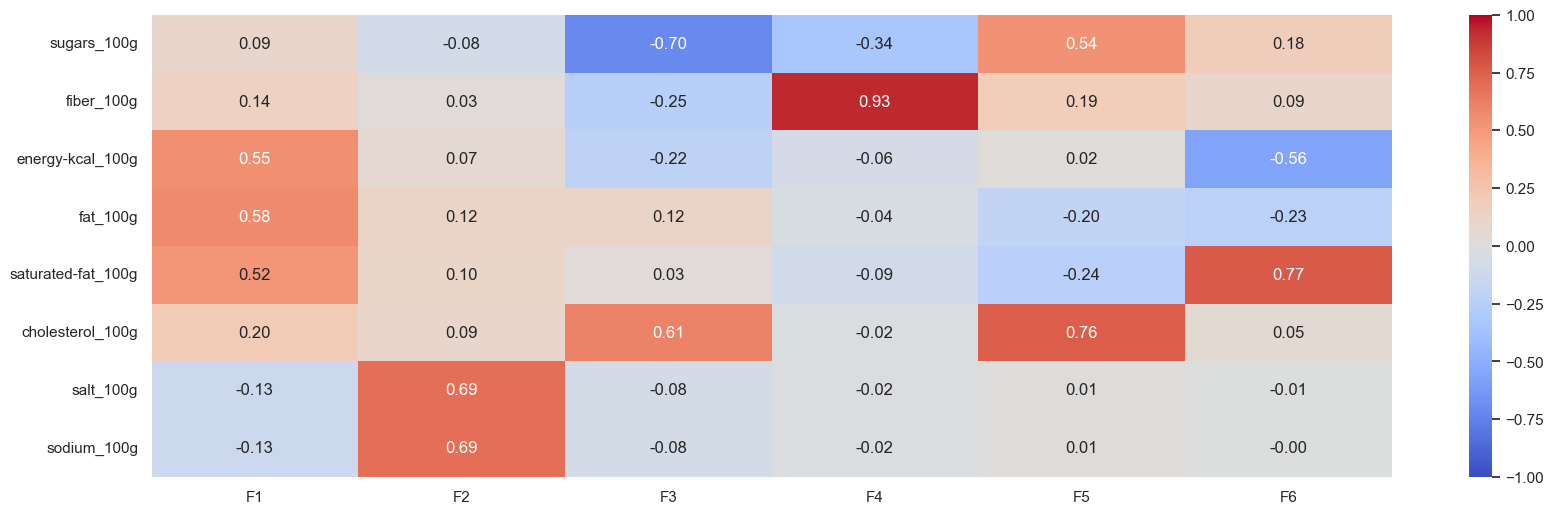

In [38]:
# Version Heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [39]:
# On récupère et on corrige la fonction pour afficher les même infos en mode cercle de corrélation :
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

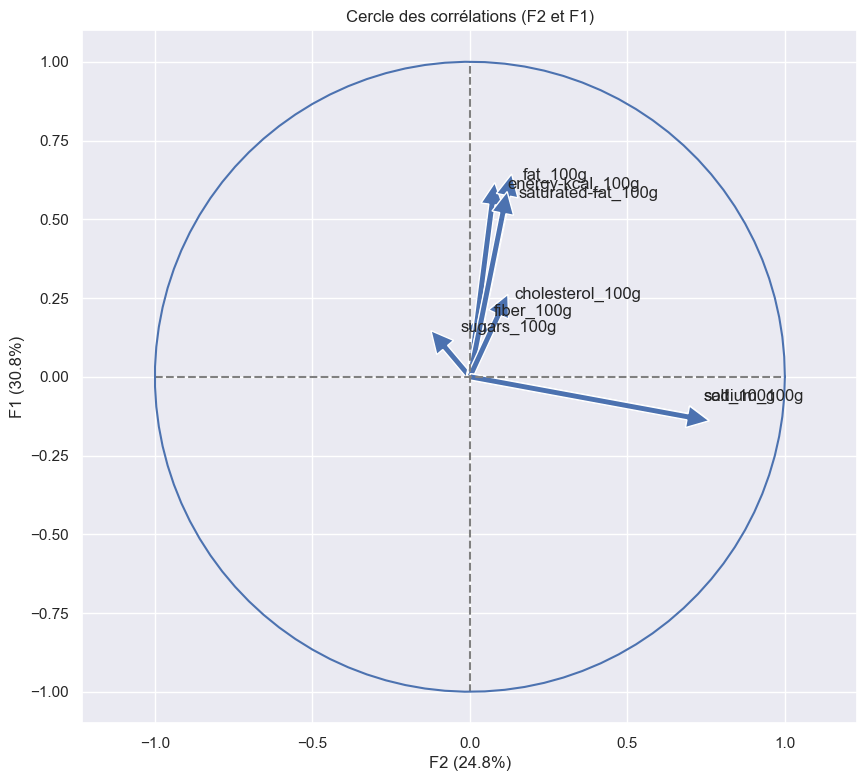

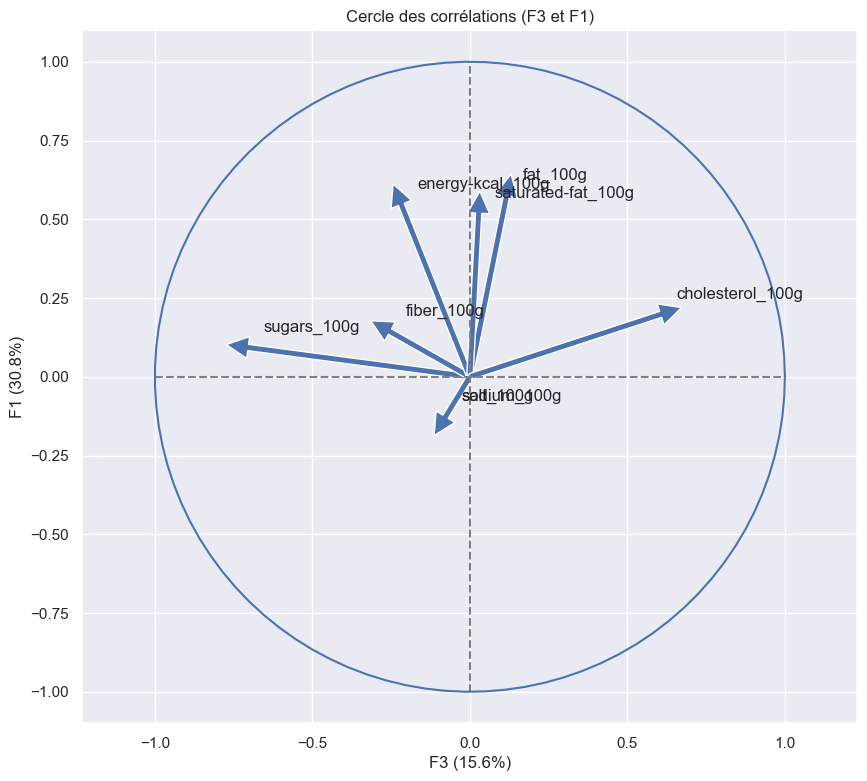

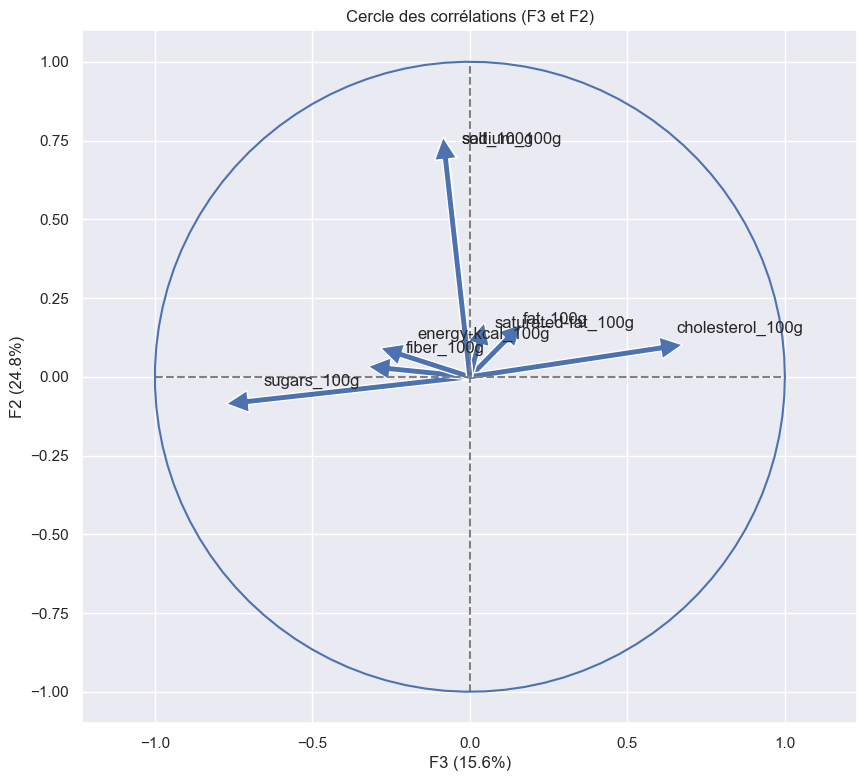

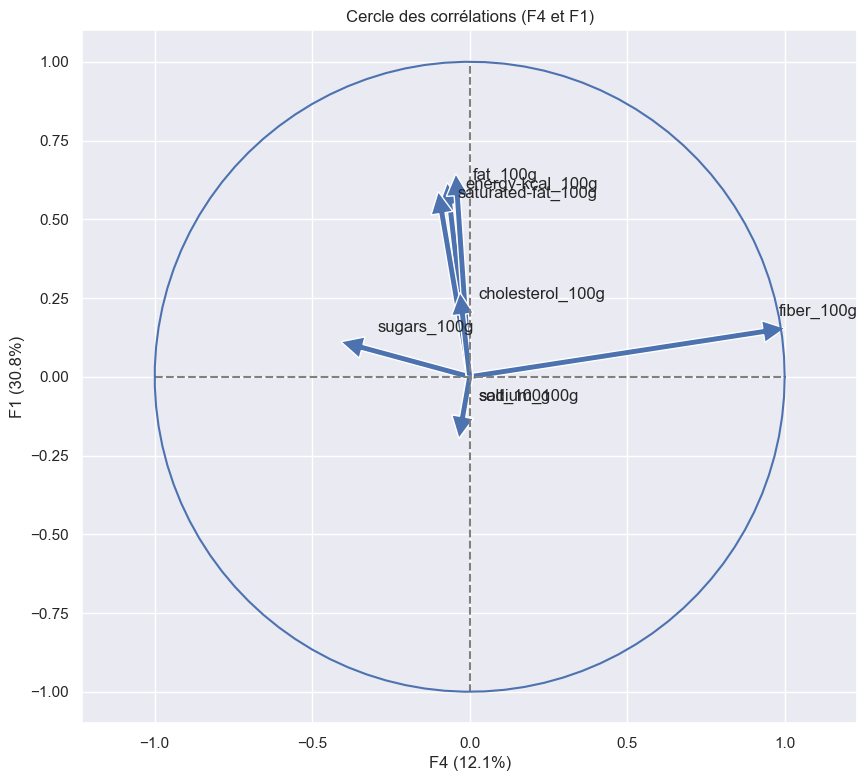

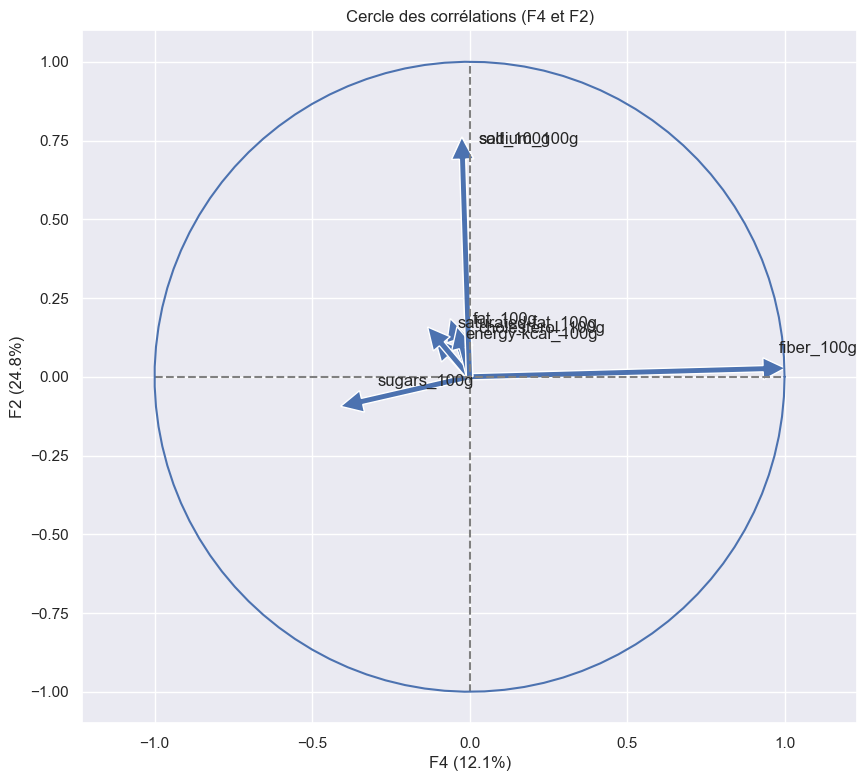

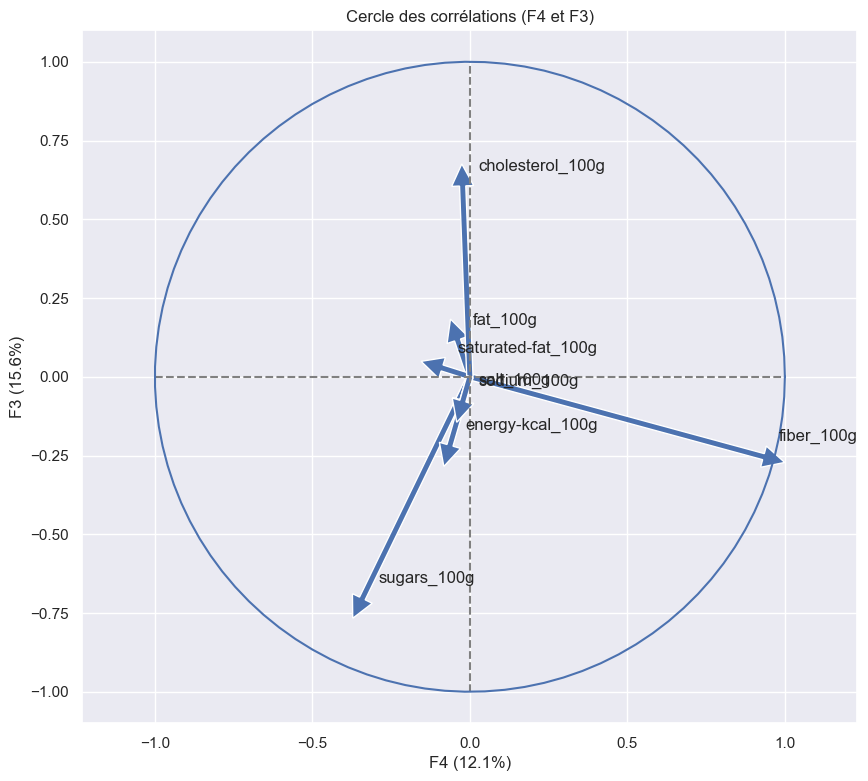

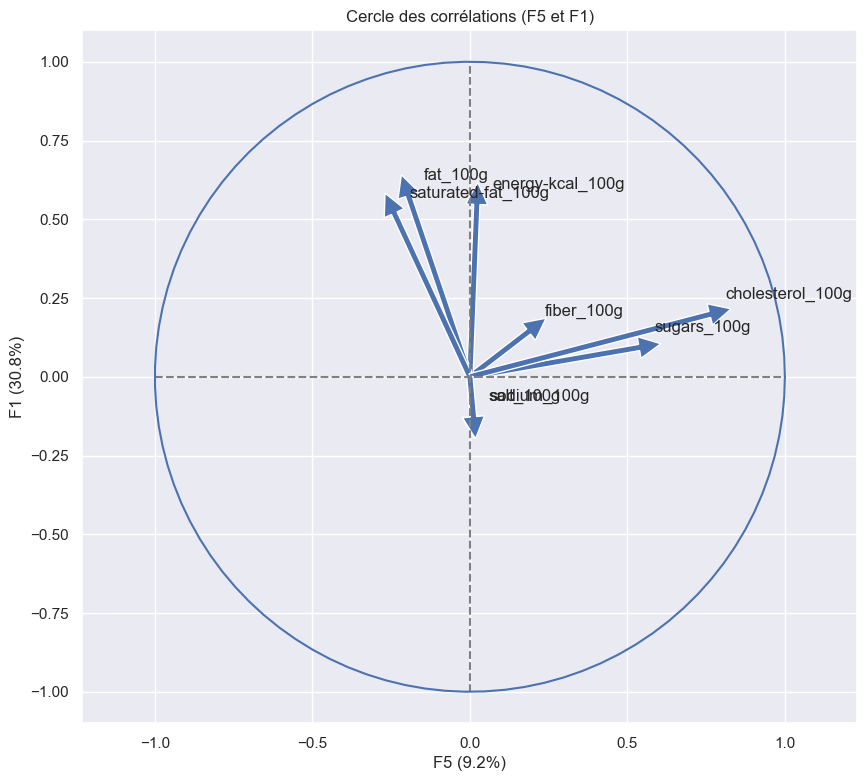

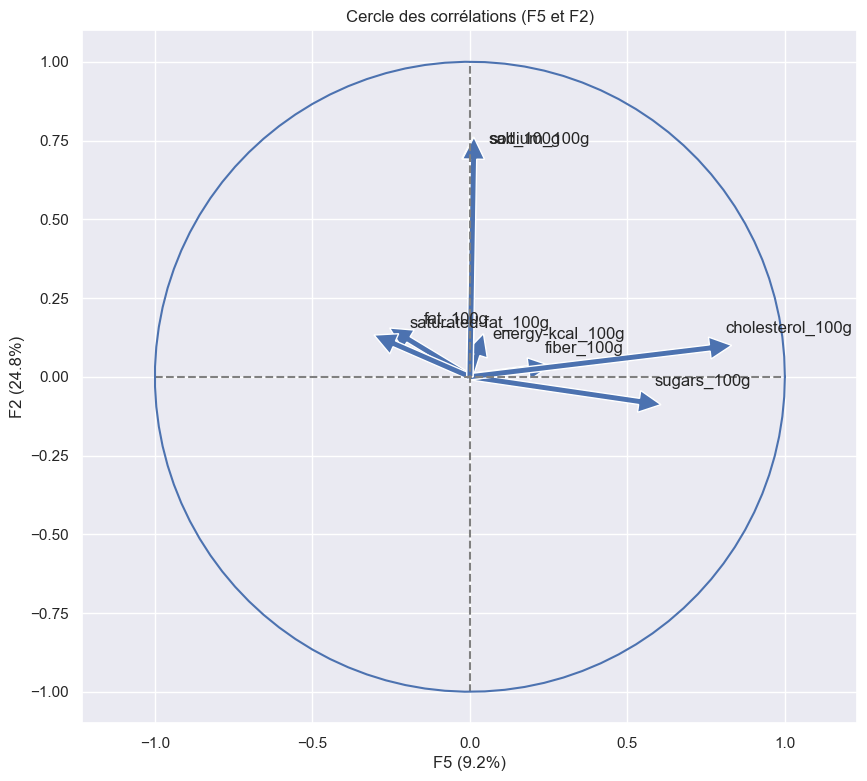

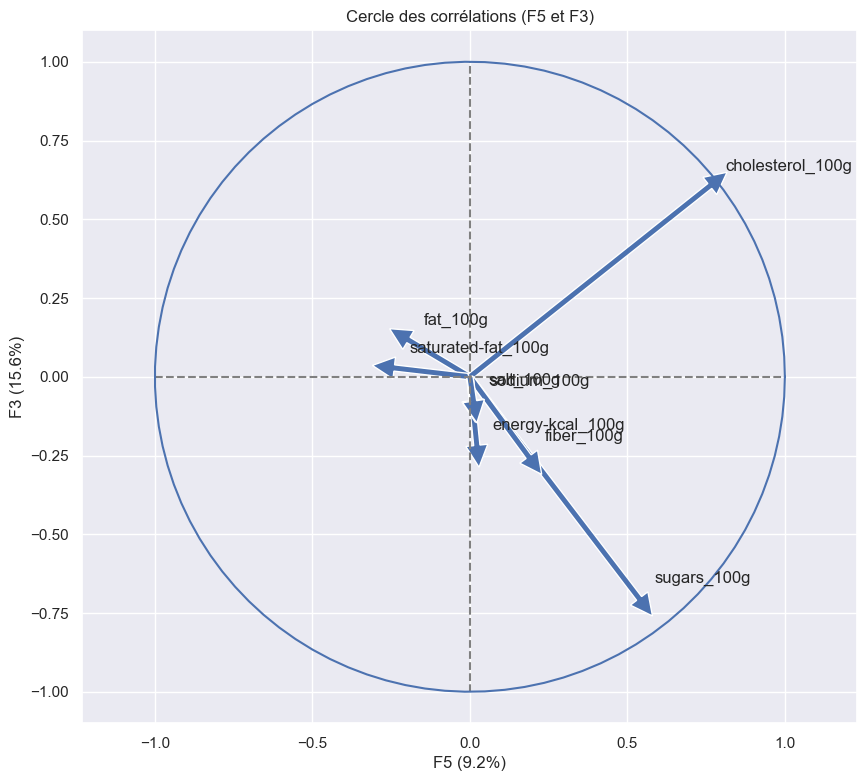

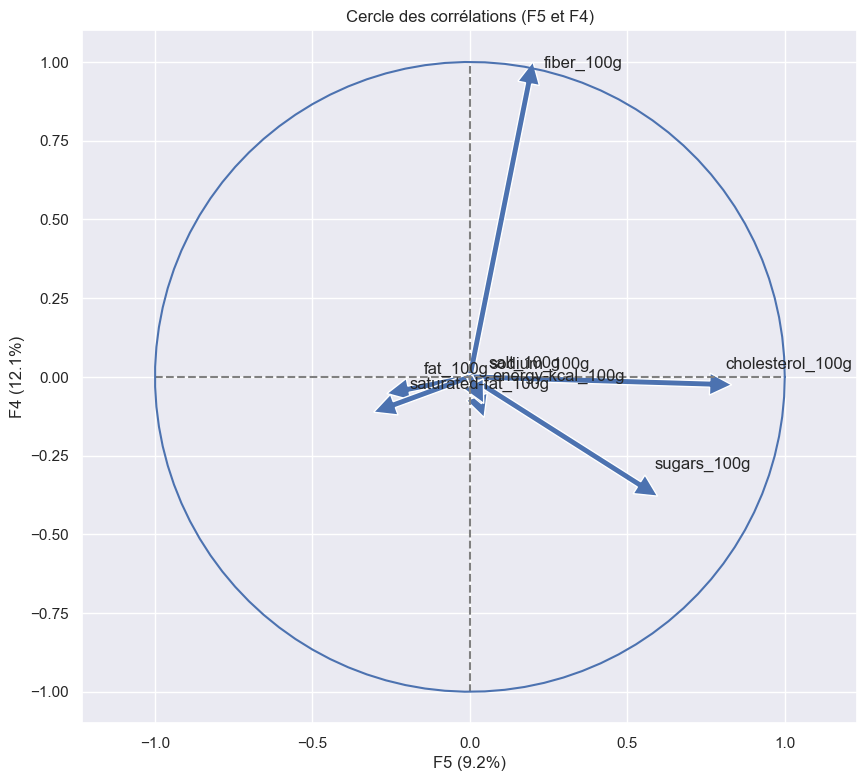

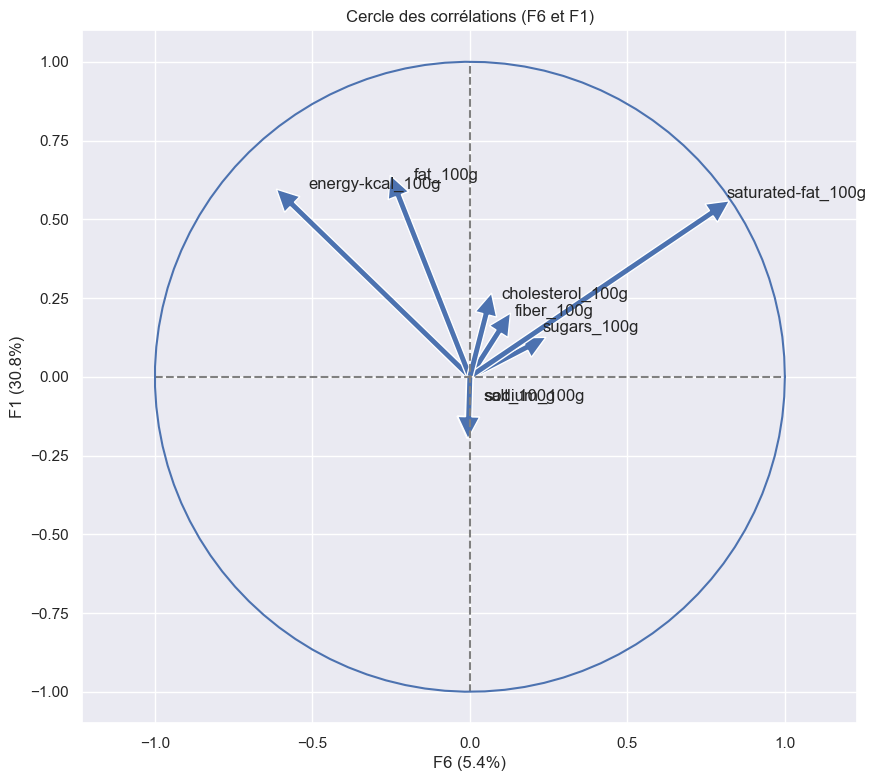

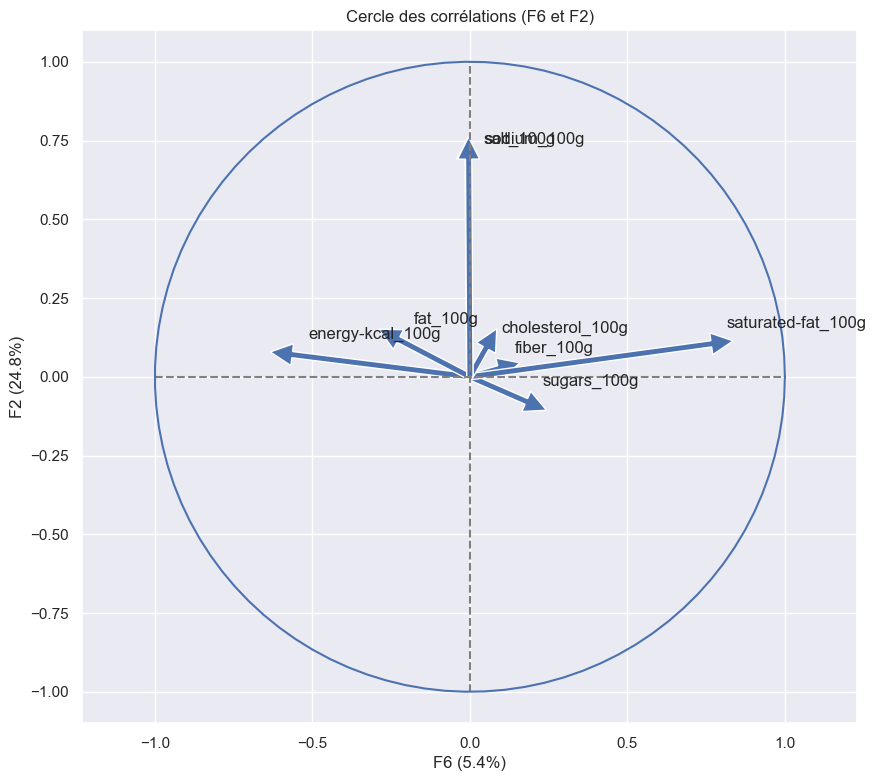

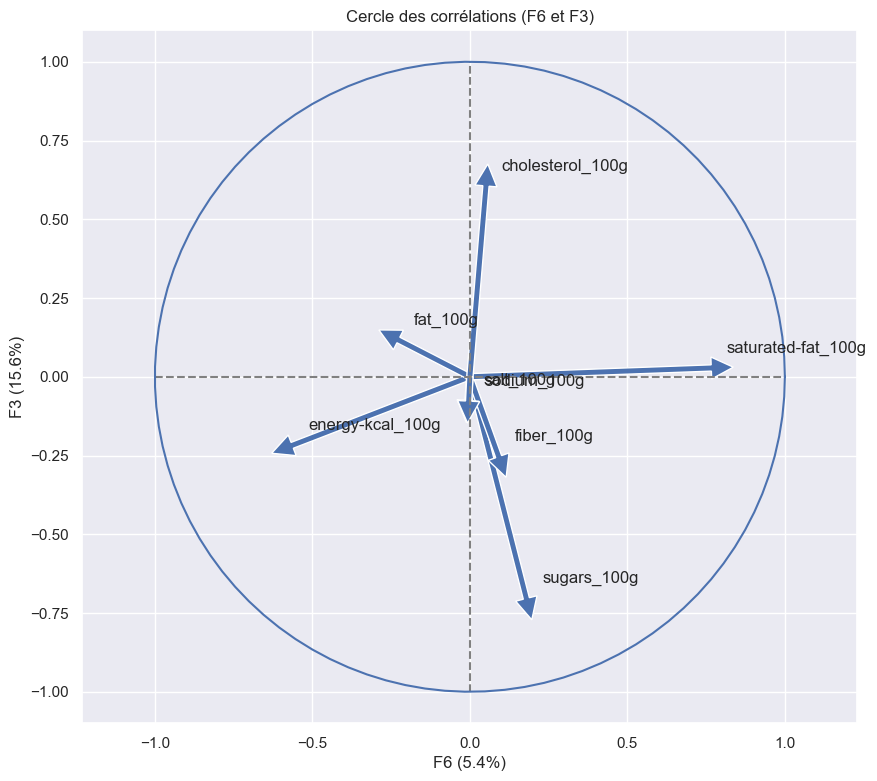

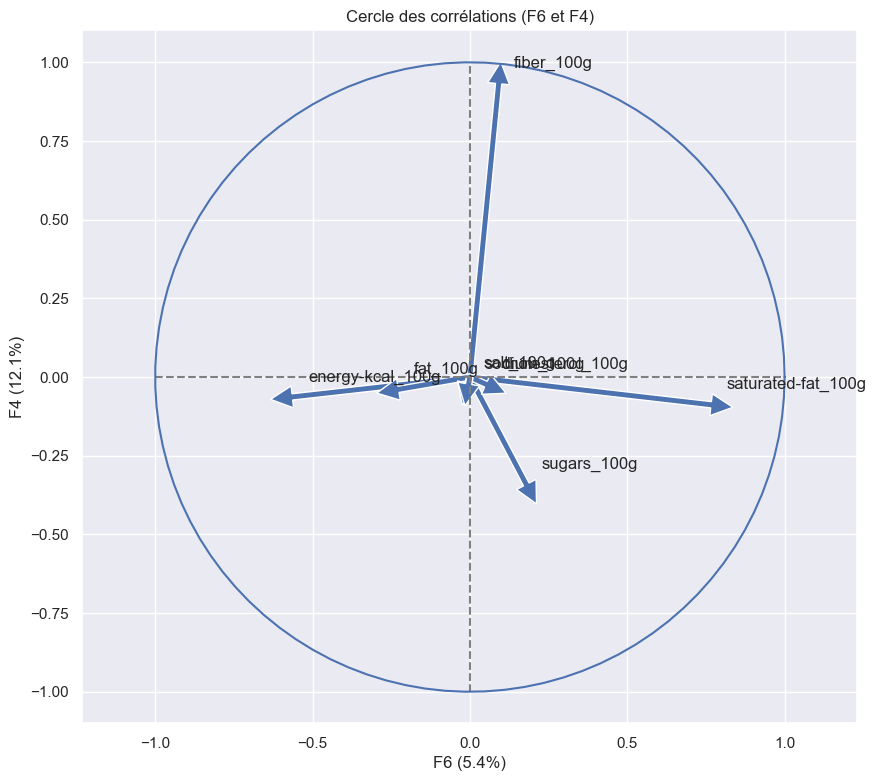

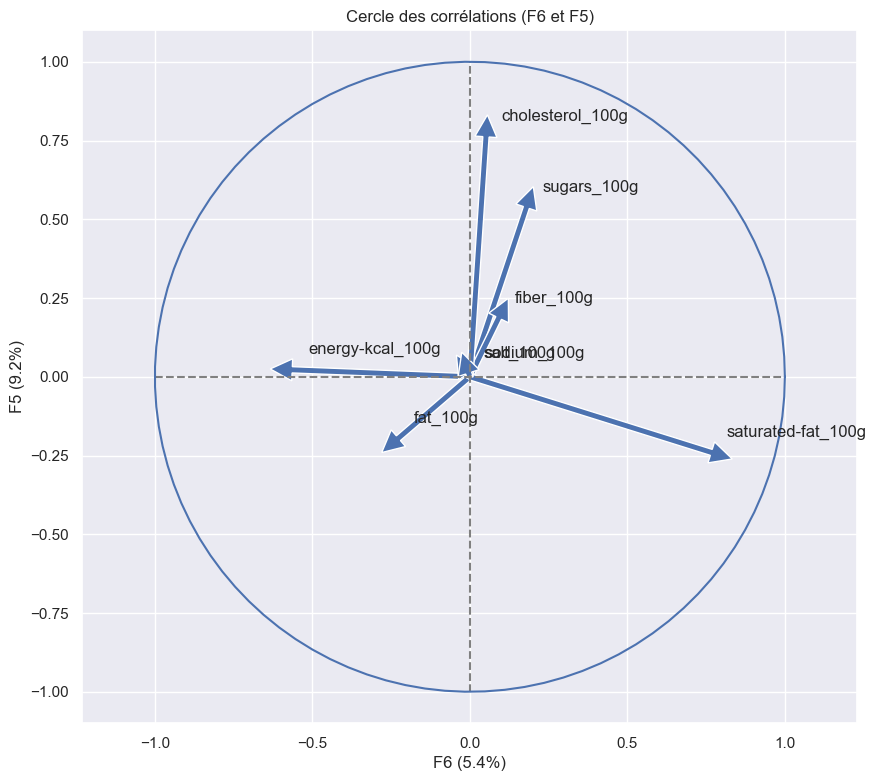

In [40]:
for i in range (0,6):
    for j in range(0,i+1):
        if i != j:
            x_y = [i,j]
            correlation_graph(pca, x_y, data_float.columns)

In [41]:
X_proj = pca.transform(X_cr) # Projection des individus sur F1, F2, ...

In [42]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(X_[:, x], 
                X_[:, y], 
                alpha=alpha, 
                c=c, 
                cmap="Set1", 
                marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.1, labels[i], fontsize='7', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


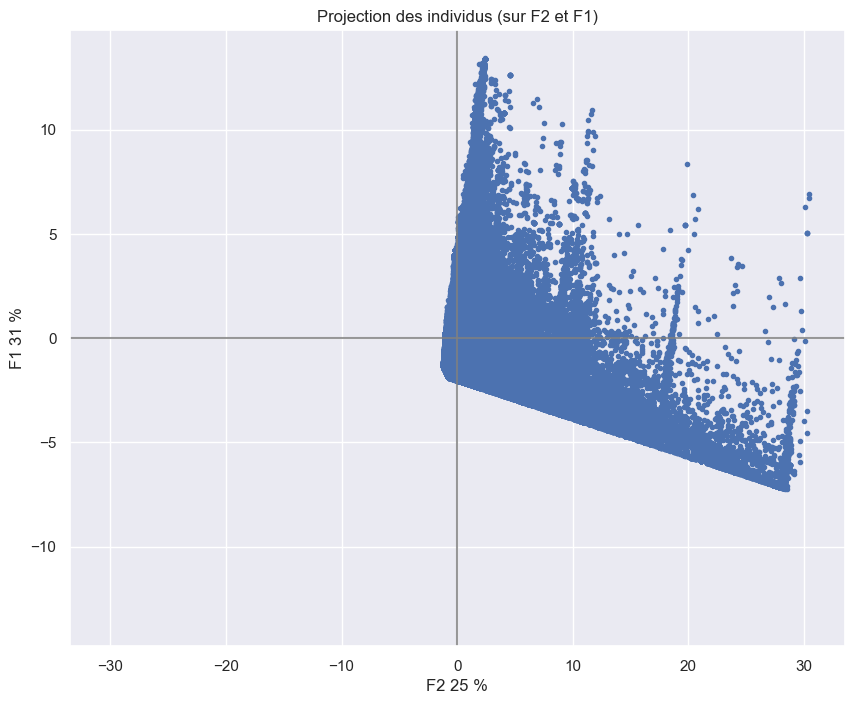

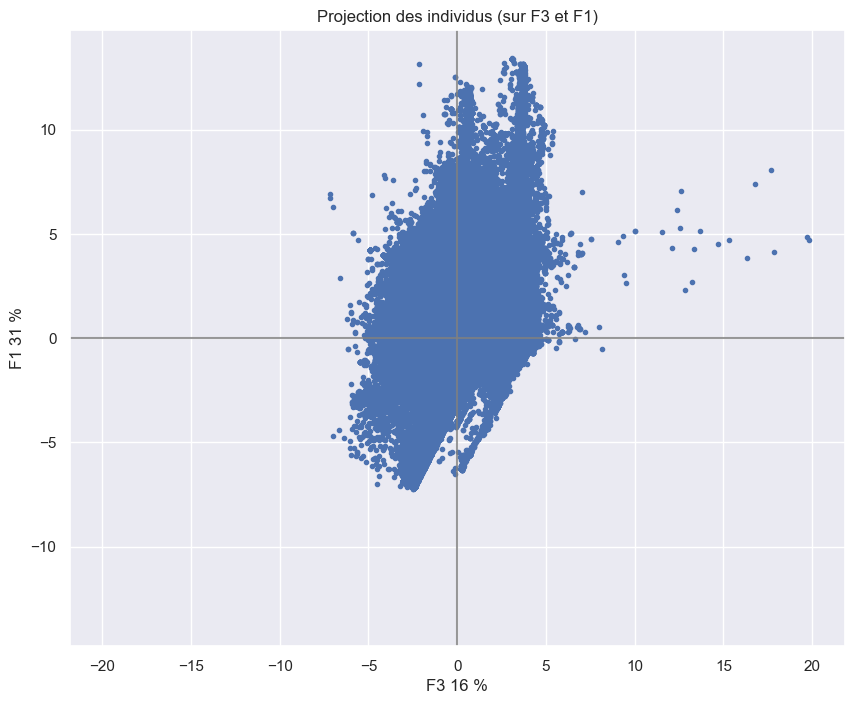

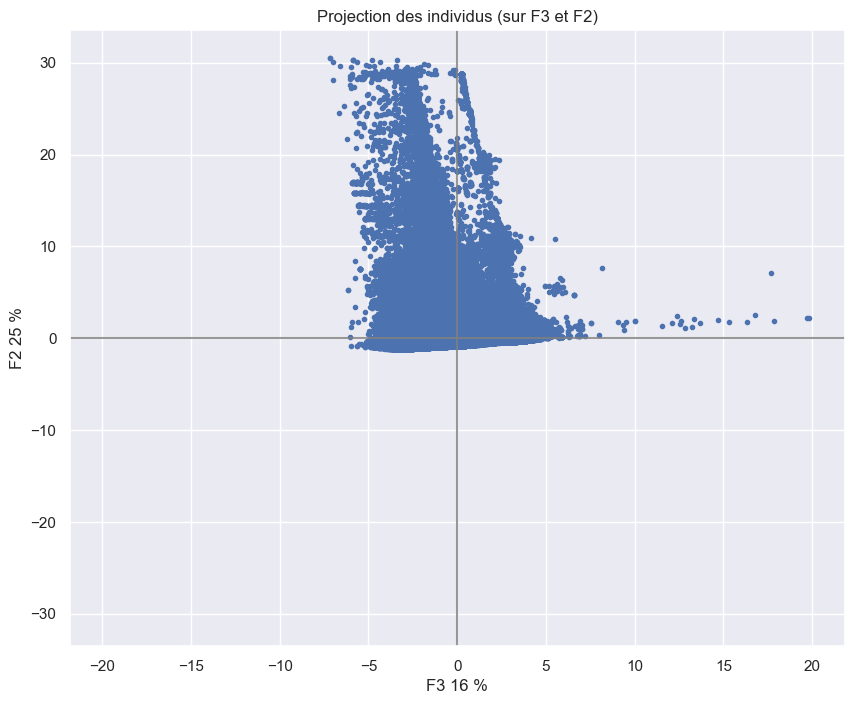

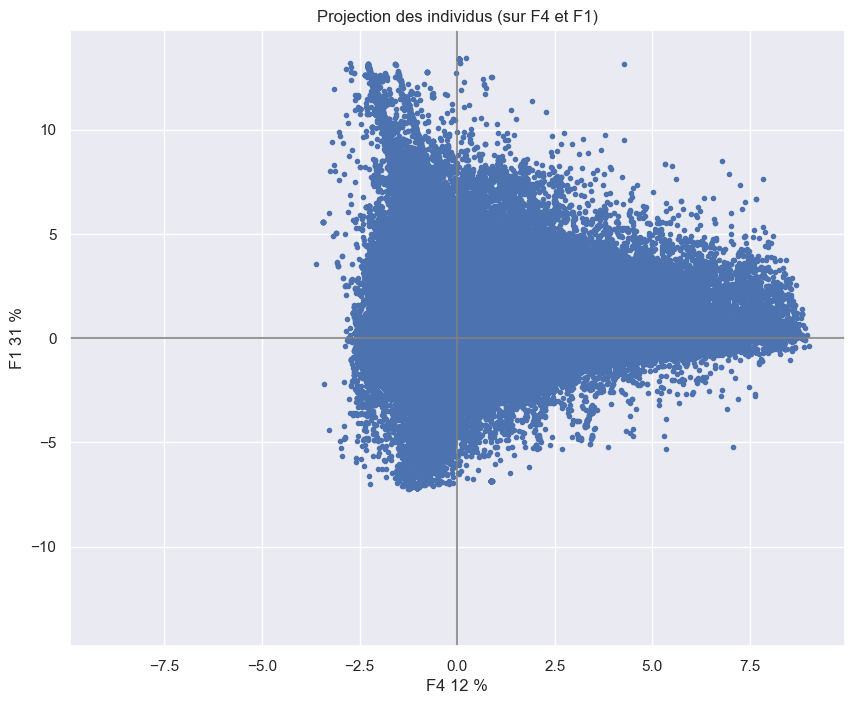

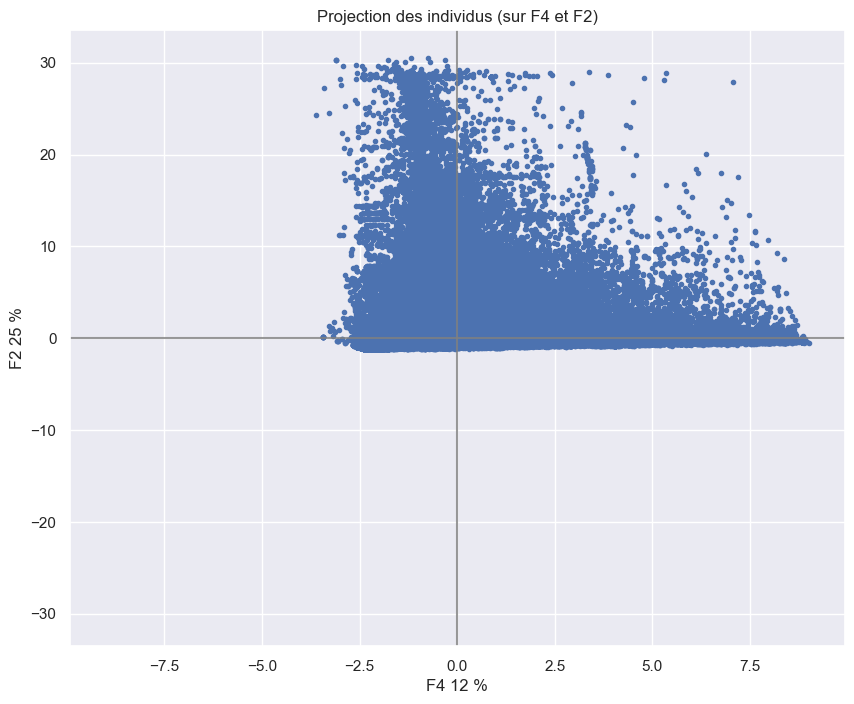

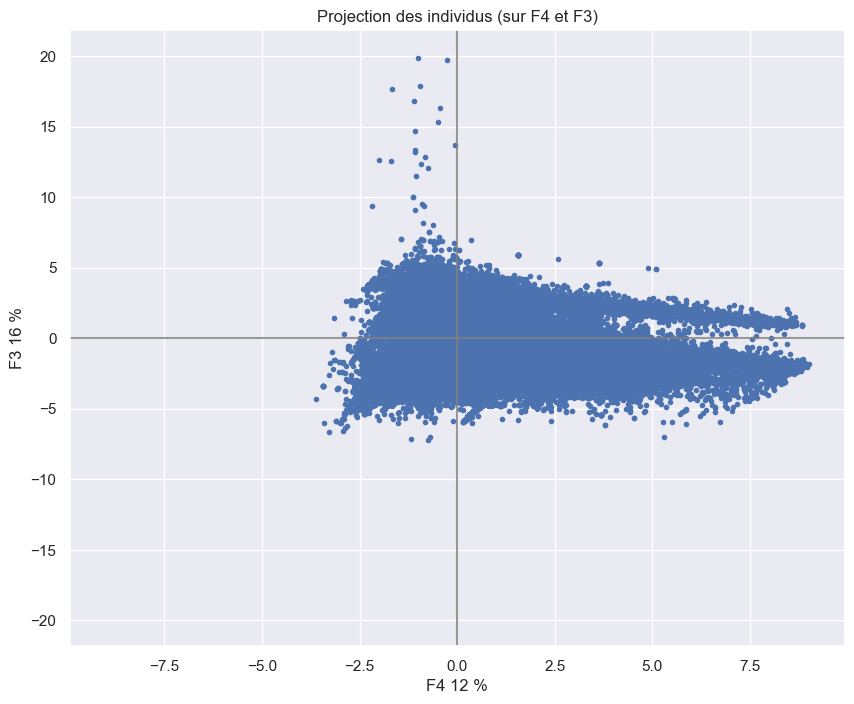

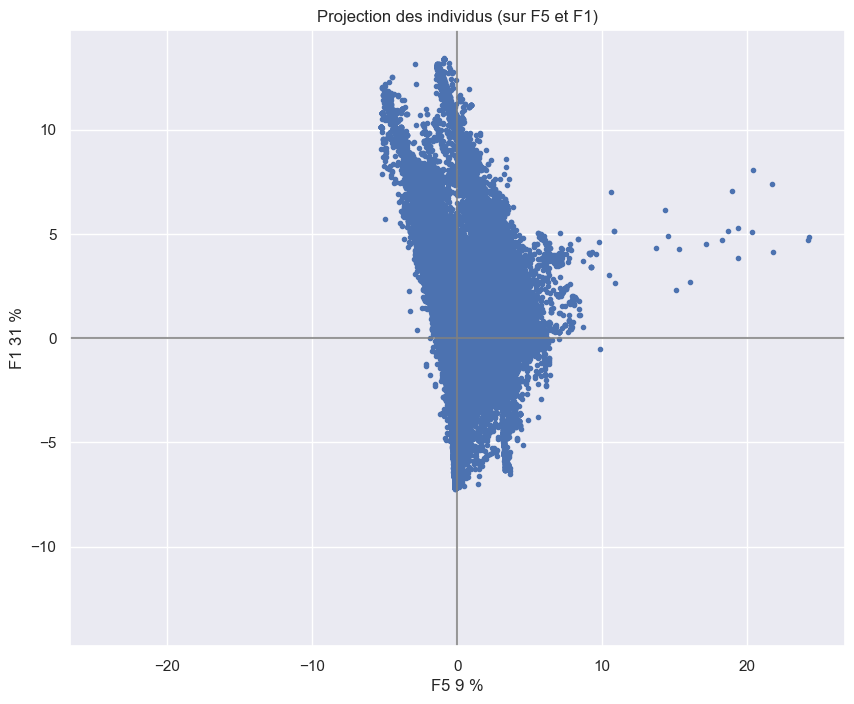

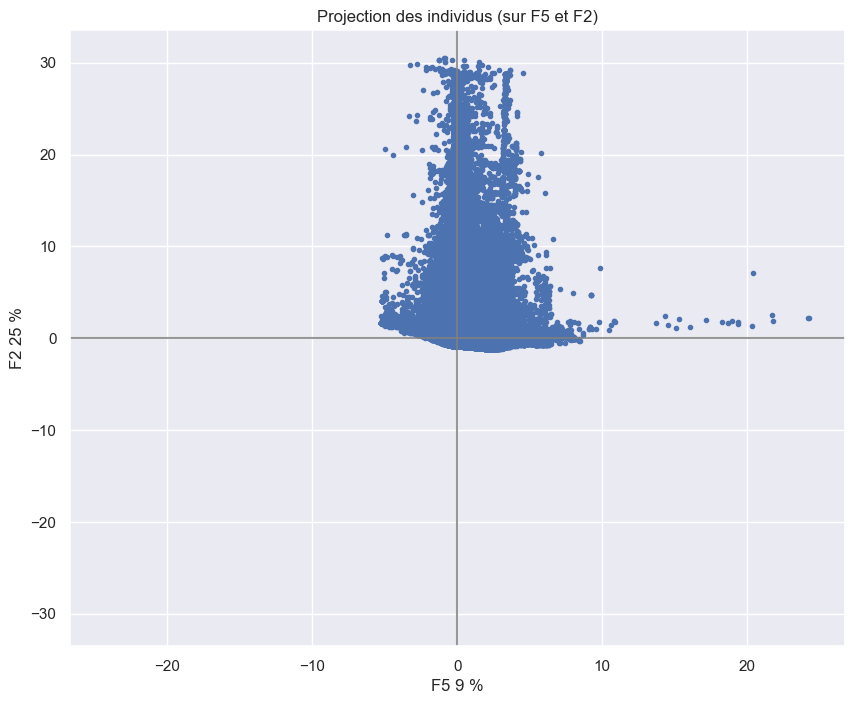

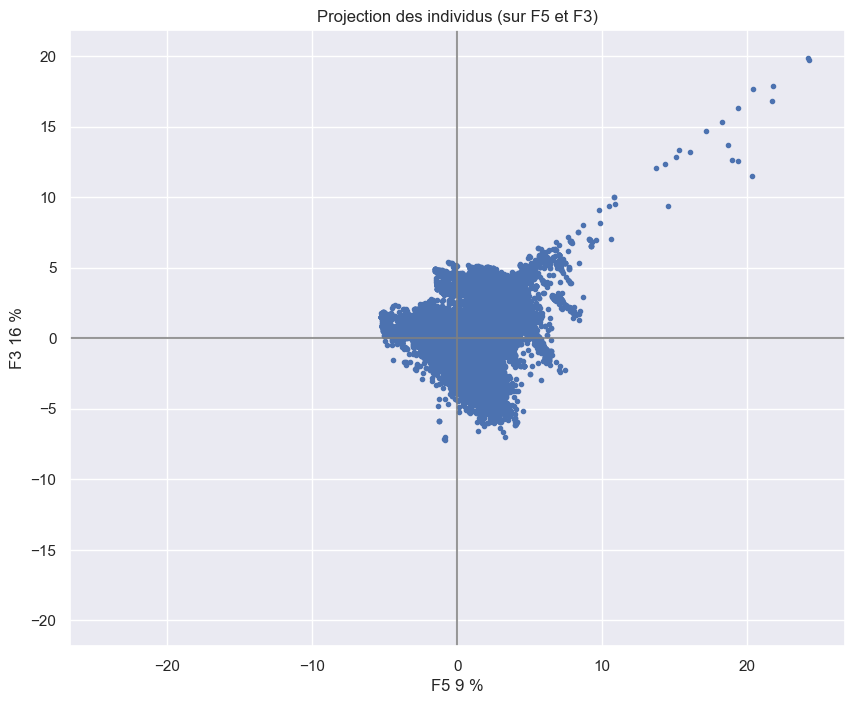

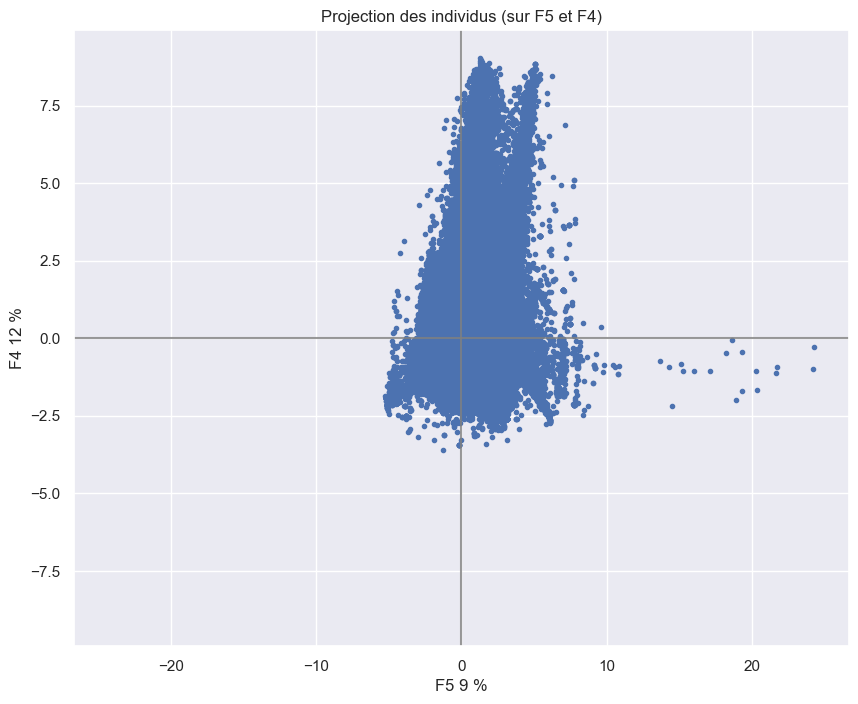

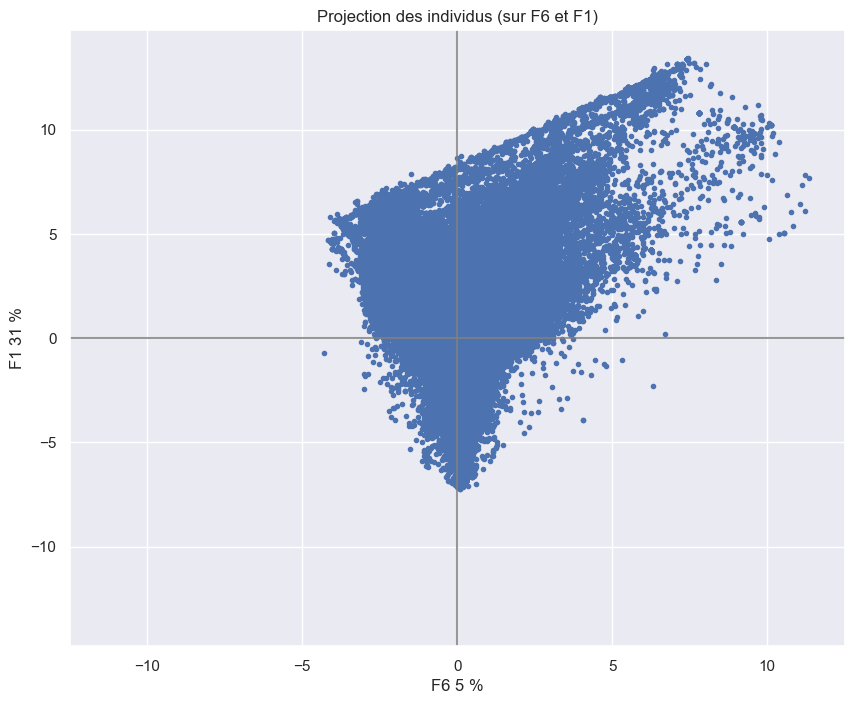

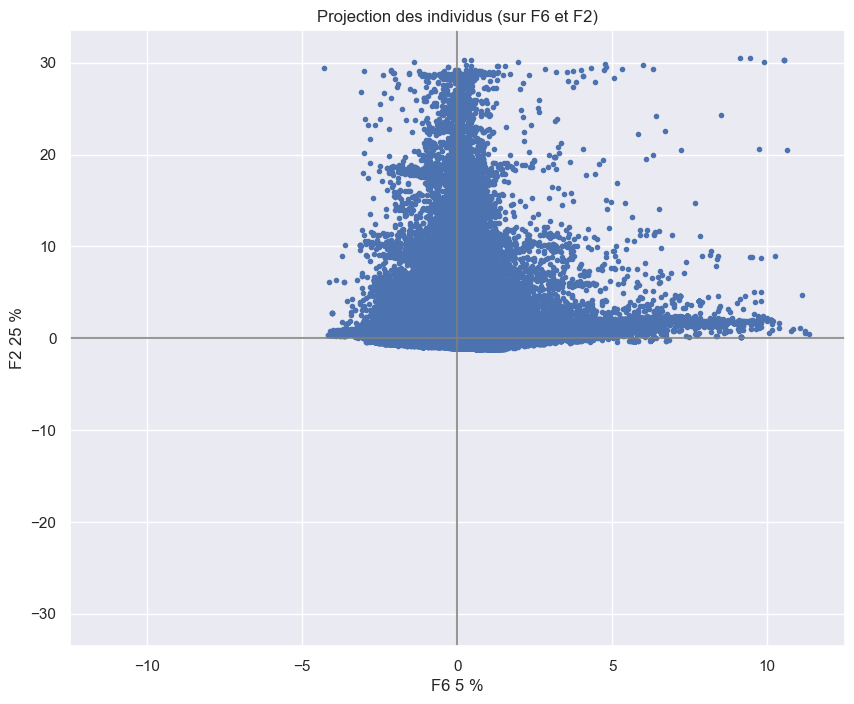

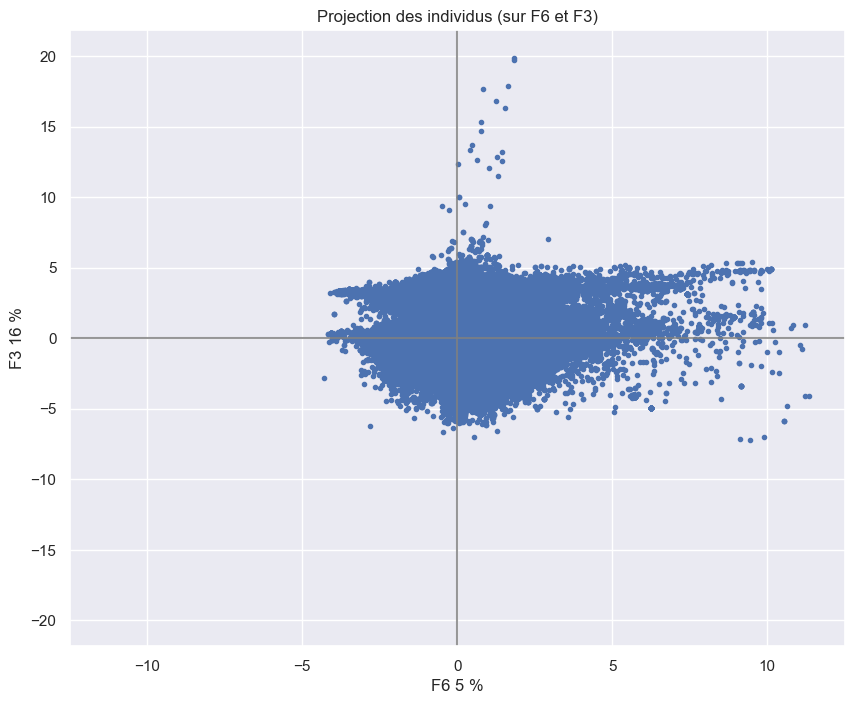

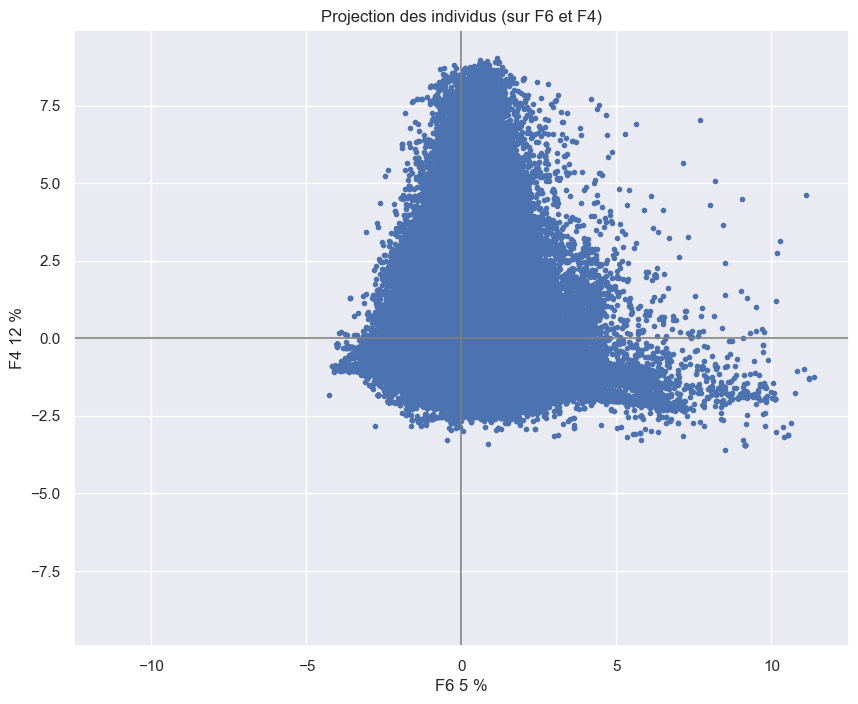

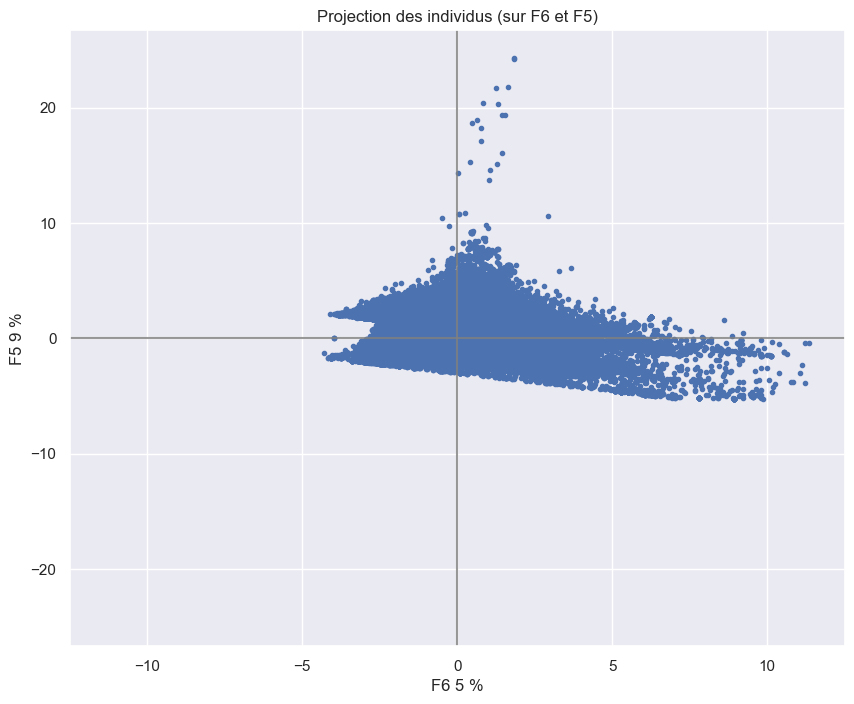

In [43]:
for i in range (0,6):
    for j in range(0,i+1):
        if i != j:
            x_y = [i,j]
            display_factorial_planes(X_proj, x_y, pca)

In [44]:
# L'APC est de mauvaise qualité ici, la variance expliqué est trop faible pour atteindre les 90% sur les 6 premières 
# composantes, alors qu'on a de base que 9 variables. Qui plus est, on voit que des composantes comme F4 sont presque égales
# à juste une variable. Aussi, des variables de bases très corrélés (fat / saturedfat ou sel / sodium) composent presque 
# entièrement ensemble F1 et F2. Les nuages des individus, malheureusement sur des échelles allant de -20 à 20 fois Fi, 
# Ne réduisent pas finalement le nombre de variables necessaires pour décrire notre ensemble.
# Zoomons voir ce que les graphique donnent si on se limite a des intervalles de définition et d'arrivés de [-2, 2]

In [45]:
def display_factorial_planes_zoomed(X_projected, 
                                    x_y, 
                                    pca=None, 
                                    labels = None,
                                    clusters=None, 
                                    alpha=1,
                                    figsize=[10,8], 
                                    marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = 2
    y_max = 2

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


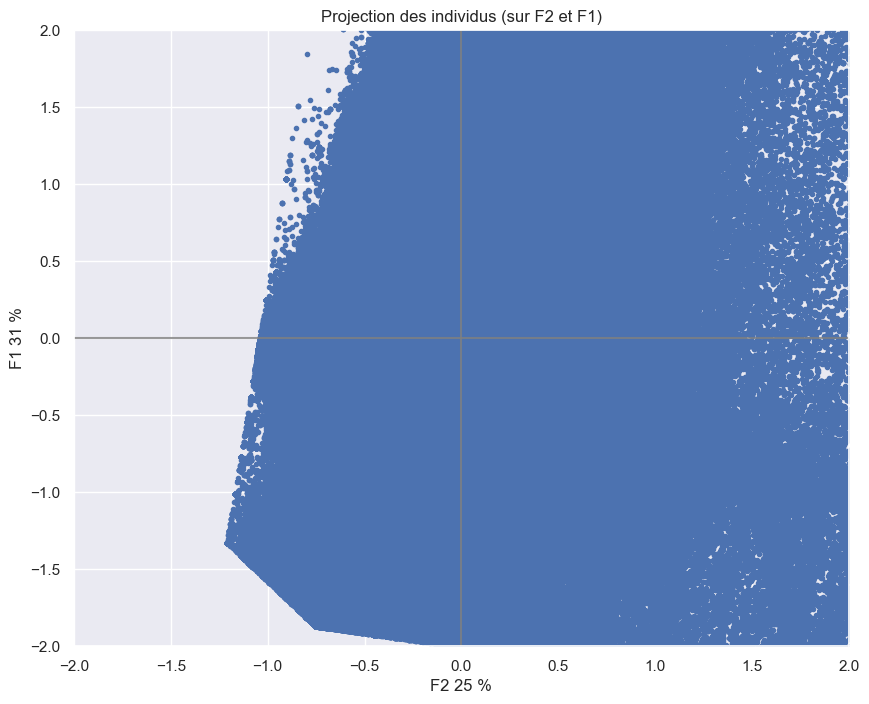

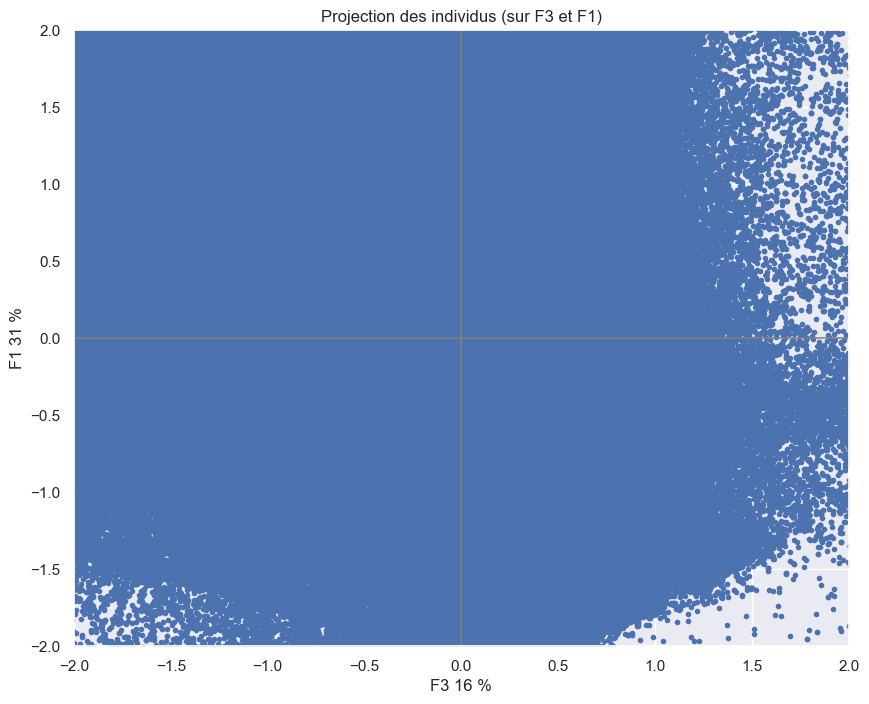

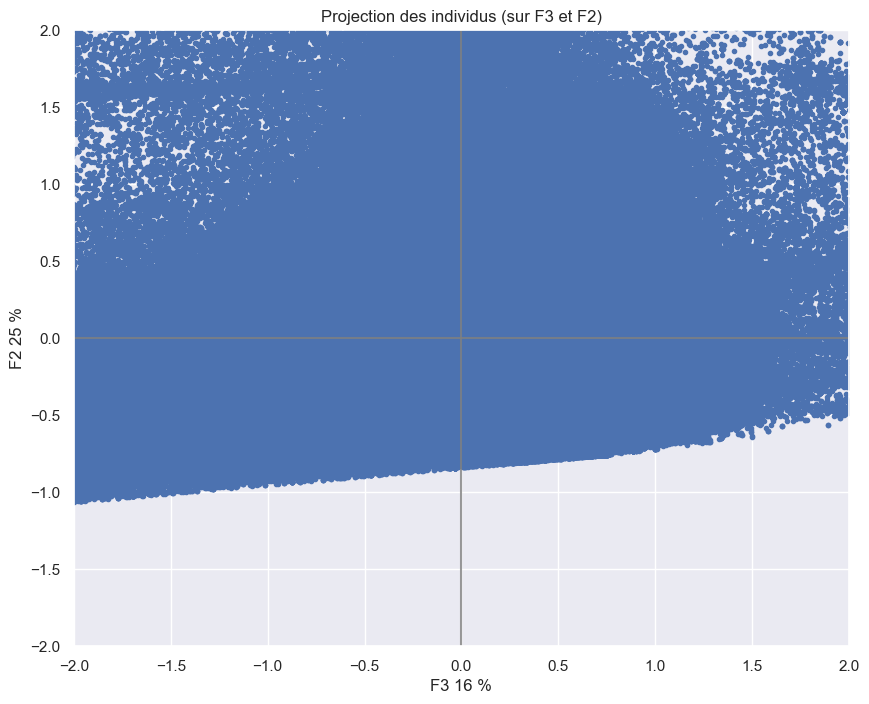

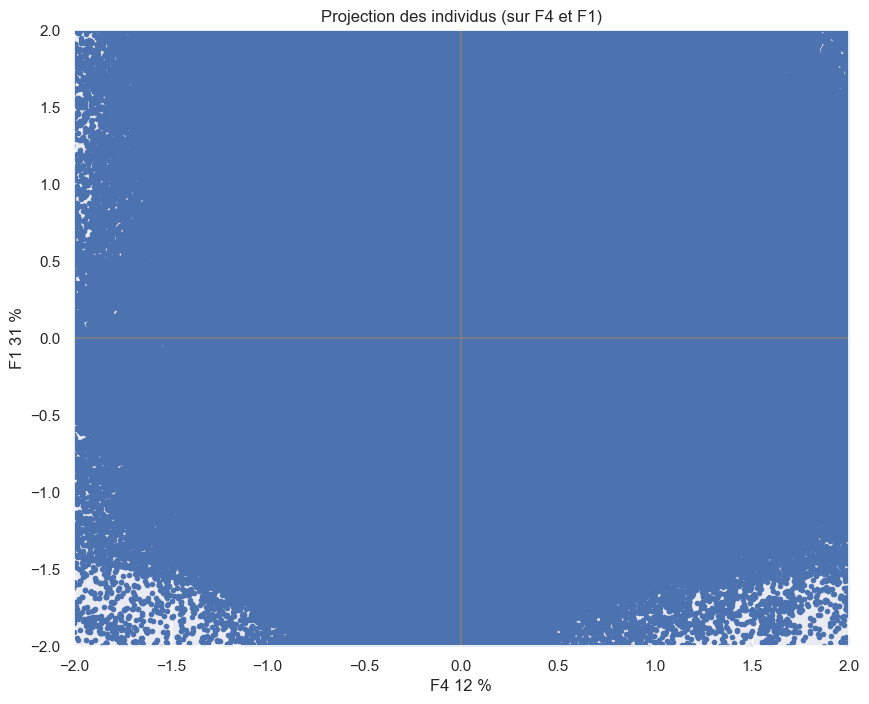

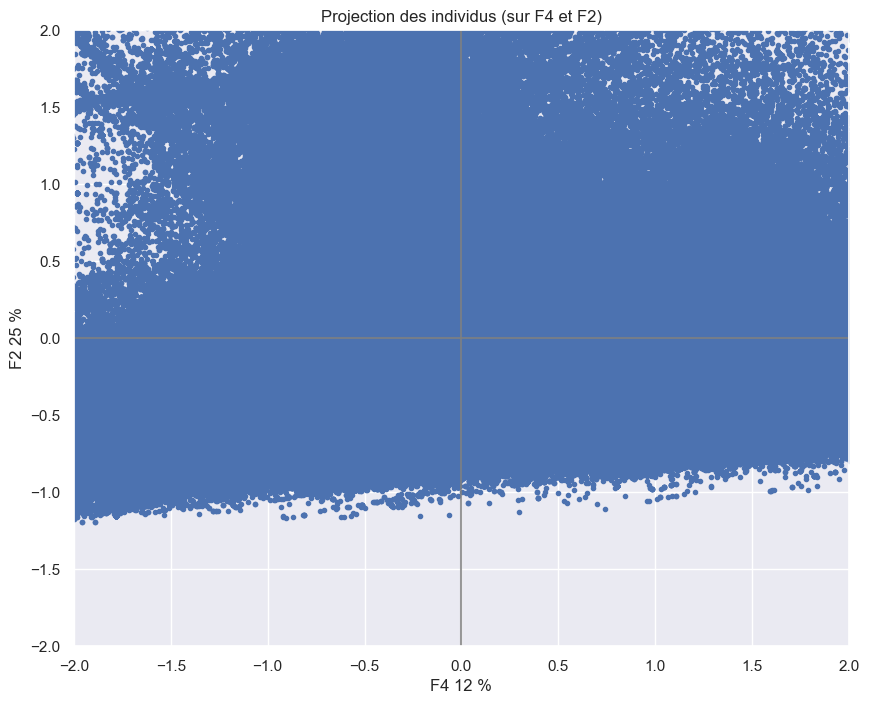

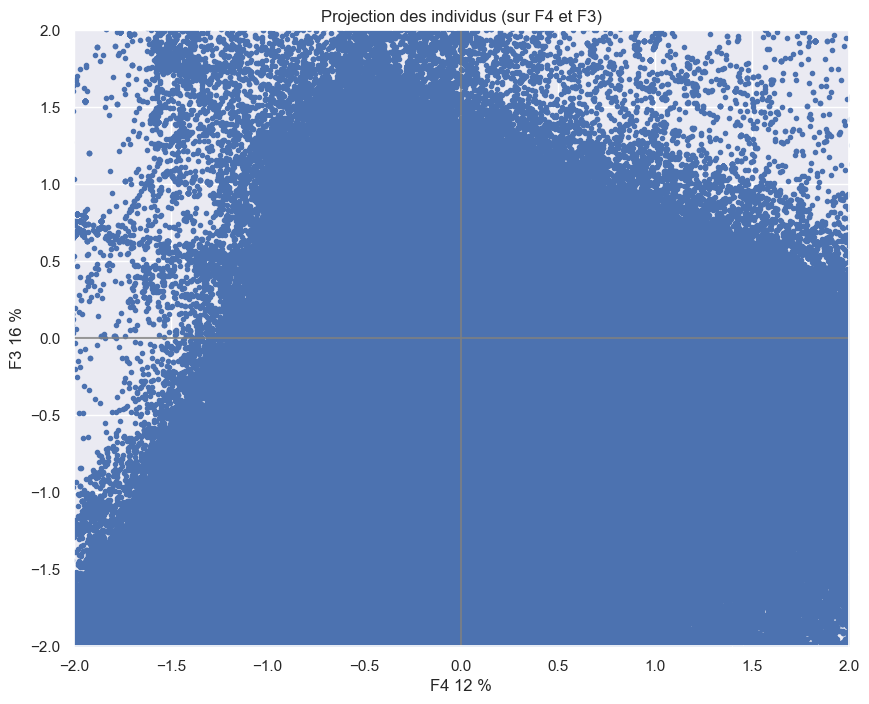

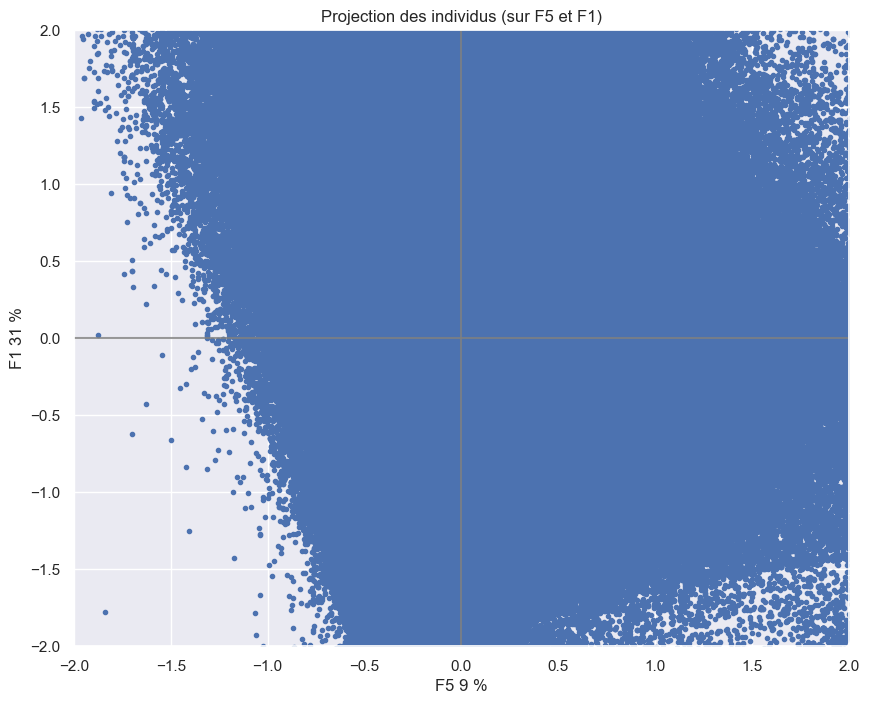

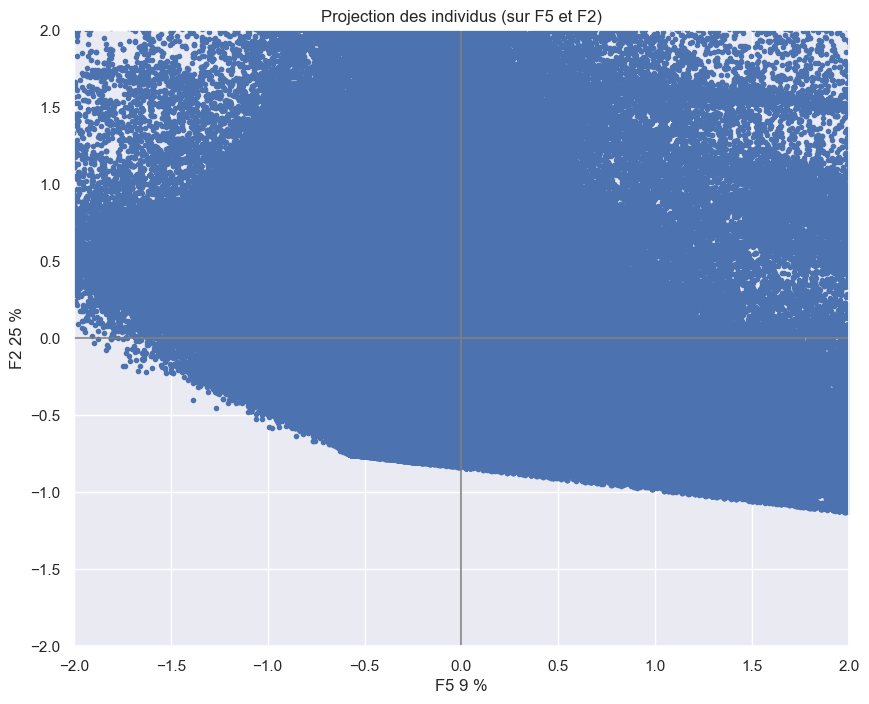

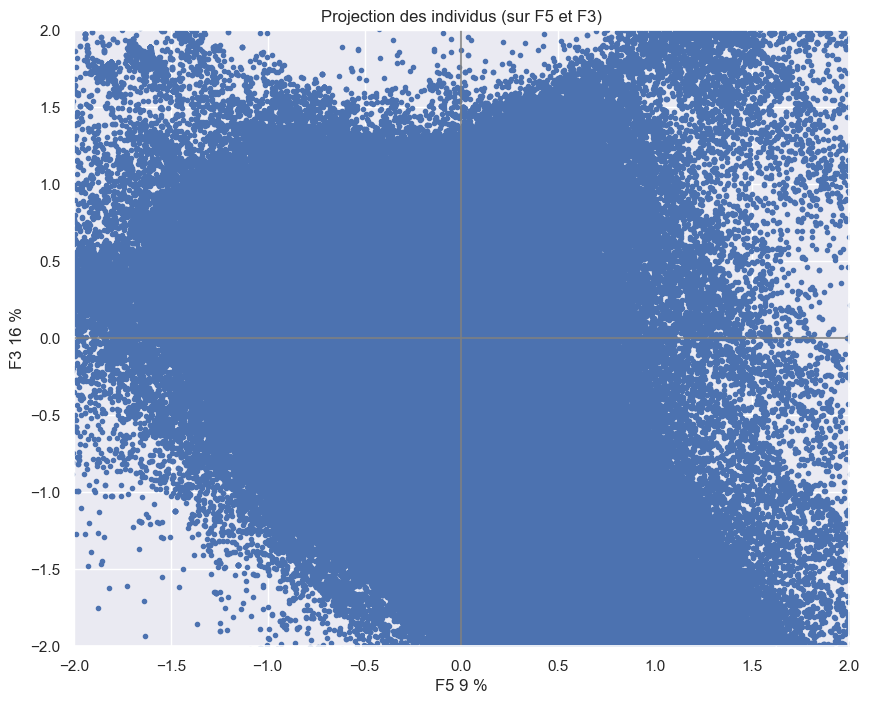

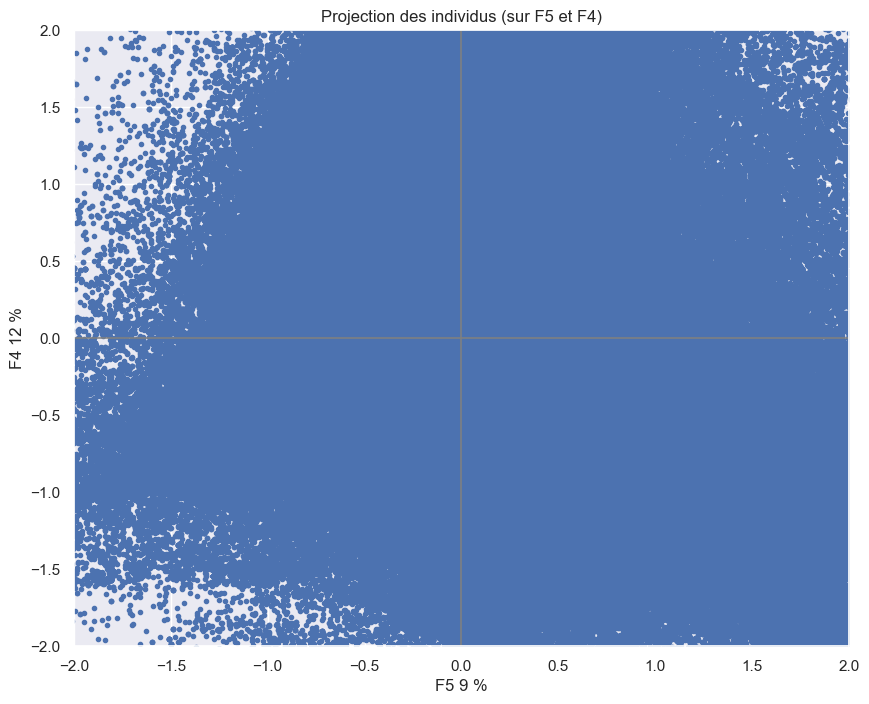

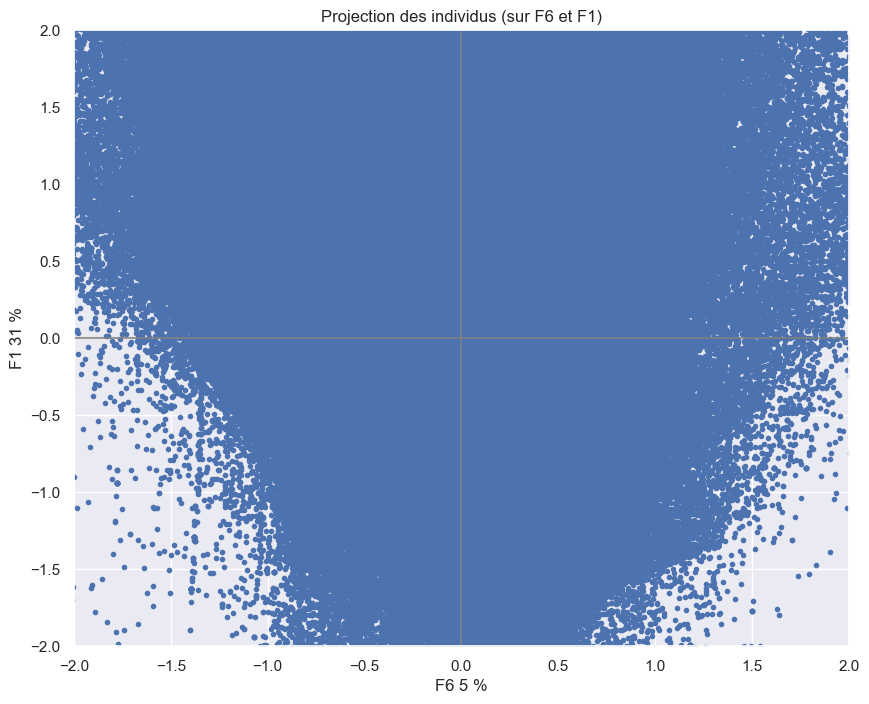

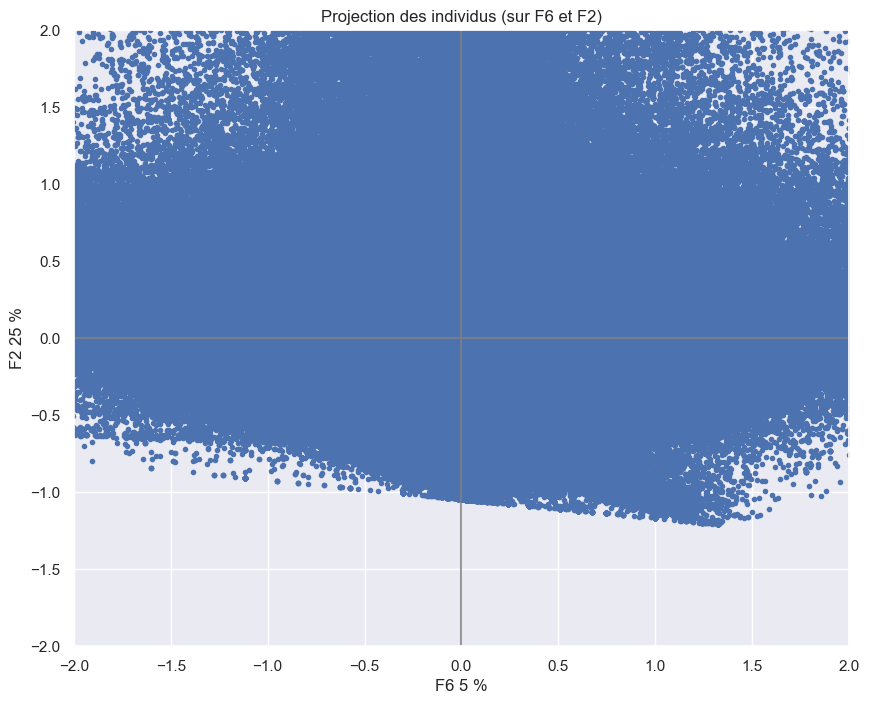

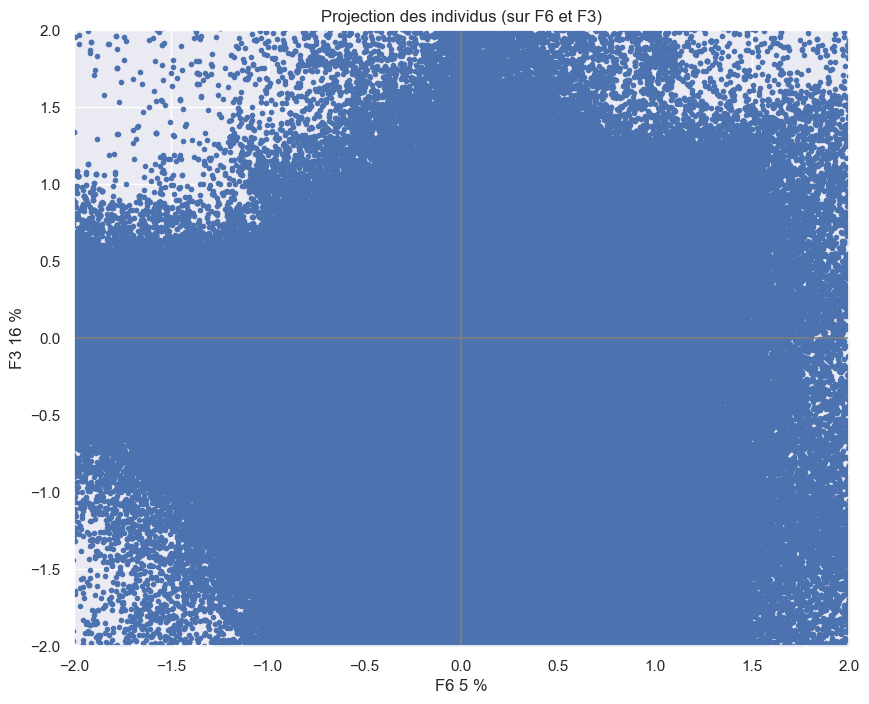

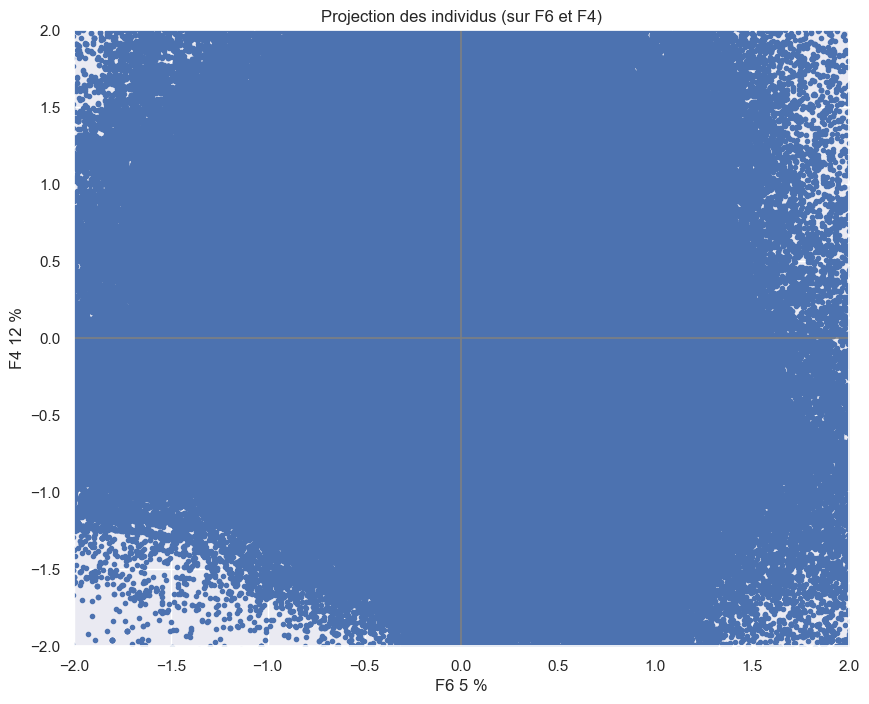

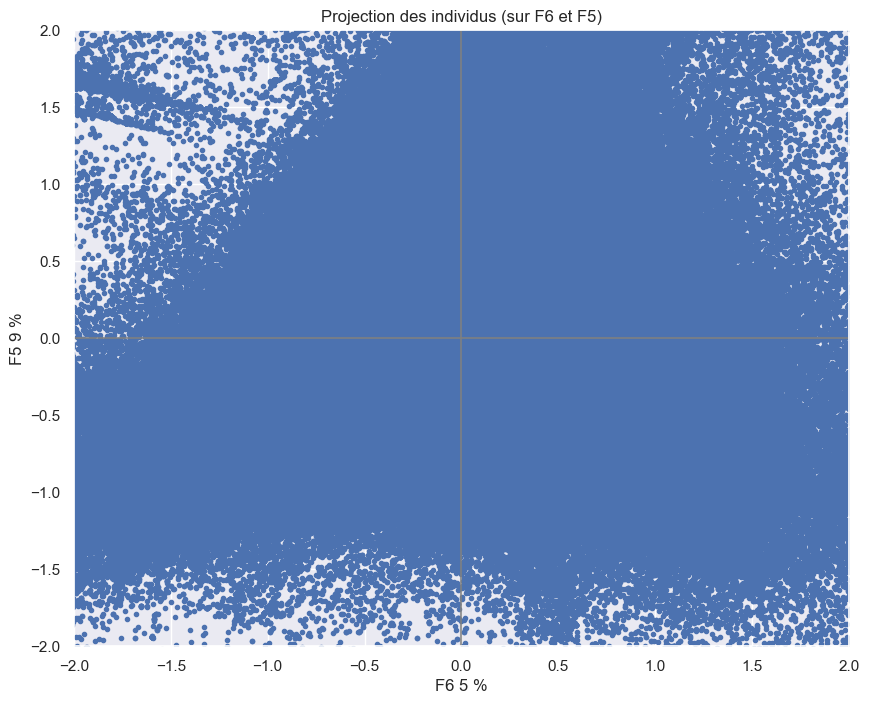

In [46]:
for i in range (0,6):
    for j in range(0,i+1):
        if i != j:
            x_y = [i,j]
            display_factorial_planes_zoomed(X_proj, x_y, pca)

In [47]:
# Bon, pas très utile, on va faire du clustering avant. Ayant 900 000 variable théoriquement différentes, on va voir si
# le Kmean nous donne des résultats utiles.

In [48]:
X_cr # Nos valeurs centrés et réduites

array([[-8.16351582e-04, -1.58275926e-01,  3.42572362e-02, ...,
        -2.24564903e-01, -4.88401122e-02, -4.89513926e-02],
       [-1.37727706e-02, -1.76675009e-01, -5.69852046e-01, ...,
        -5.40355342e-02, -2.61152793e-01, -2.57176785e-01],
       [-1.76208714e-01,  8.24104411e-01, -9.46439630e-01, ...,
         4.06213155e-01, -3.24294339e-01, -3.18544116e-01],
       ...,
       [-8.16351582e-04, -1.58275926e-01,  3.42572362e-02, ...,
        -2.24564903e-01, -4.88401122e-02, -4.89513926e-02],
       [ 2.09789450e+00,  4.95490292e-01, -1.38258954e+00, ...,
        -3.59795153e-01,  2.94879975e-01,  2.83232014e-01],
       [-8.16351582e-04, -1.58275926e-01,  3.42572362e-02, ...,
        -2.24564903e-01, -4.88401122e-02, -4.89513926e-02]])

In [49]:
intertia_list = [ ]
k_list = range(1, 25)
for k in k_list : 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_cr)
    intertia_list.append(kmeans.inertia_)

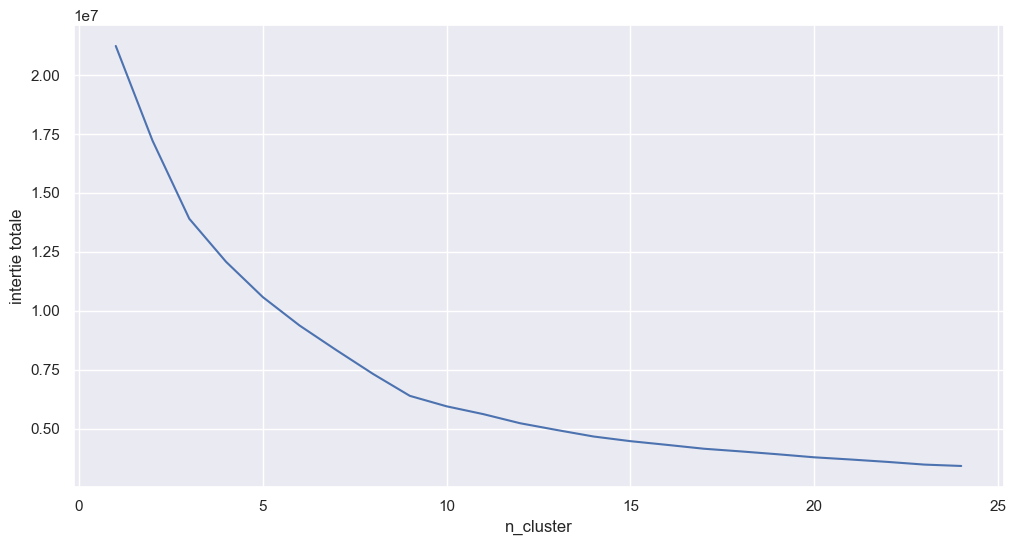

In [50]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("intertie totale")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia_list)

In [74]:
# Choisissons de faire 9 clusters :
nb_cluster = 9
kmeans = KMeans(n_clusters=nb_cluster)
kmeans.fit(X_cr)
dic = {i : 'Cl{}'.format(i+1) for i in range(nb_cluster)}
labels = [dic[i] for i in kmeans.labels_]
data['Cluser Kmean'] = labels

<AxesSubplot:xlabel='Cluser Kmean'>

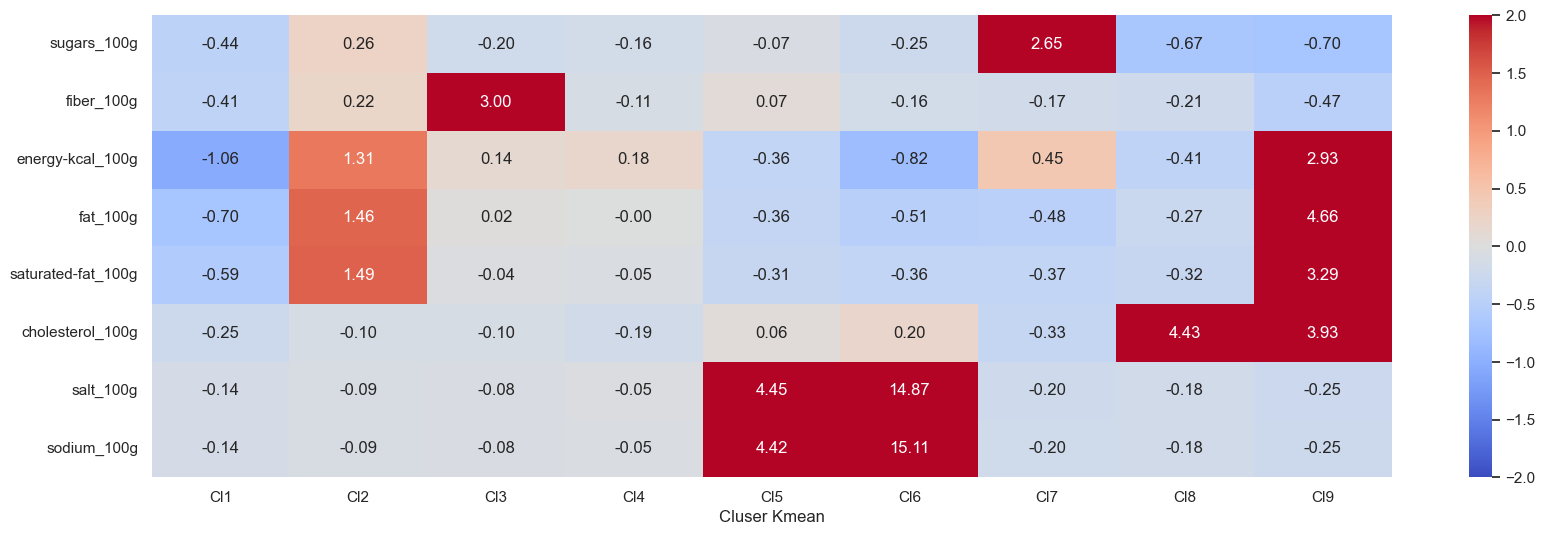

In [88]:
# Voyons voir les eq type intra classe sur les données centrés réduites
data_cr = pd.DataFrame(X_cr, columns = data_float.columns)
data_cr['Cluser Kmean'] = labels
heat = data_cr.groupby('Cluser Kmean').mean()
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(heat.T, vmin=-2, vmax=2, annot=True, cmap="coolwarm", fmt="0.2f")

In [76]:
# Puis la moyenne et l'écart type sans centrage réduction et comparons au data non clusterisés
data.groupby('Cluser Kmean').mean()

sugars_100g  fiber_100g  energy-kcal_100g   fat_100g  \
Cluser Kmean                                                         
Cl1              5.245401    1.958682         80.626078   2.384725   
Cl2             17.345552    4.754646        491.482821  36.382681   
Cl3              9.474389   17.192290        287.668540  13.709251   
Cl4             10.143620    3.319870        295.868975  13.318291   
Cl5             11.564346    4.087876        201.051486   7.728251   
Cl6              8.585529    3.056617        121.760386   5.389670   
Cl7             58.530288    3.020961        341.123232   5.786207   
Cl8              1.359228    2.849242        192.839878   9.155381   
Cl9              0.798221    1.682441        772.847786  86.974664   

              saturated-fat_100g  cholesterol_100g  salt_100g  sodium_100g  
Cluser Kmean                                                                
Cl1                     0.758752          0.016539   0.968305     0.387581  
Cl2                    15.237106          0.032012   1.184259     0.473823  
Cl3                     4.622857          0.032396   1.266569     0.506784  
Cl4                     4.518327          0.022891   1.404889     0.563666  
Cl5                     2.707821          0.048566  22.479634     9.182148  
Cl6                     2.383106          0.062837  71.267540    29.780659  
Cl7                     2.299584          0.007888   0.663154     0.265494  
Cl8                     2.671993          0.501093   0.779184     0.311846  
Cl9                    27.741131          0.449661   0.444503     0.178549

In [77]:
data.groupby('Cluser Kmean').std()

sugars_100g  fiber_100g  energy-kcal_100g   fat_100g  \
Cluser Kmean                                                         
Cl1              6.306628    2.172373         58.827522   3.416214   
Cl2             18.404737    4.073943        118.564523  13.973076   
Cl3             13.676272    6.283455        154.483673  12.111420   
Cl4              7.422785    1.980570         79.172100   6.345935   
Cl5             18.983614    5.205819        169.335733  13.513036   
Cl6             18.399431    4.835902        170.002160  13.173622   
Cl7             16.394273    3.521393        104.489605   8.500552   
Cl8              6.954426    4.635550        185.048057  13.217635   
Cl9              4.180041    3.450916        166.159253  15.277127   

              saturated-fat_100g  cholesterol_100g  salt_100g  sodium_100g  
Cluser Kmean                                                                
Cl1                     1.252830          0.027961   1.711595     0.685793  
Cl2                     7.360691          0.040970   1.483033     0.594604  
Cl3                     5.560332          0.070980   1.822472     0.730228  
Cl4                     2.729974          0.024036   1.147983     0.459217  
Cl5                     5.652771          0.116521   8.629789     3.505066  
Cl6                     7.389517          0.148212  19.551044     7.386369  
Cl7                     3.936003          0.024098   1.695444     0.679301  
Cl8                     4.910643          0.069236   2.051434     0.822618  
Cl9                    23.539359          0.155756   2.109290     0.851082

In [55]:
data_float.describe().loc[['mean','std'],:]

sugars_100g  fiber_100g  energy-kcal_100g   fat_100g  \
mean    12.837409    3.788534        263.862350  13.378387   
std     17.237567    4.463189        173.487785  15.807811   

      saturated-fat_100g  cholesterol_100g  salt_100g  sodium_100g  
mean            4.883243          0.042263   1.618883     0.654034  
std             6.954662          0.103567   4.683658     1.927628

In [56]:
def histo_comparaison_cluster(i):
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    df1 = data.groupby('Cluser Kmean').mean()
    
    labelx = [ k + '\n n = {}'.format(data.loc[data['Cluser Kmean'] == k].shape[0]) for k in df1.index]
    ax = plt.bar(height = df1[df1.columns[i]],
                 x = labelx)
    plt.axhline(y = data_float.describe().loc['mean',df1.columns[i]],
                color = 'r')
    plt.xlabel('Clusters (ligne rouge = moyenne de toutes les datas)')
    plt.ylabel('valeur moyenne du cluster')
    plt.title(f'Valeur pour {df1.columns[i]}')

None

None

None

None

None

None

None

None

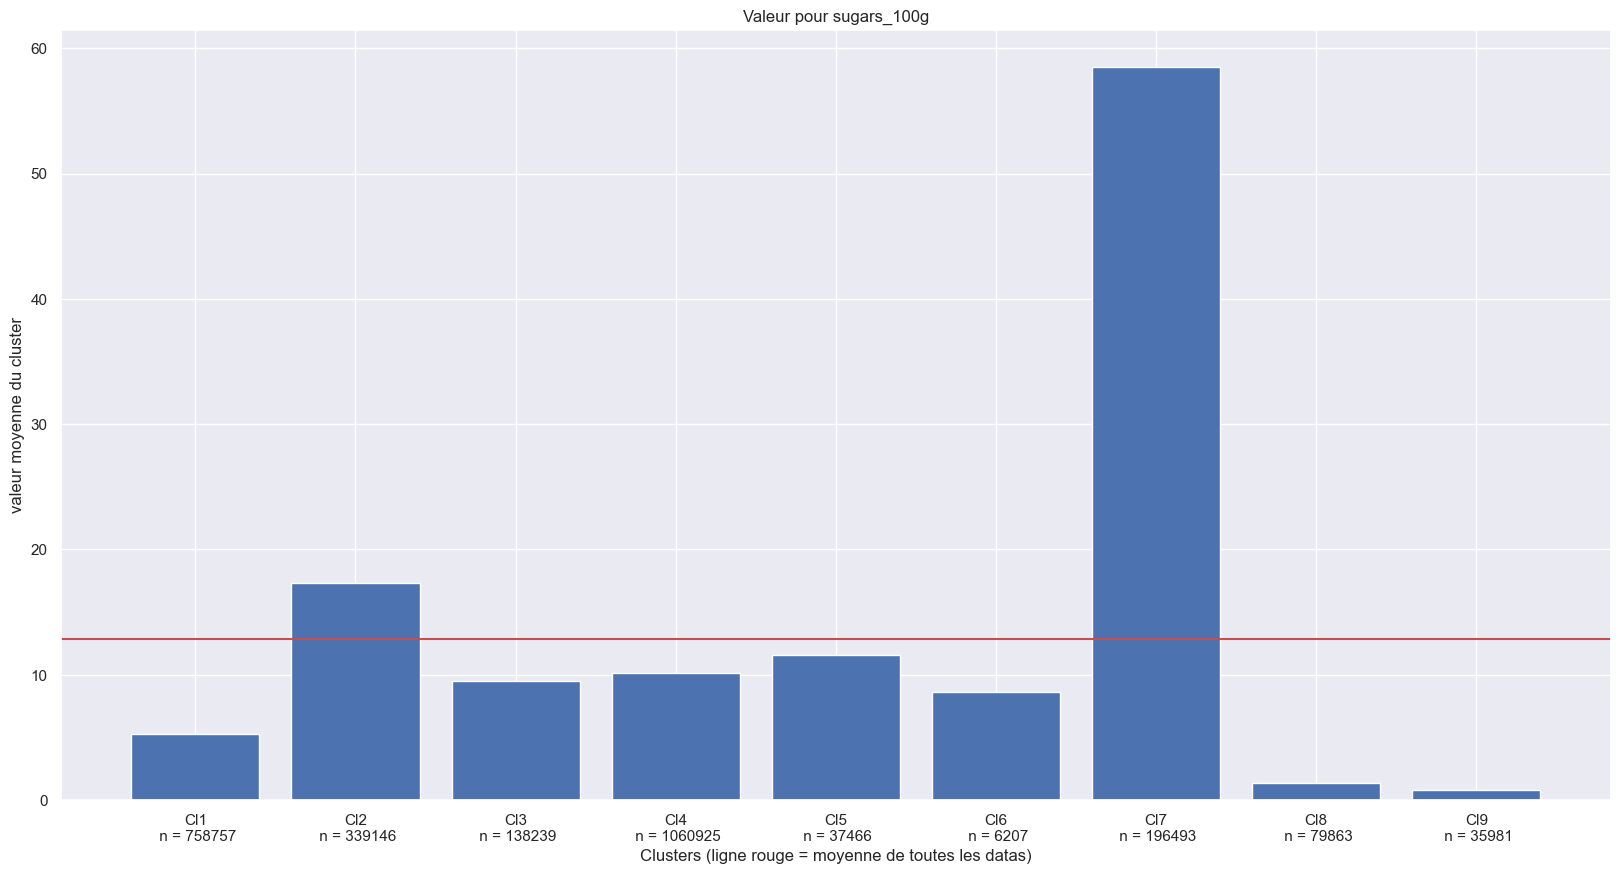

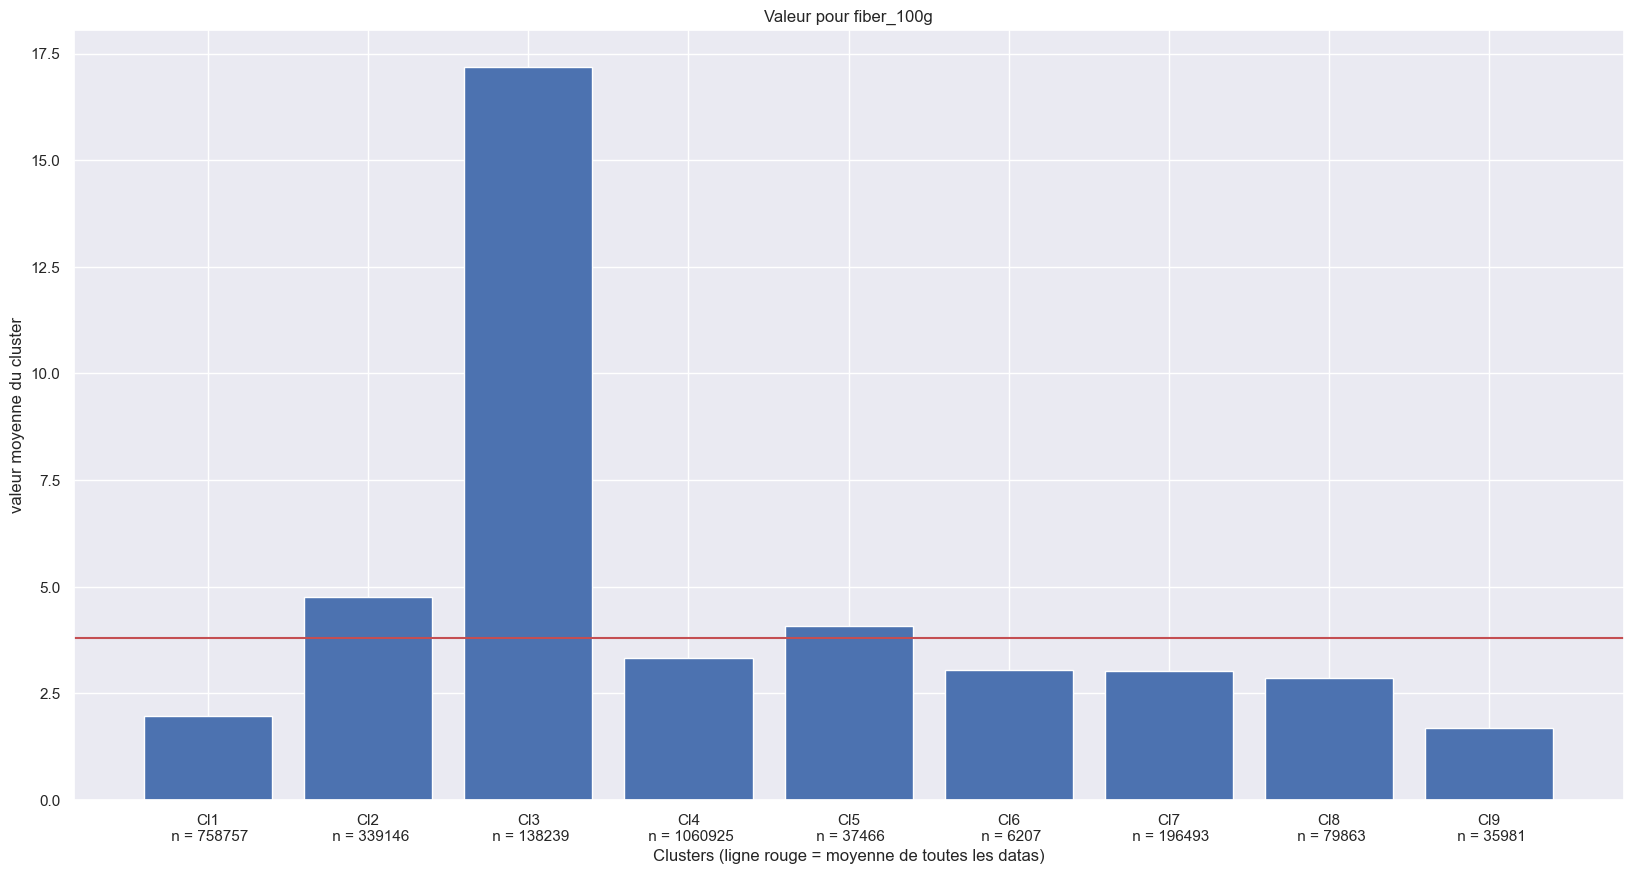

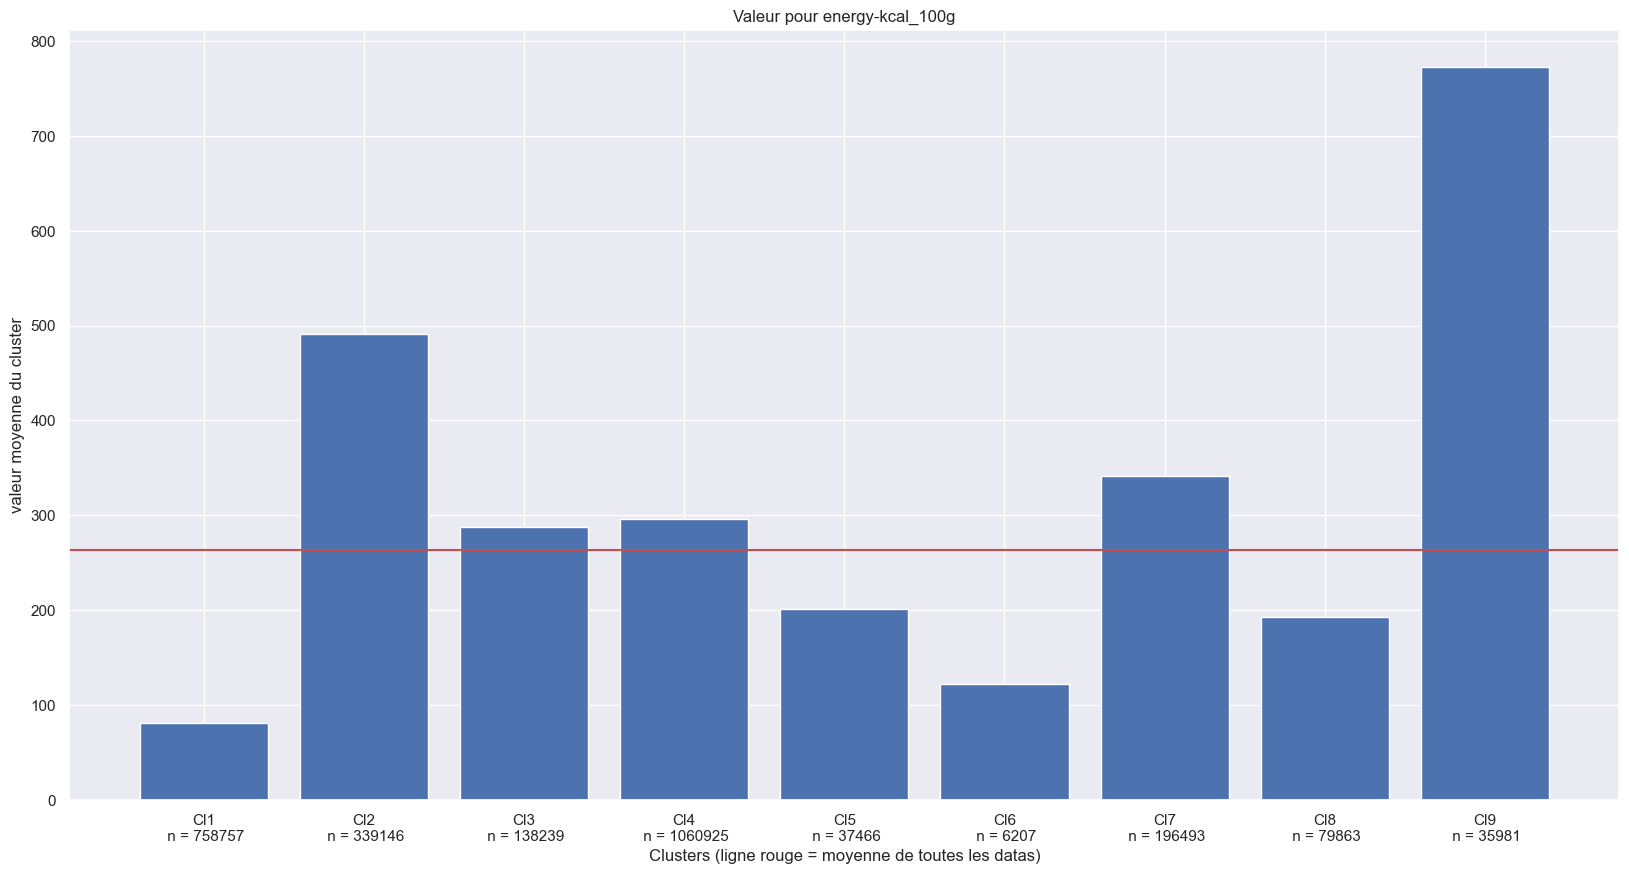

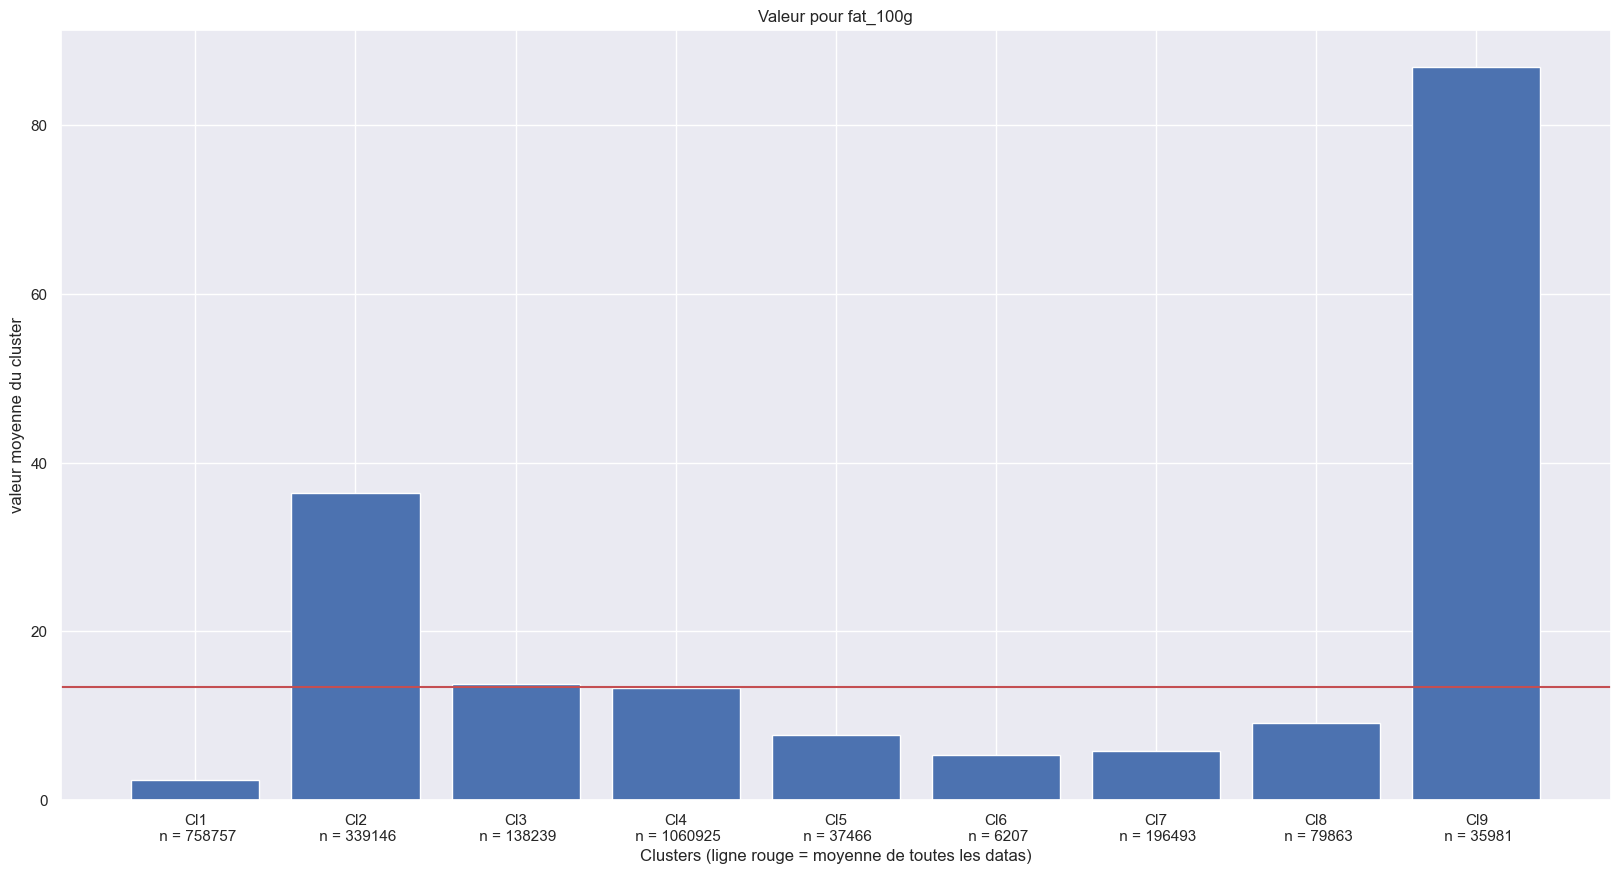

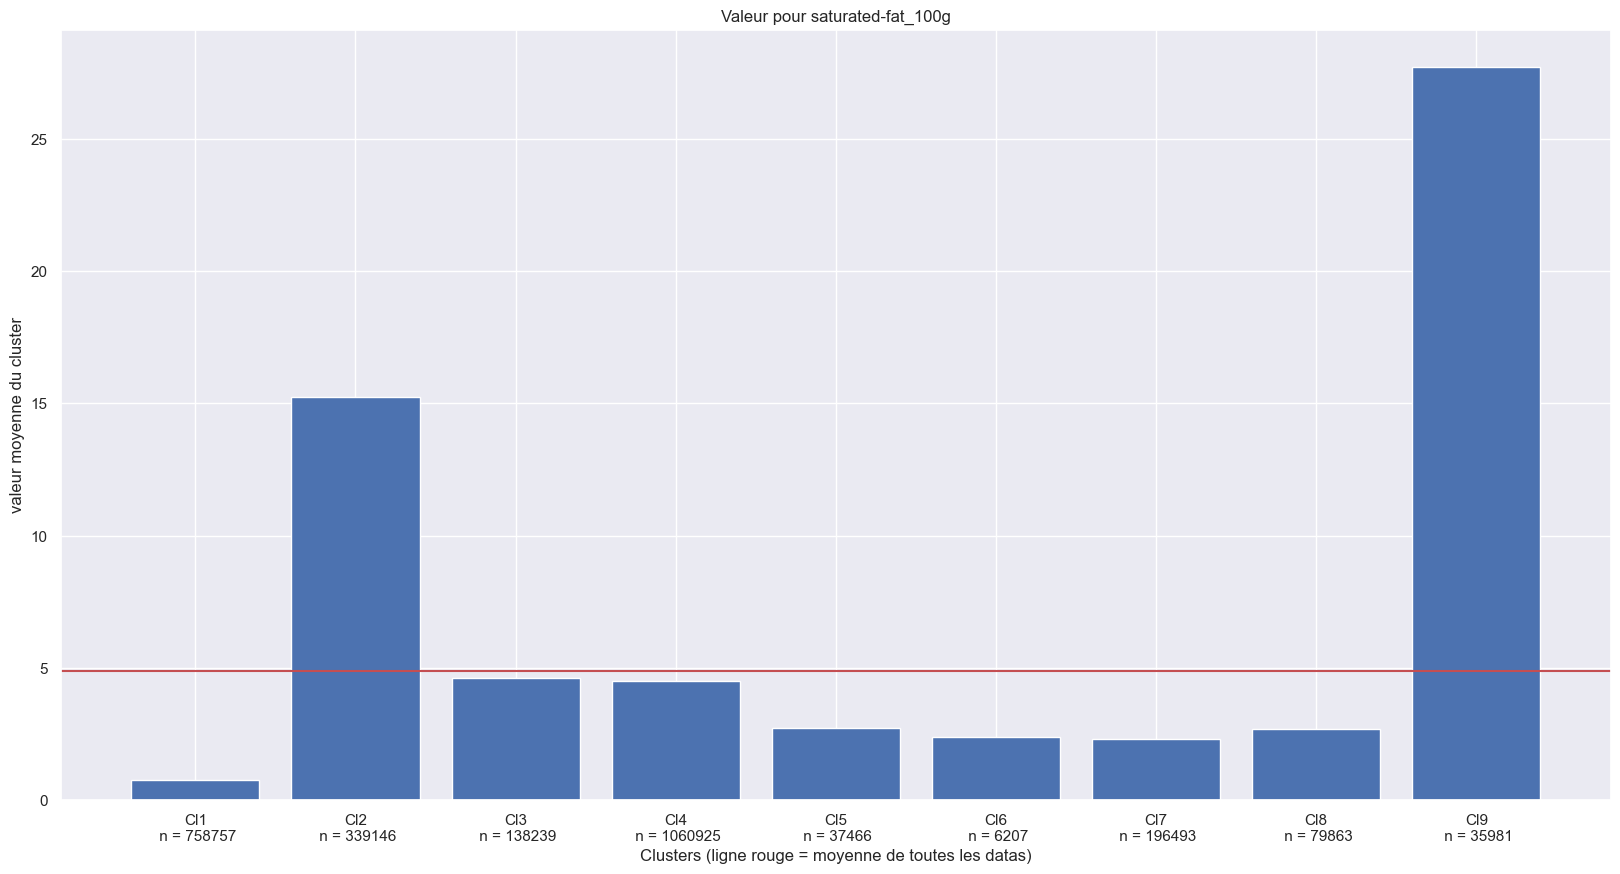

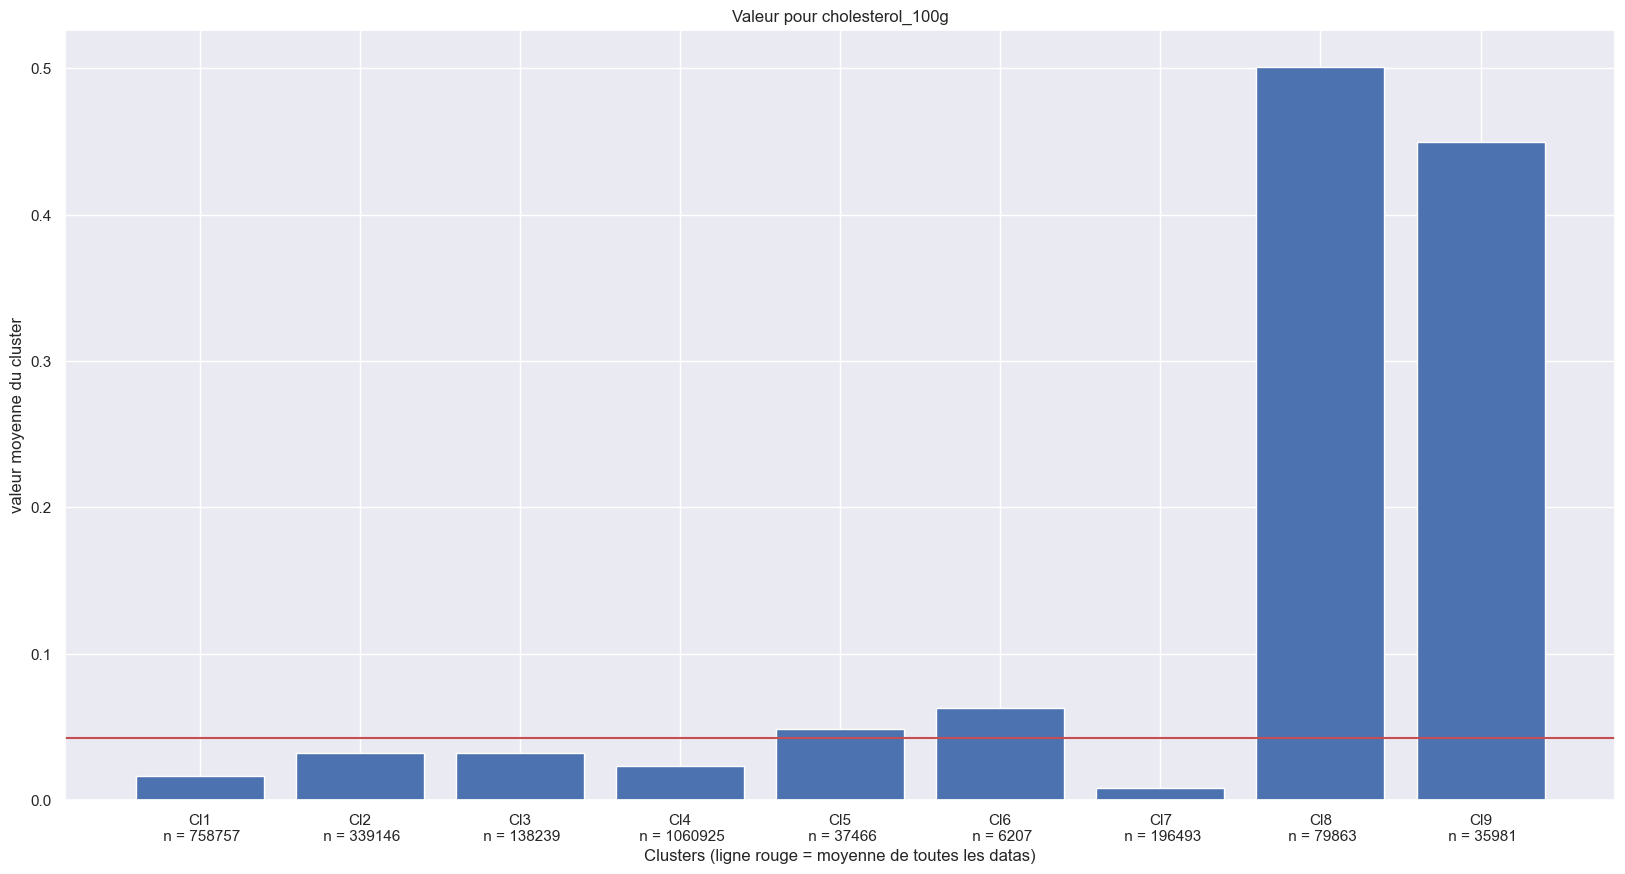

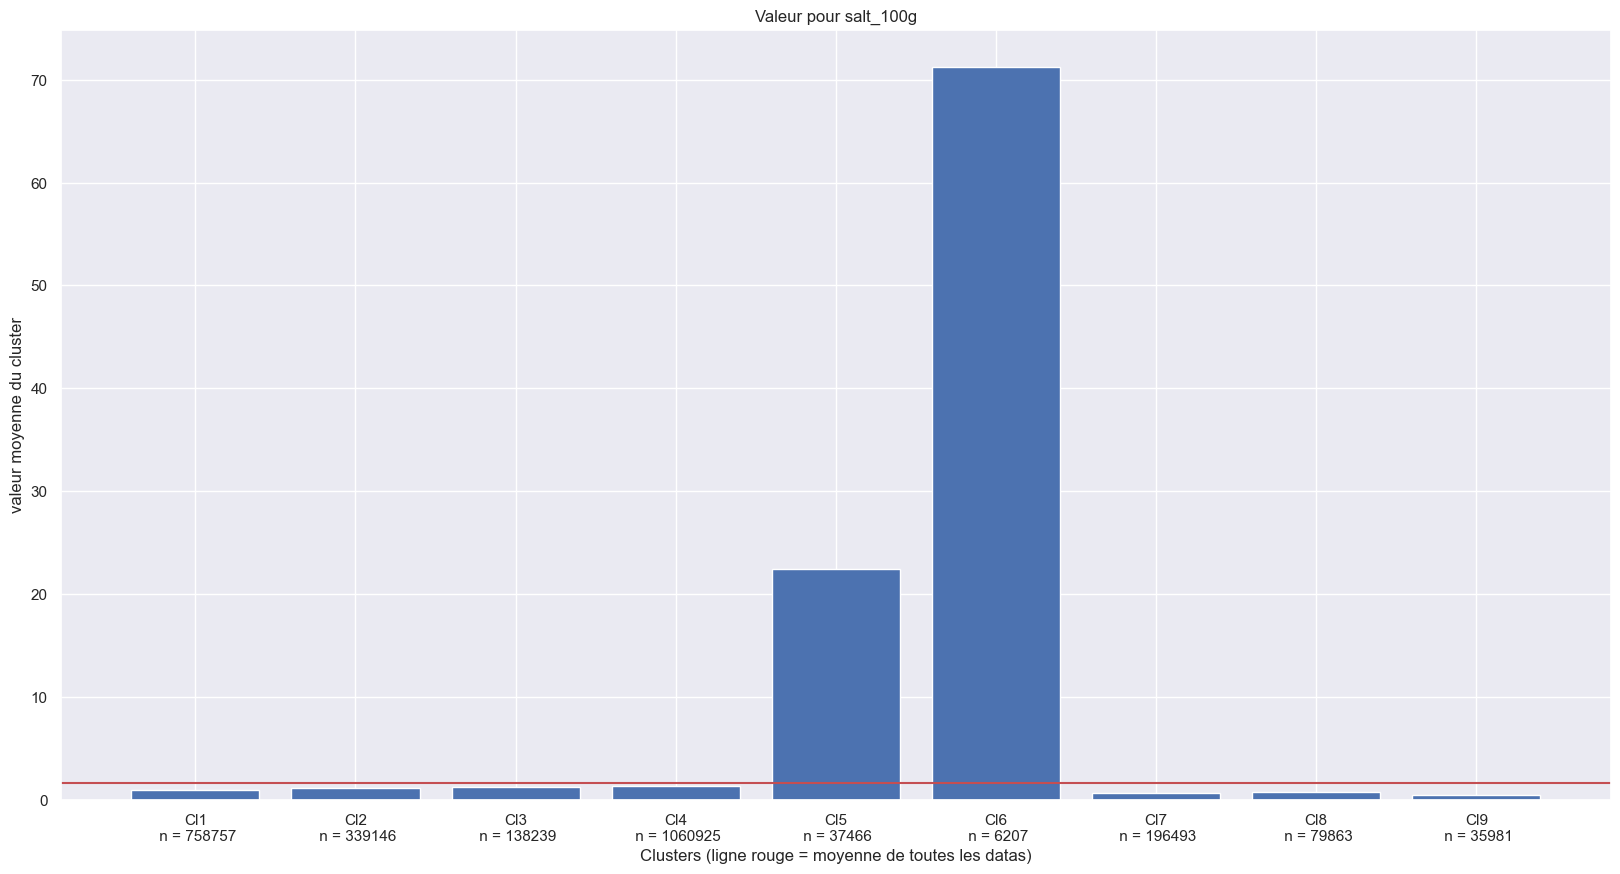

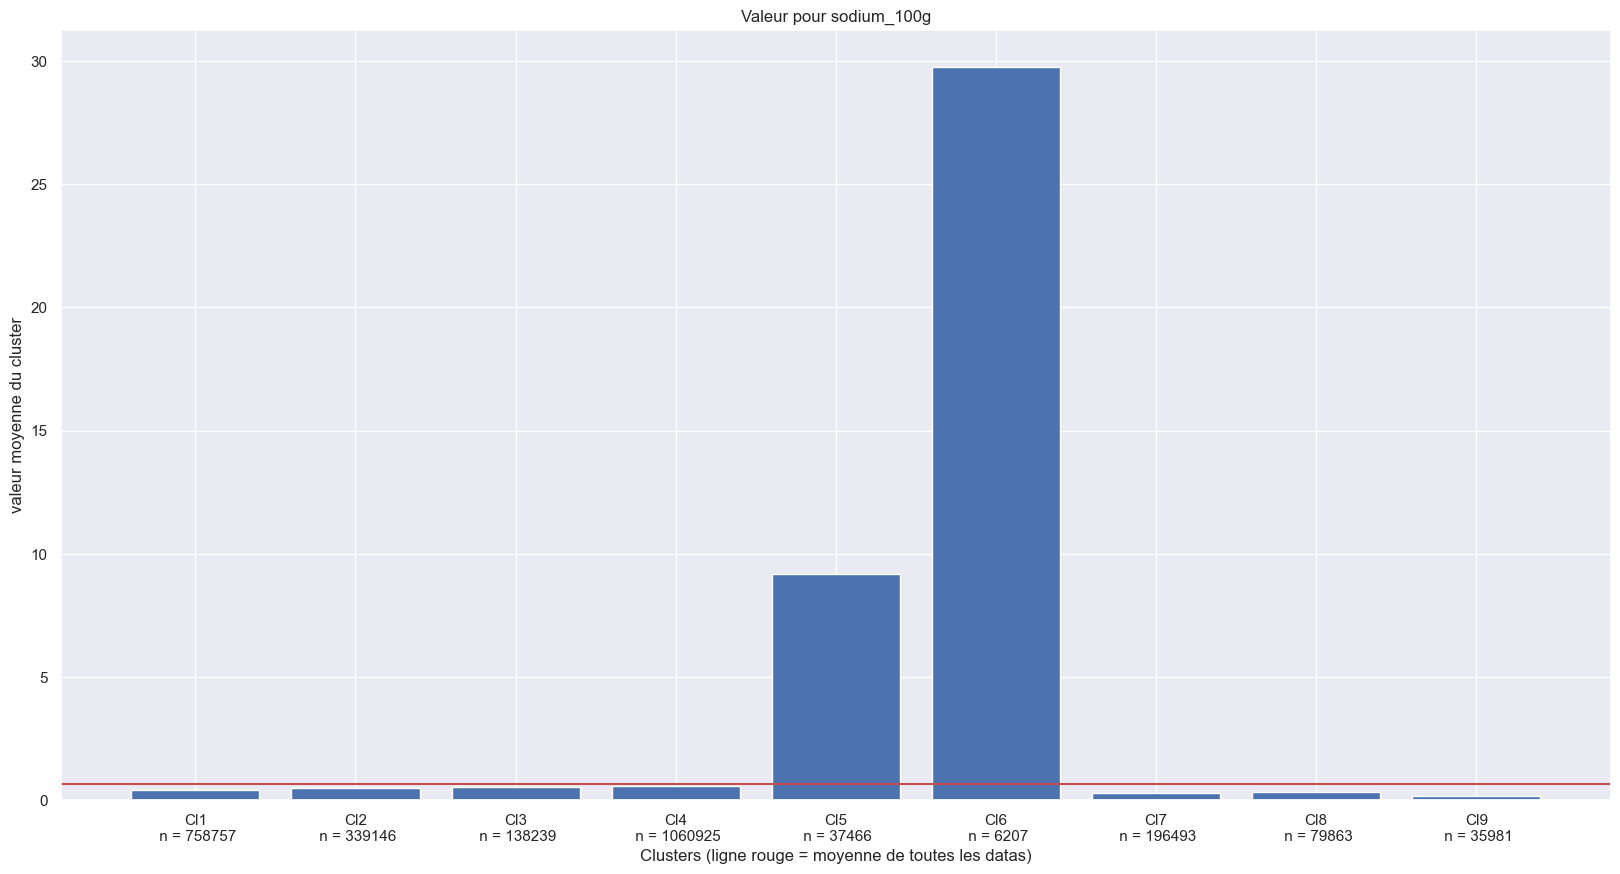

In [89]:
for i in range(data_float.columns.shape[0]):
    display(histo_comparaison_cluster(i))

In [59]:
def histo_comparaison_cluster_cr(i):
    df1 = data_cr.groupby('Cluser Kmean').mean()
    df2 = data_cr.drop(columns = 'Cluser Kmean')
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    labelx = df2.columns
    plt.bar(height = df1.iloc[i,:].T,
            x = labelx,
            color = 'b'
           )
    plt.xlabel('Caractère étudié')
    plt.ylabel('valeur moyenne du cluster après centrage réduction \n Unité : 1 = 1 ecart type \n Moyenne du total = 0 (valeurs centrées)', fontsize = 22)
    plt.title(f"Valeur après centrage réduction pour Cluster {i}. \n n = {data.loc[data['Cluser Kmean'] == f'Cl{i}'].shape[0]}", fontsize = 30)

None

None

None

None

None

None

None

None

None

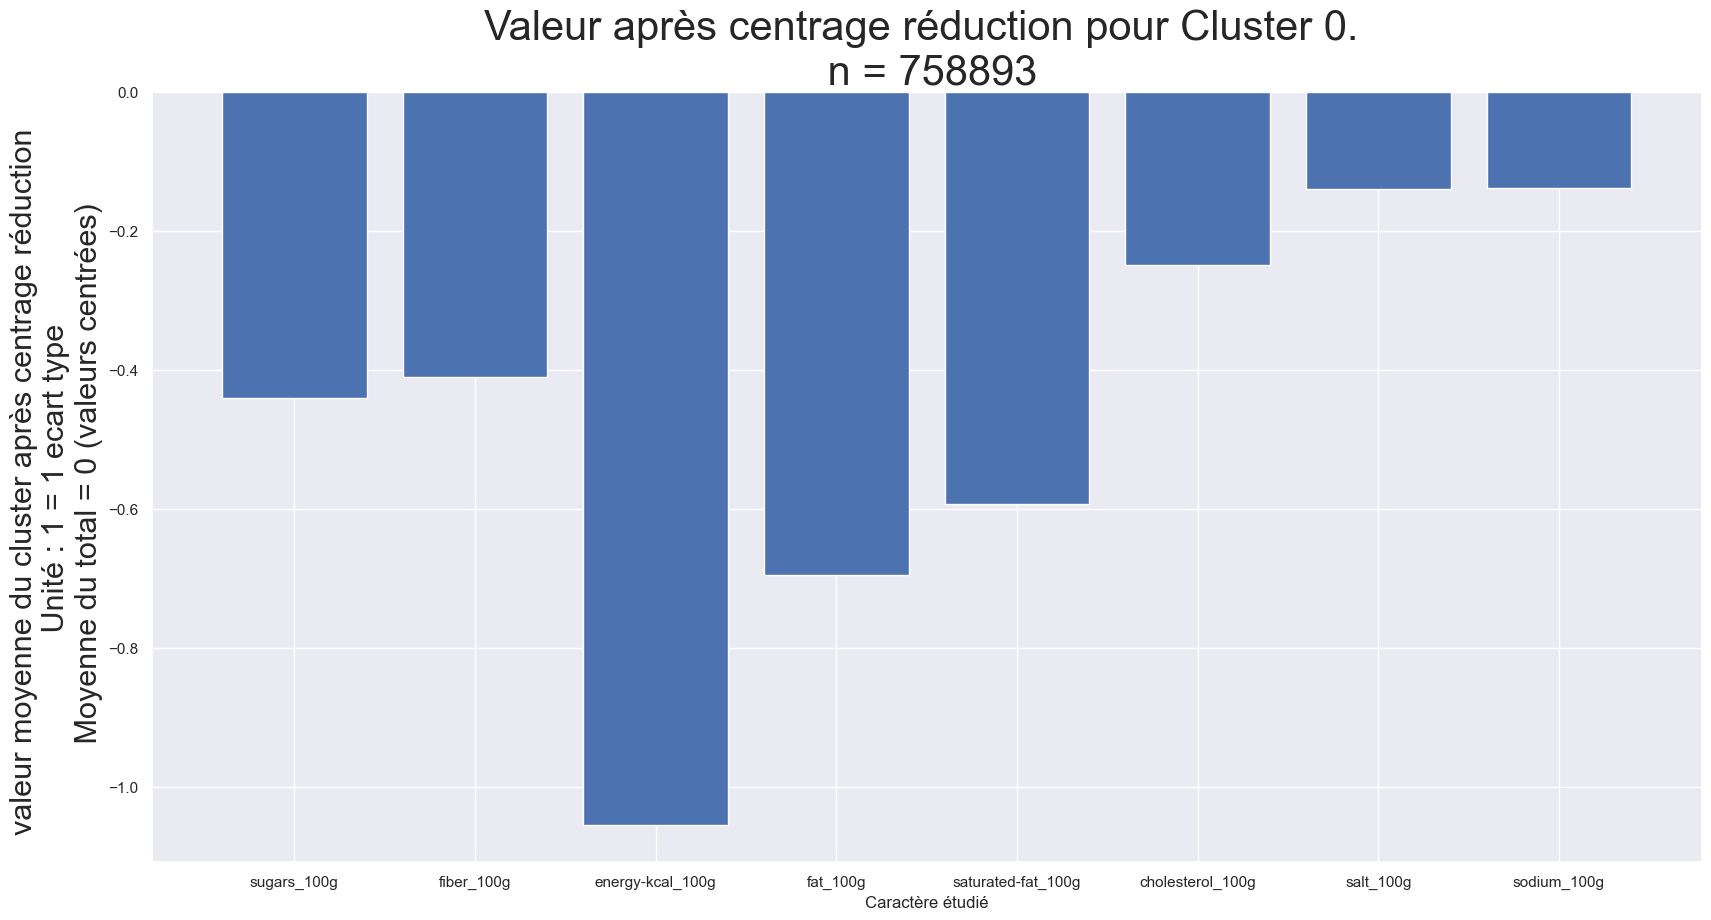

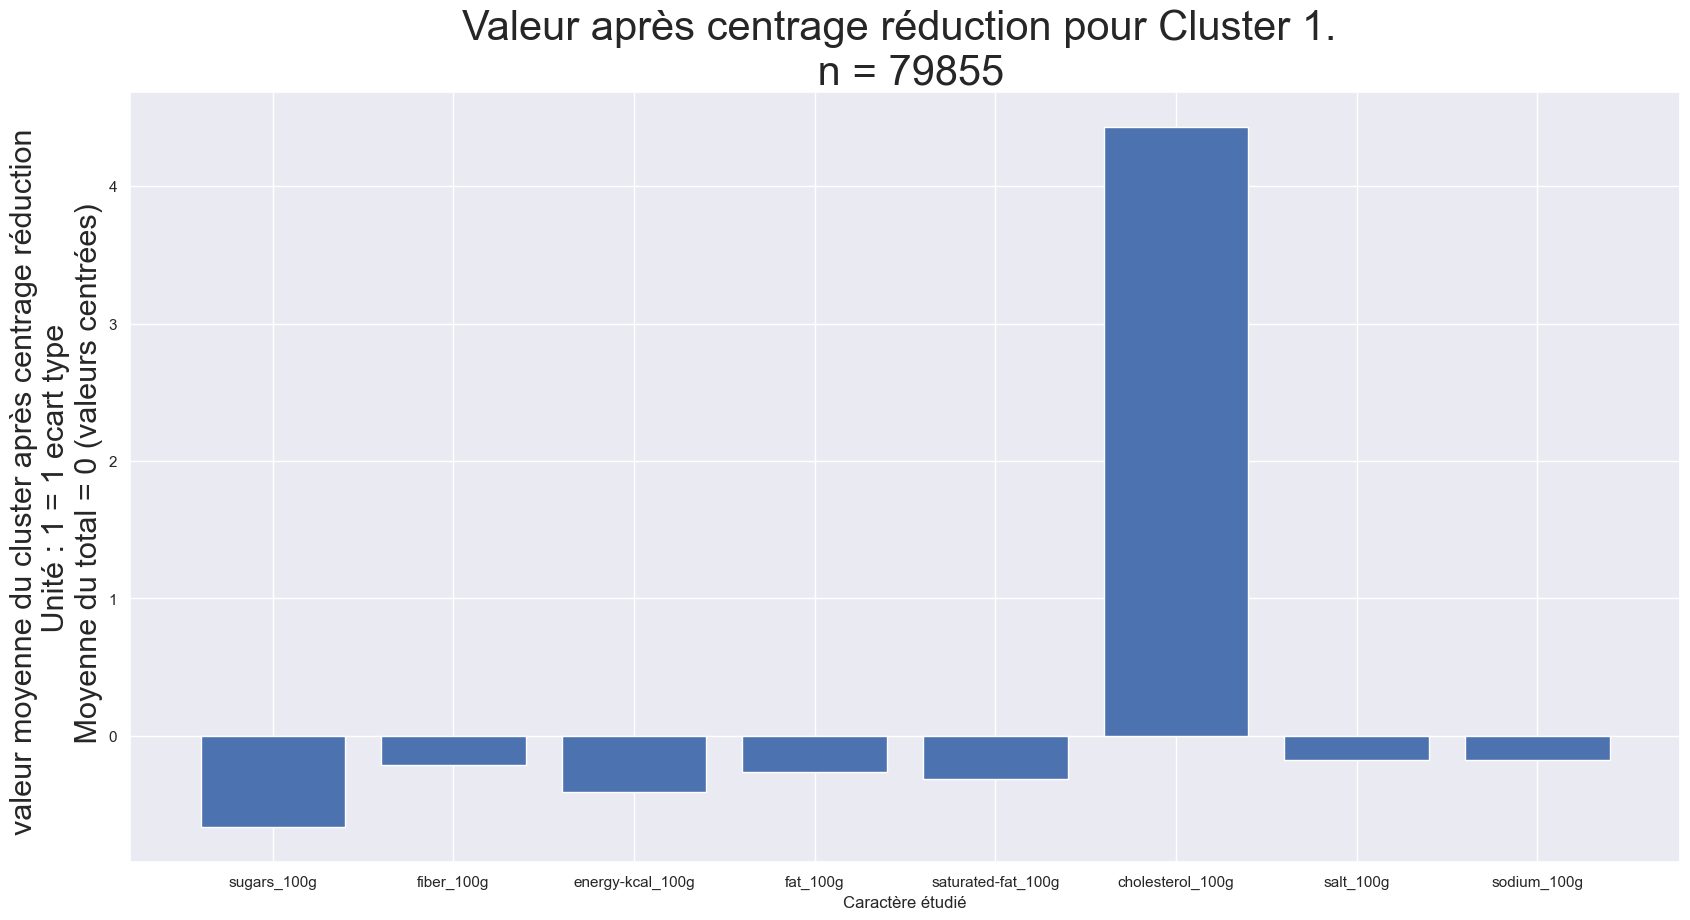

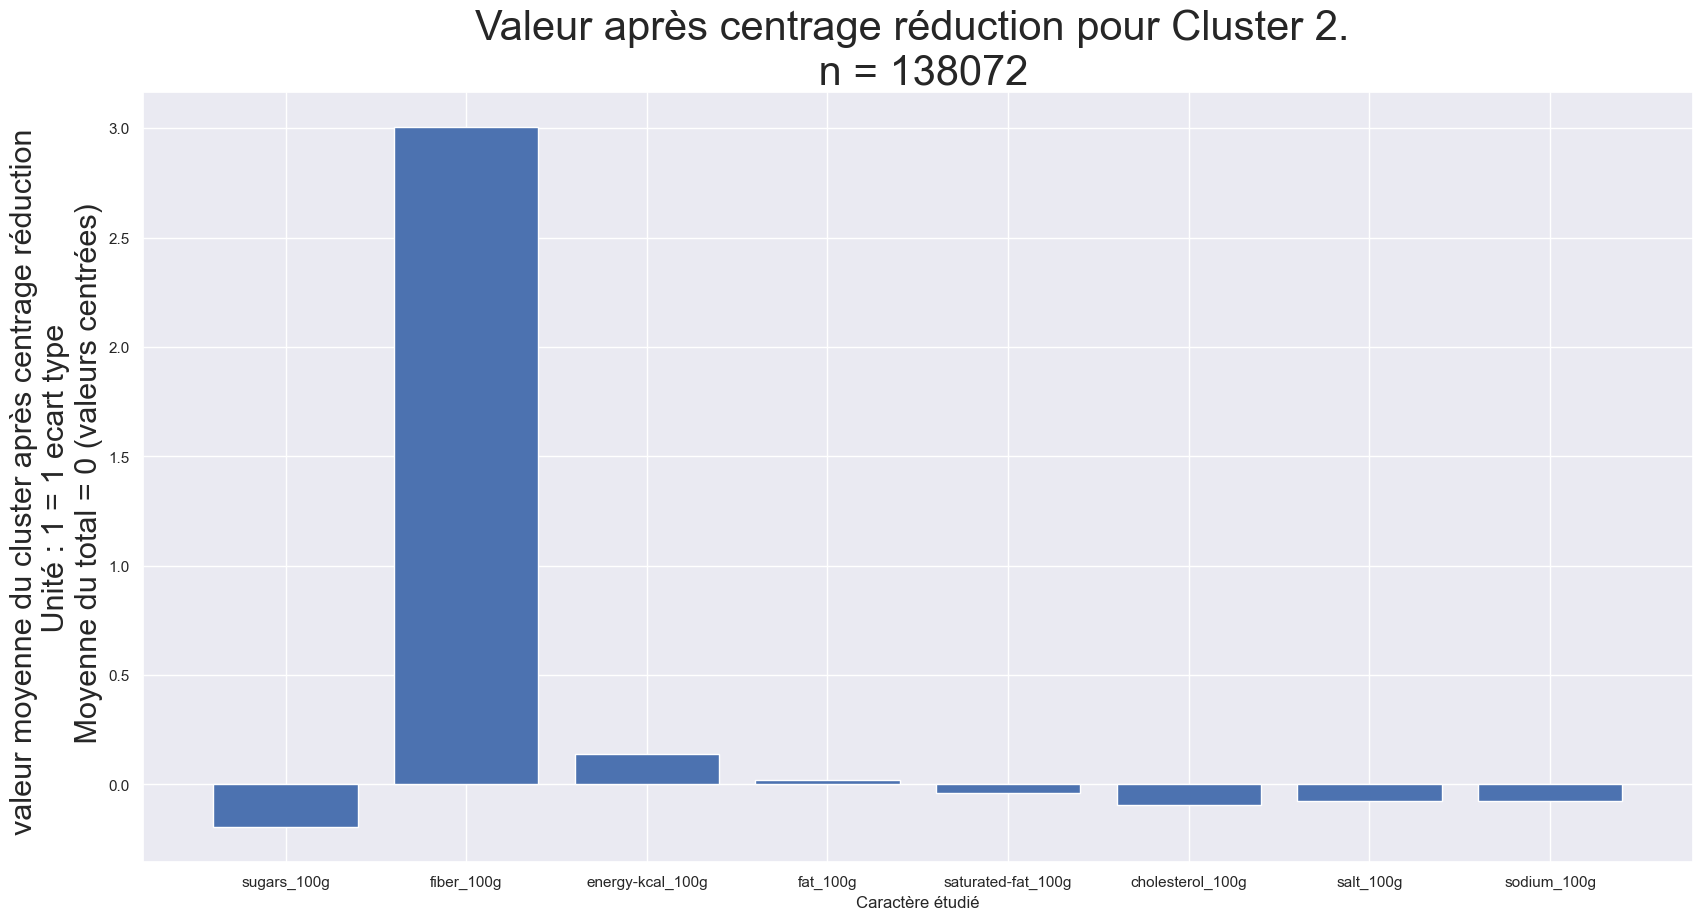

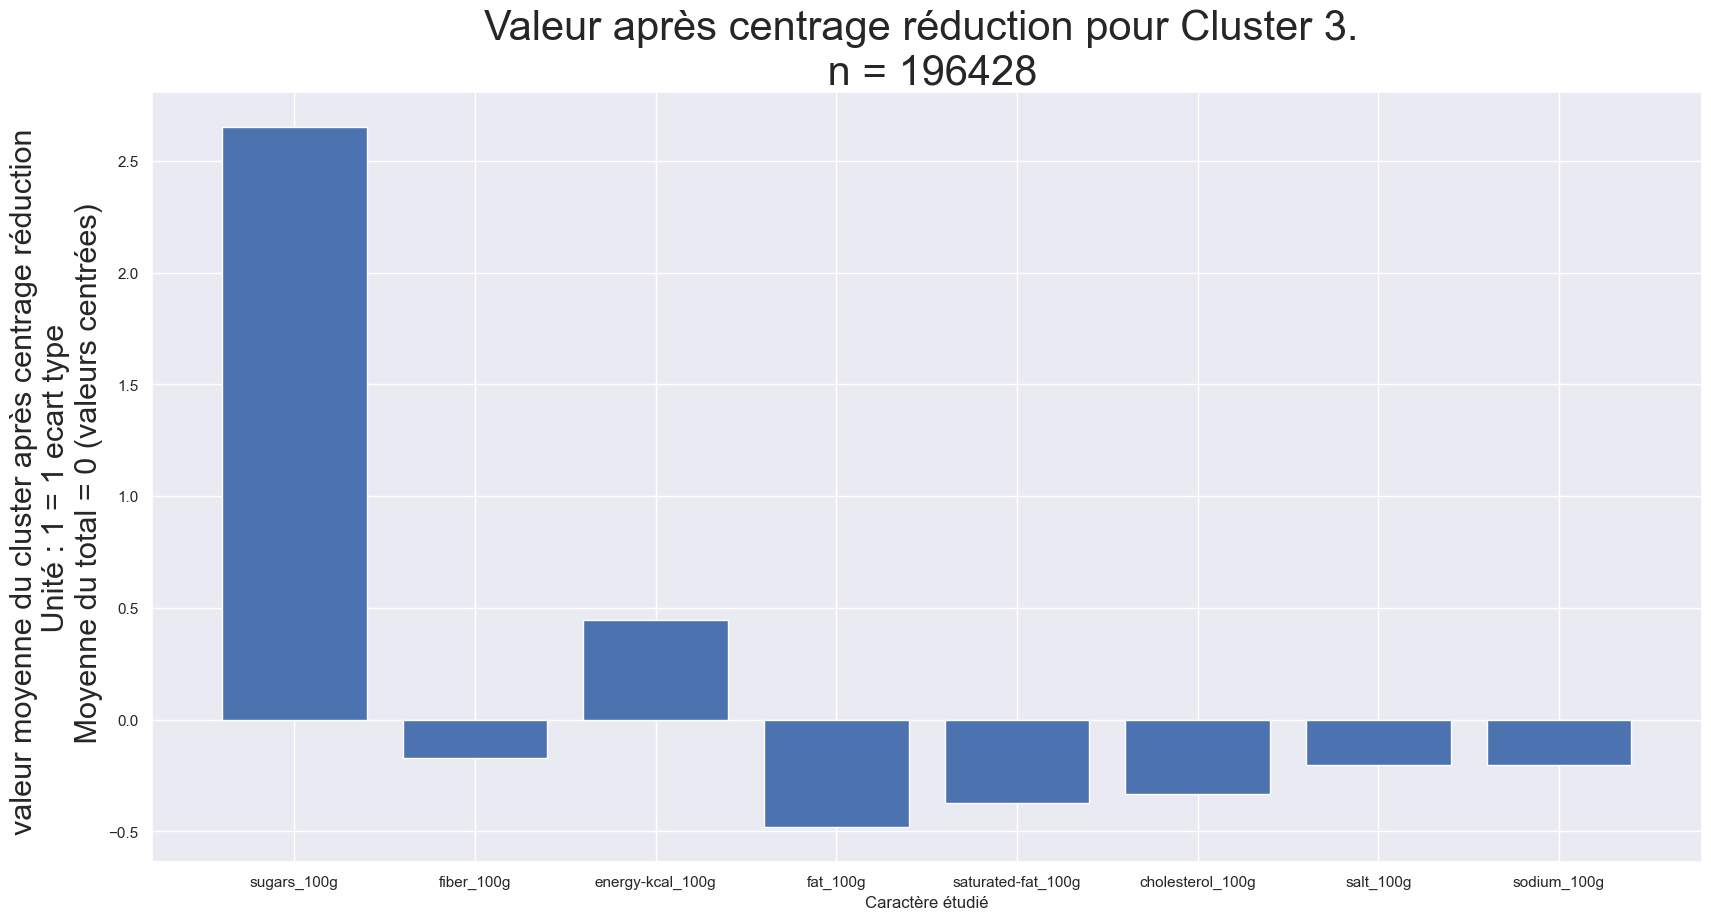

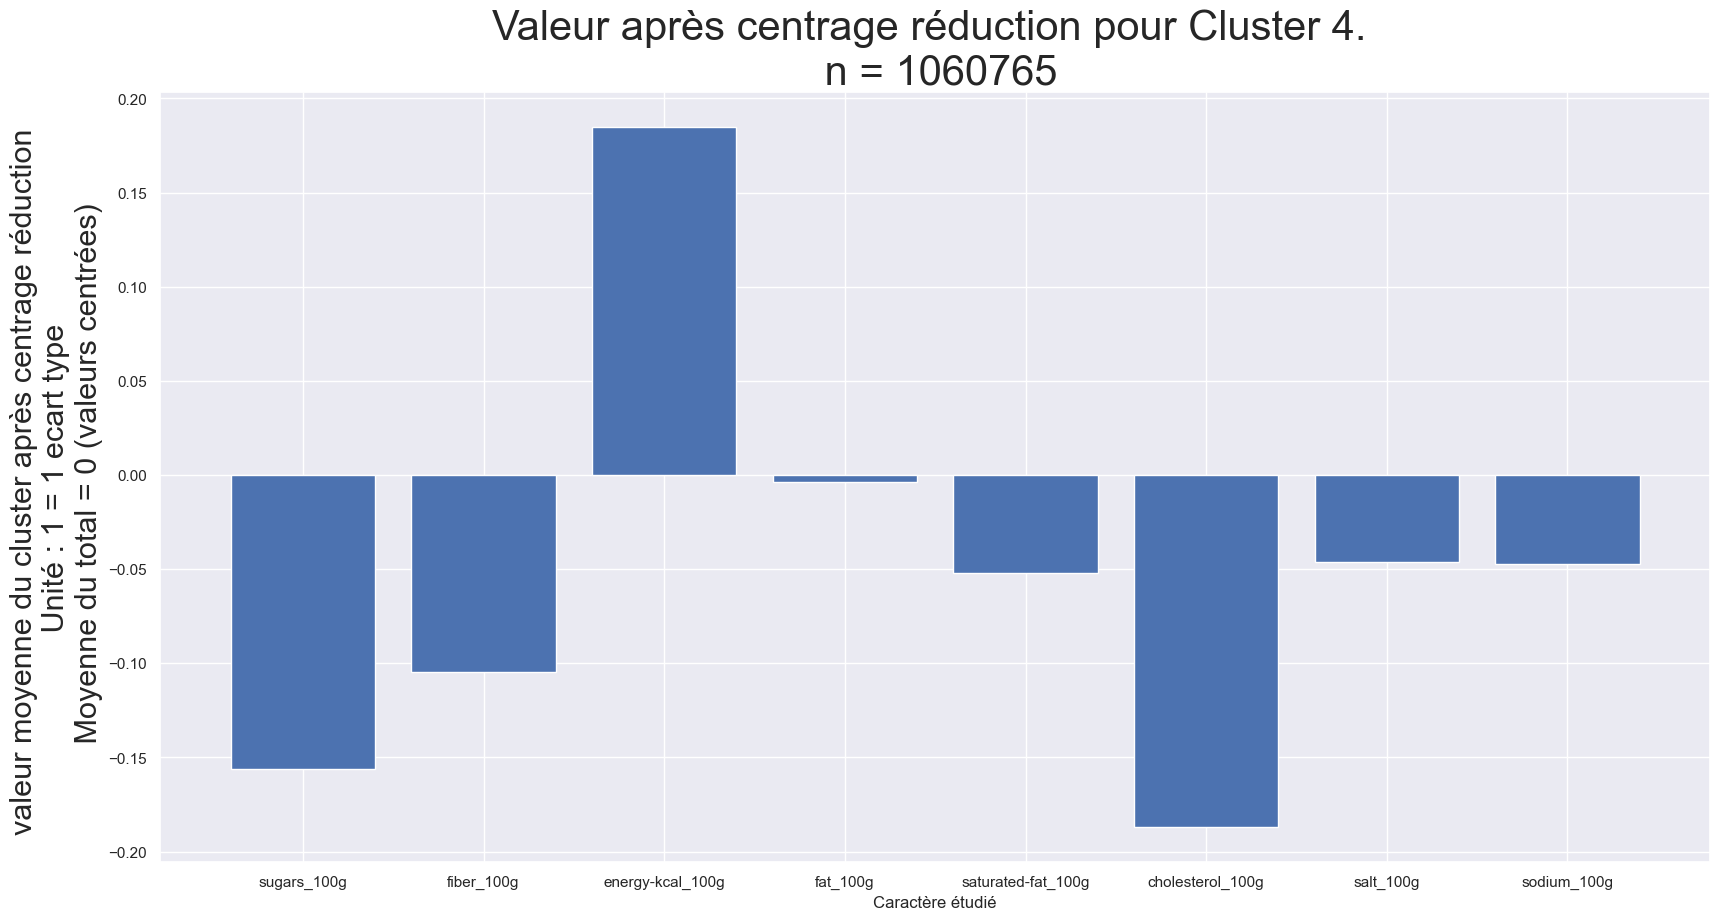

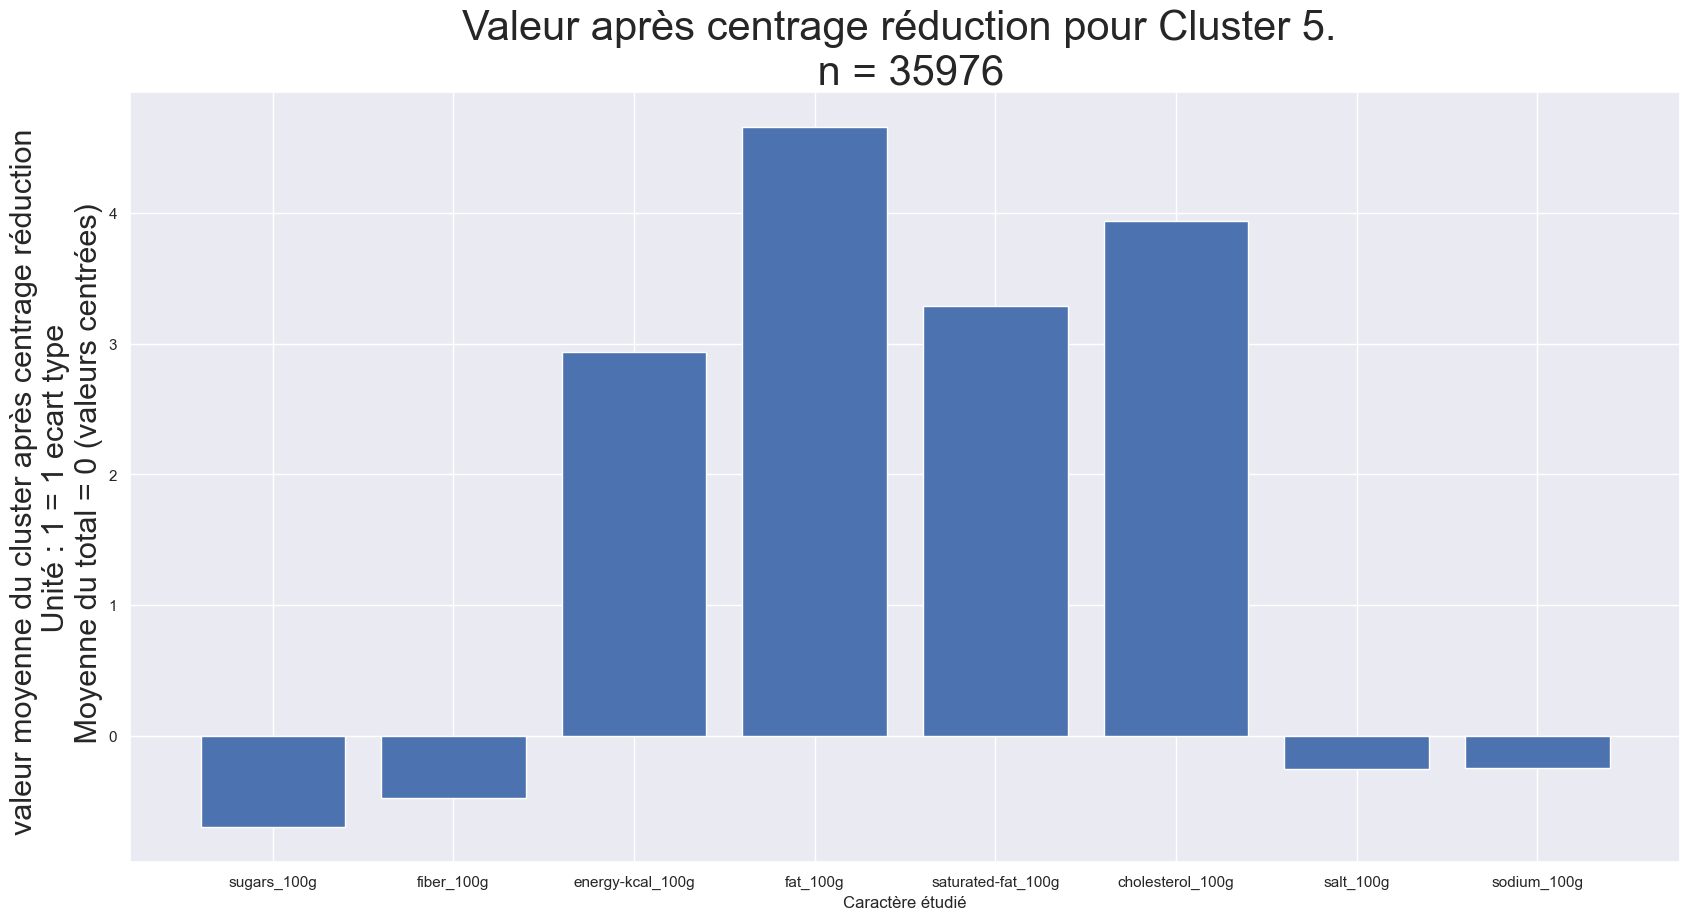

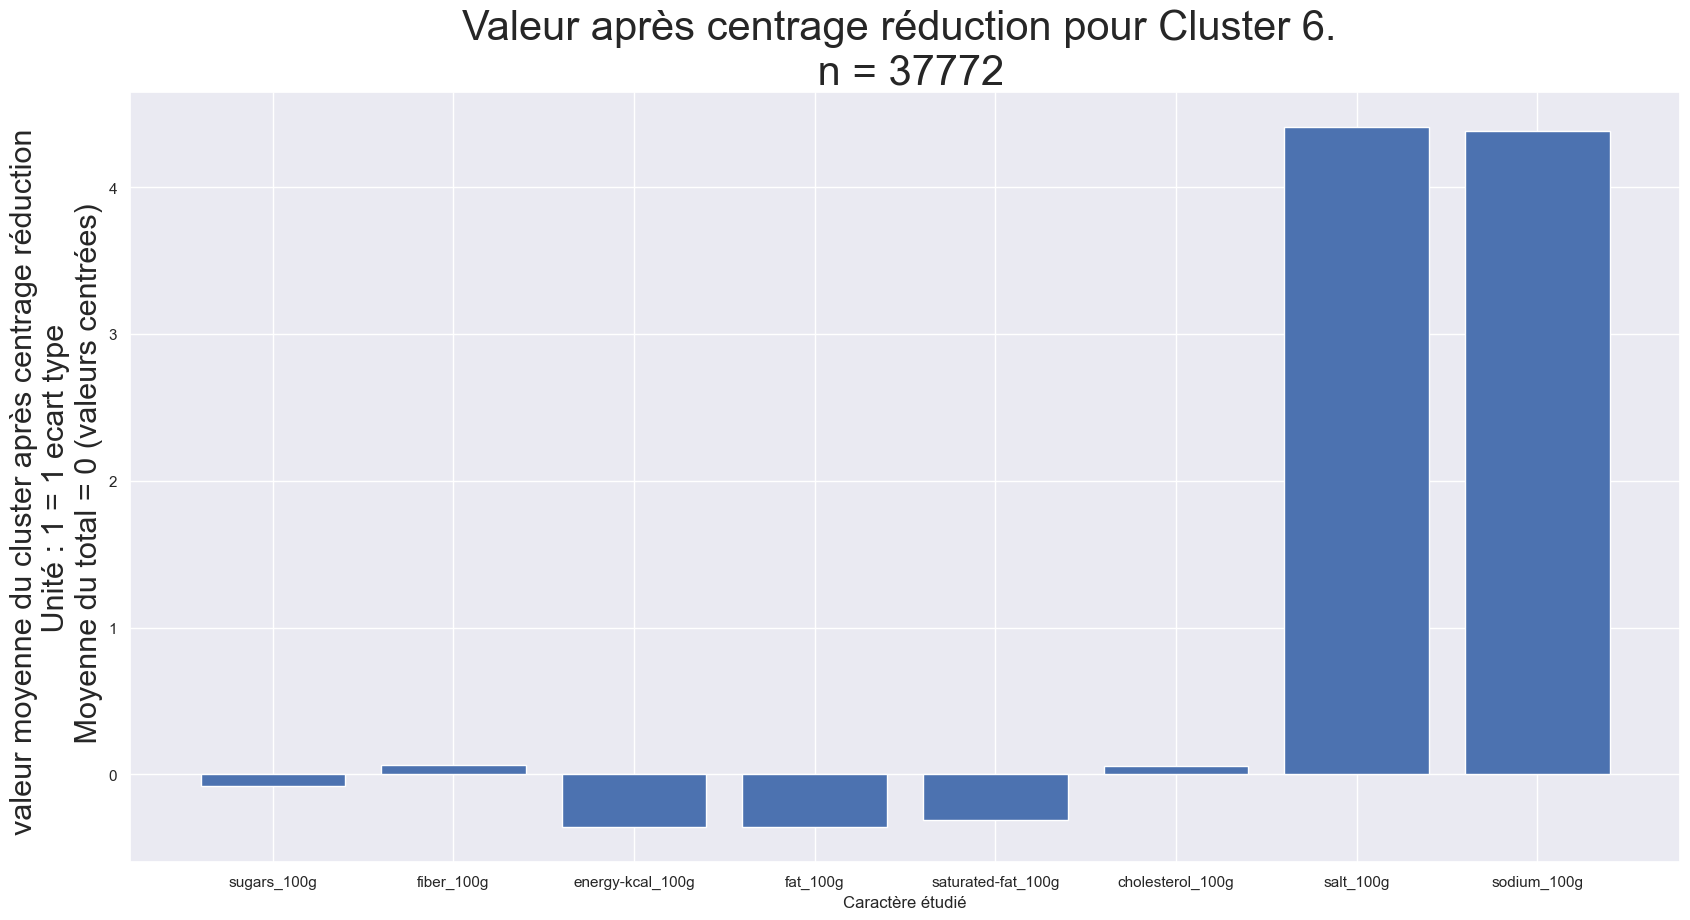

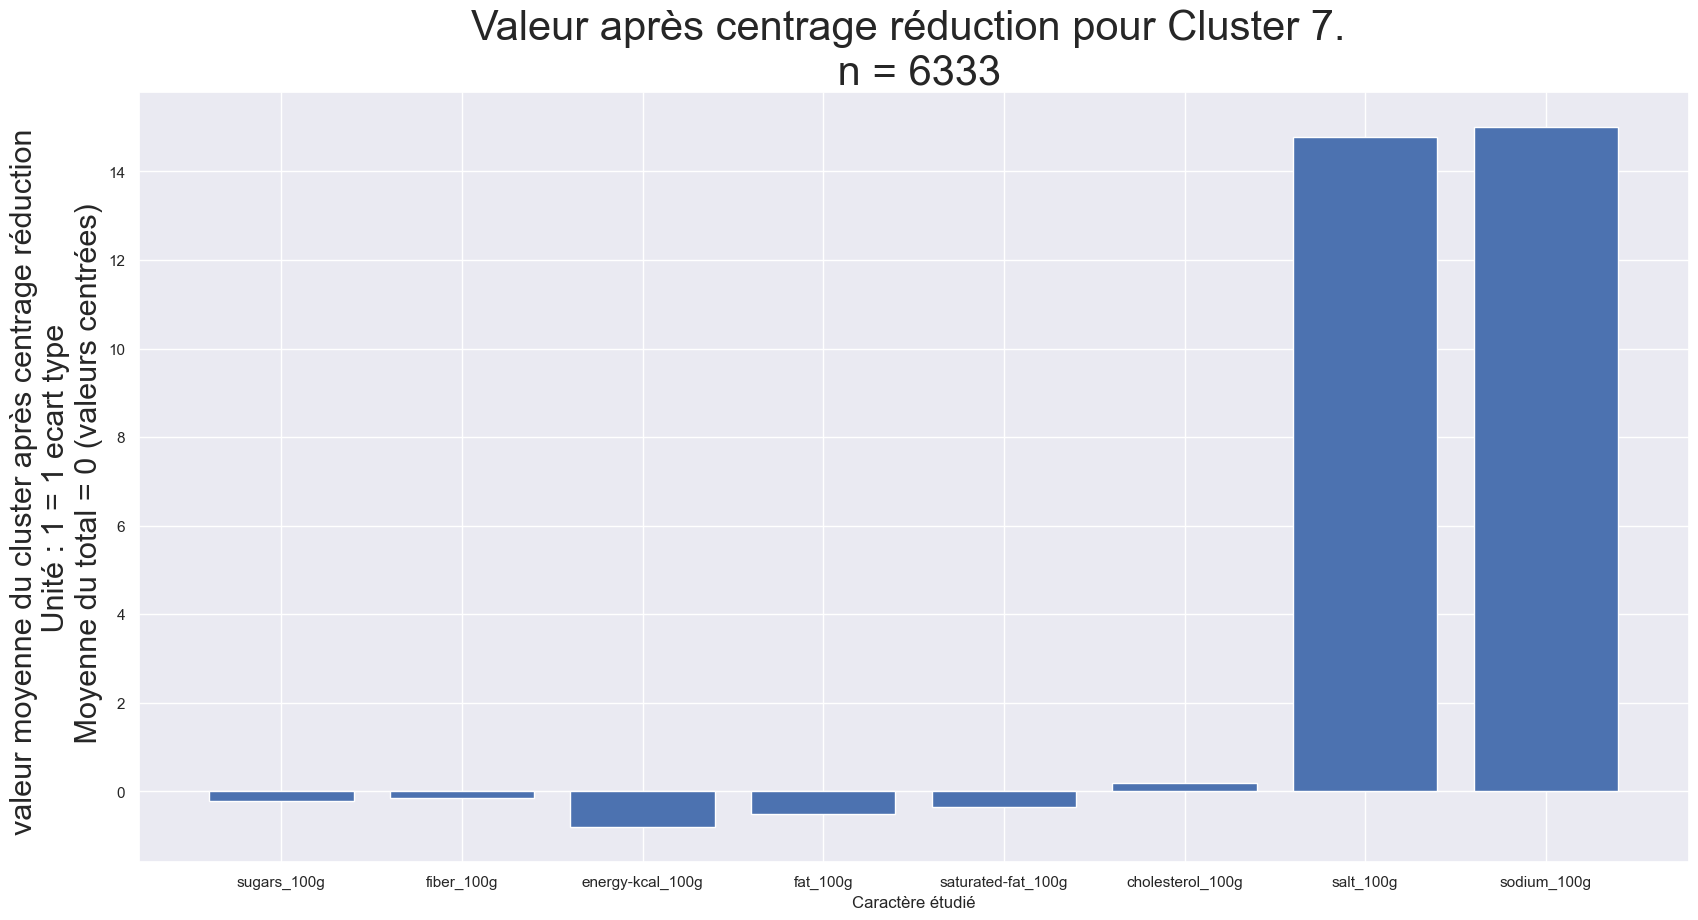

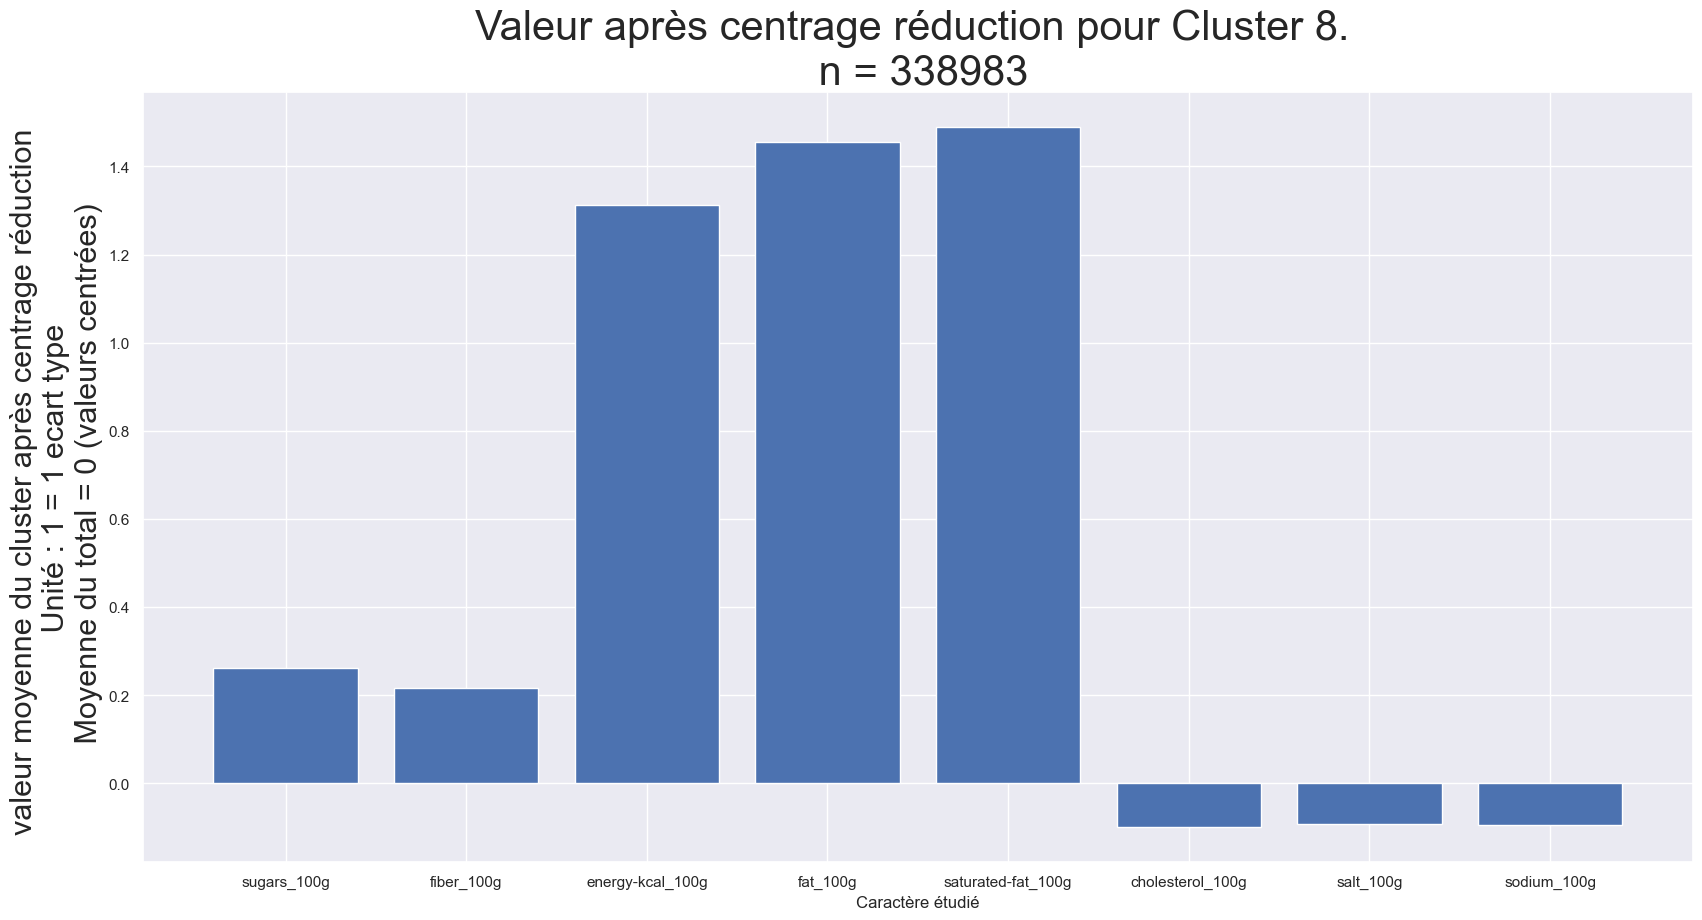

In [60]:
for i in range(data.groupby('Cluser Kmean').mean().T.columns.shape[0]):
    display(histo_comparaison_cluster_cr(i))

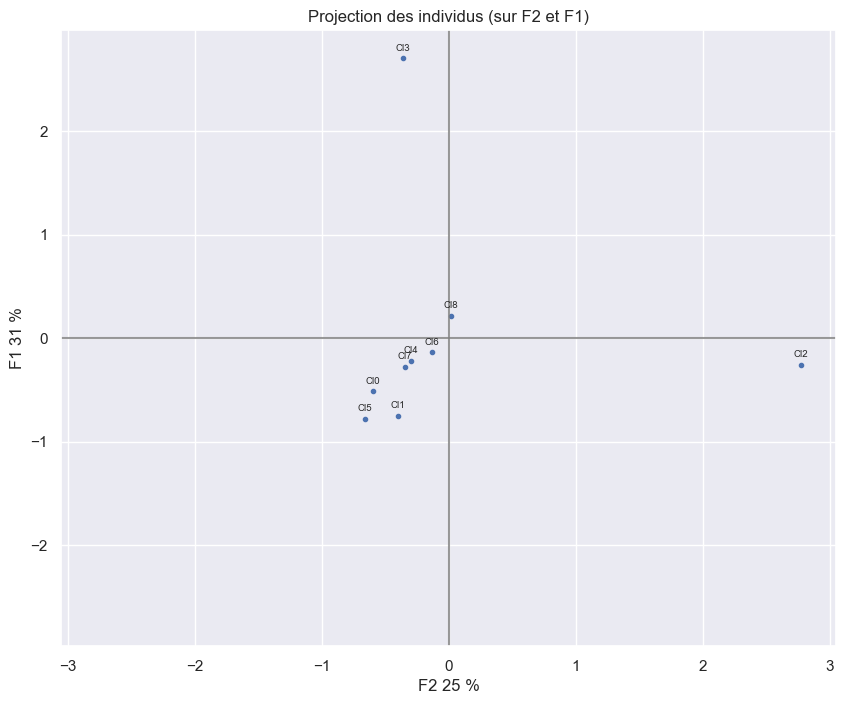

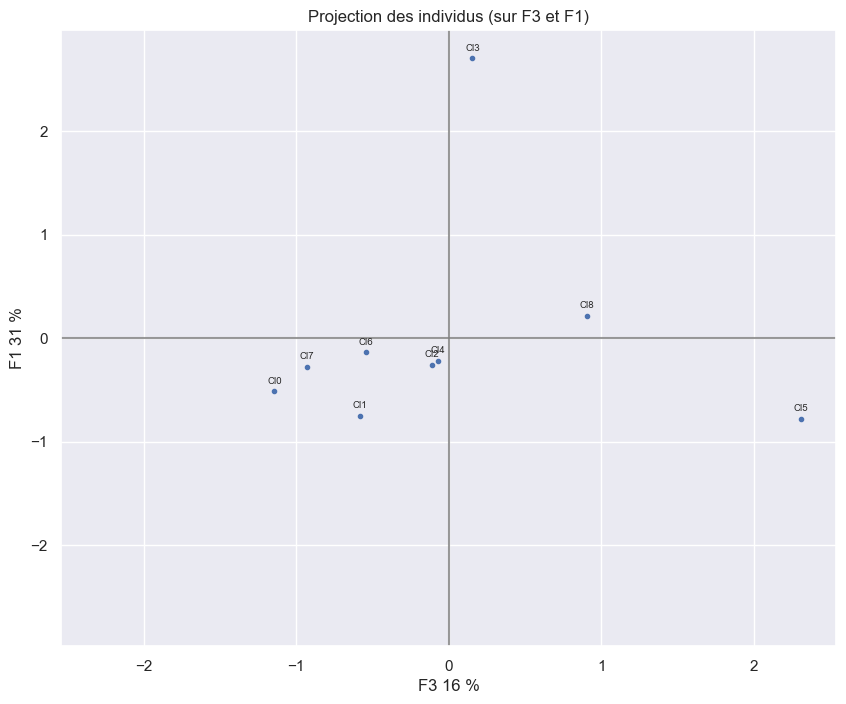

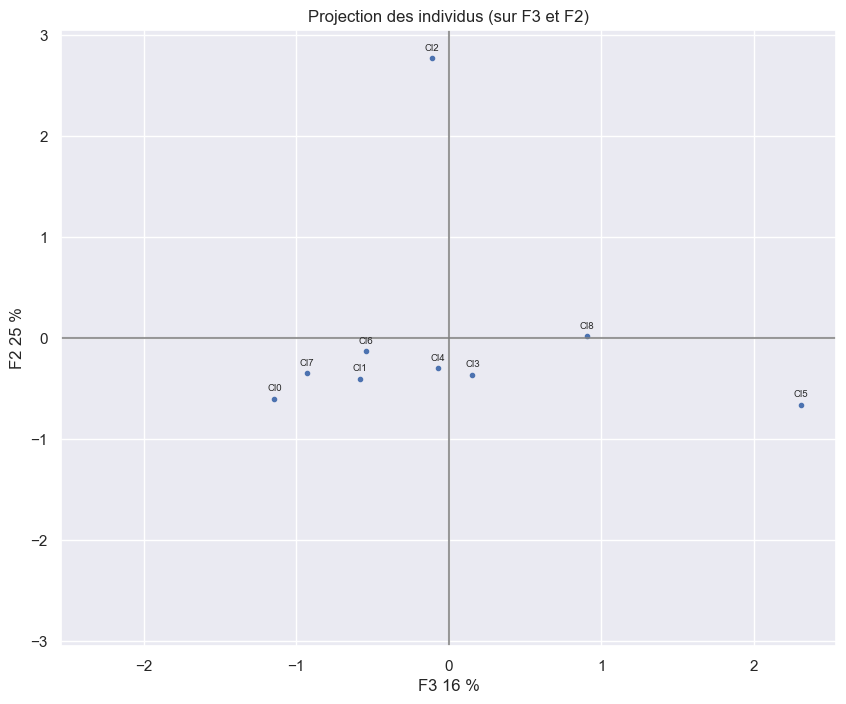

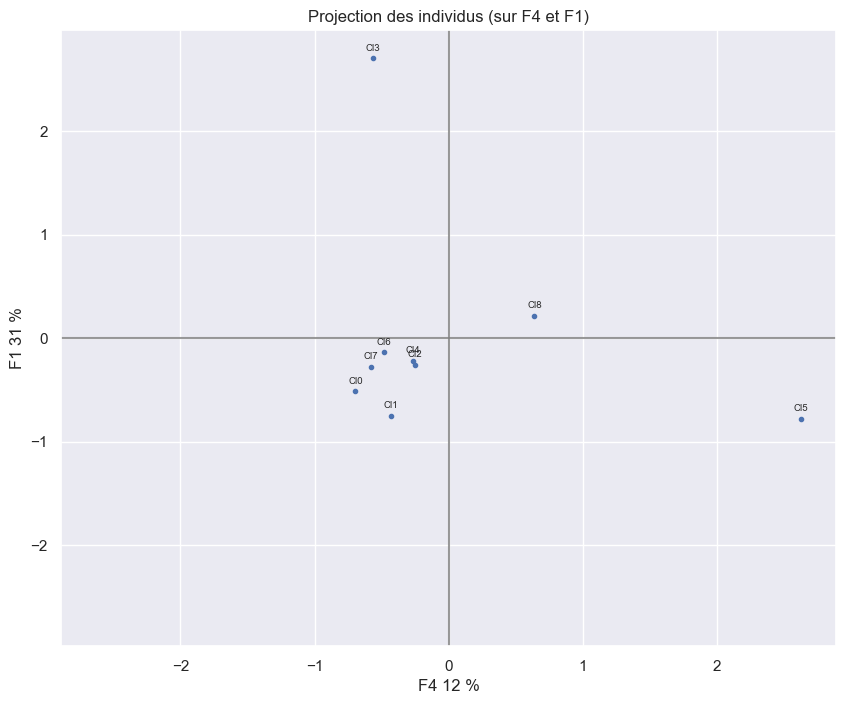

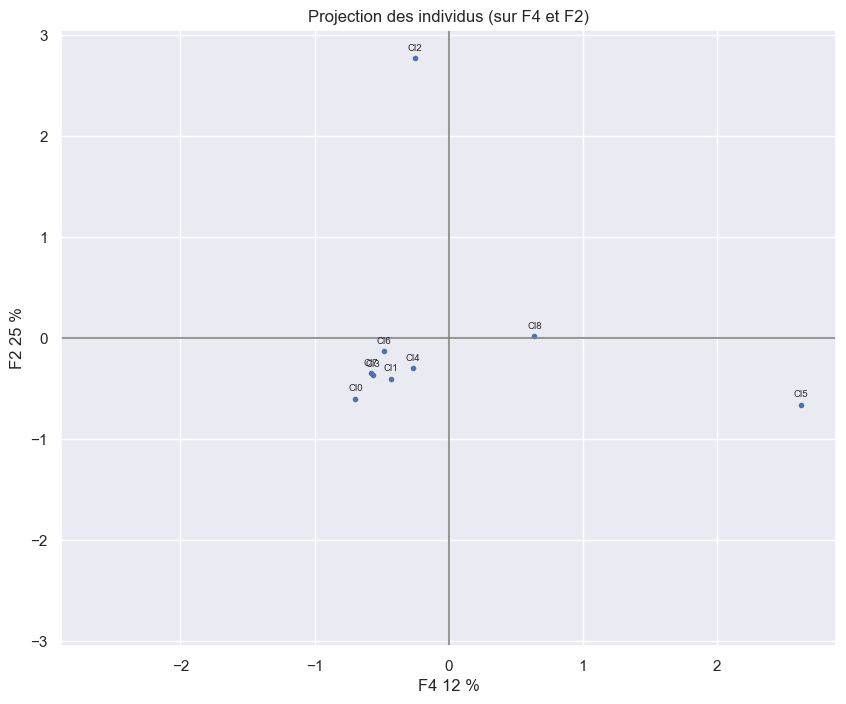

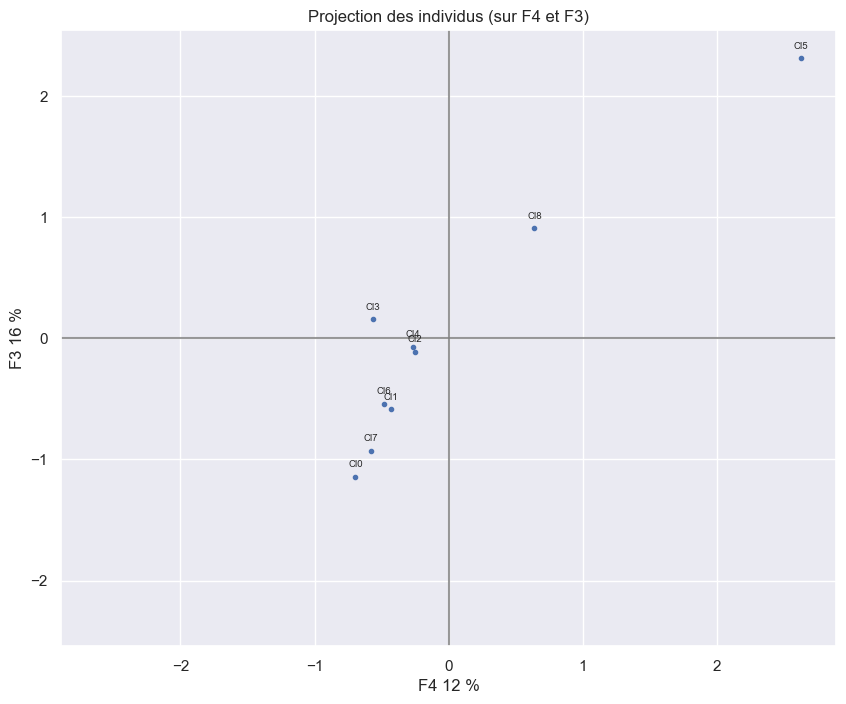

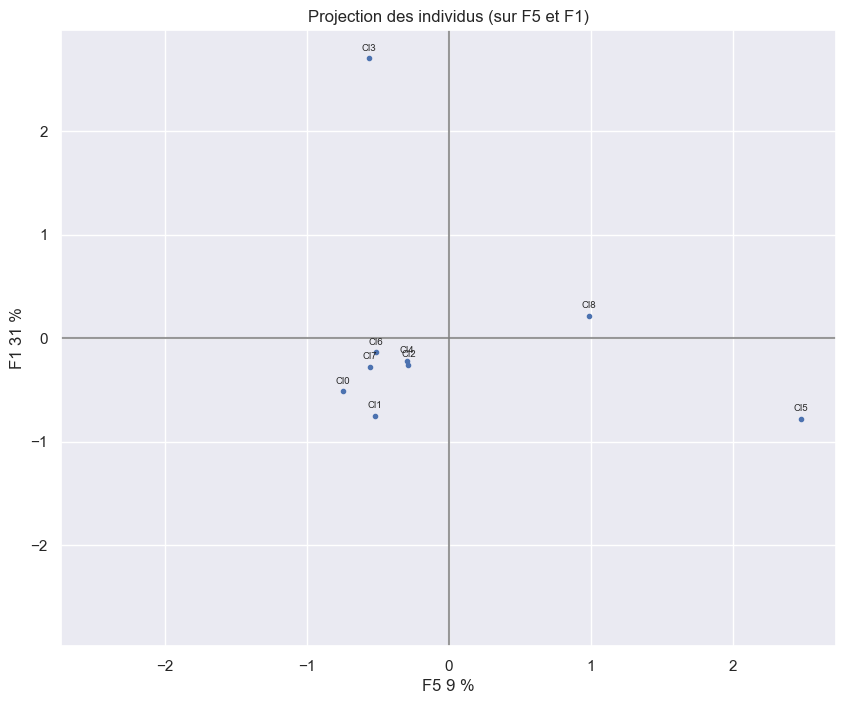

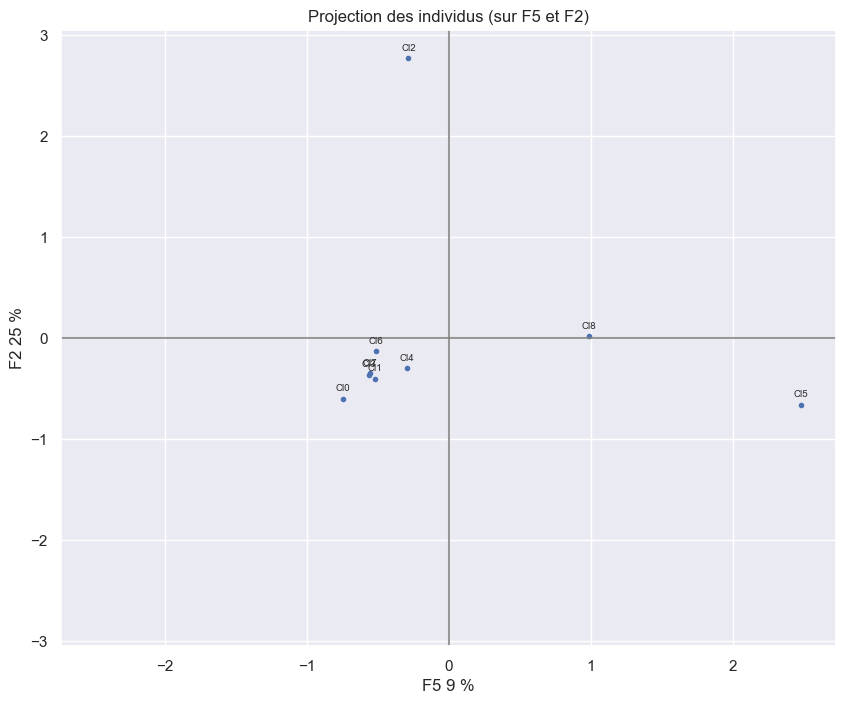

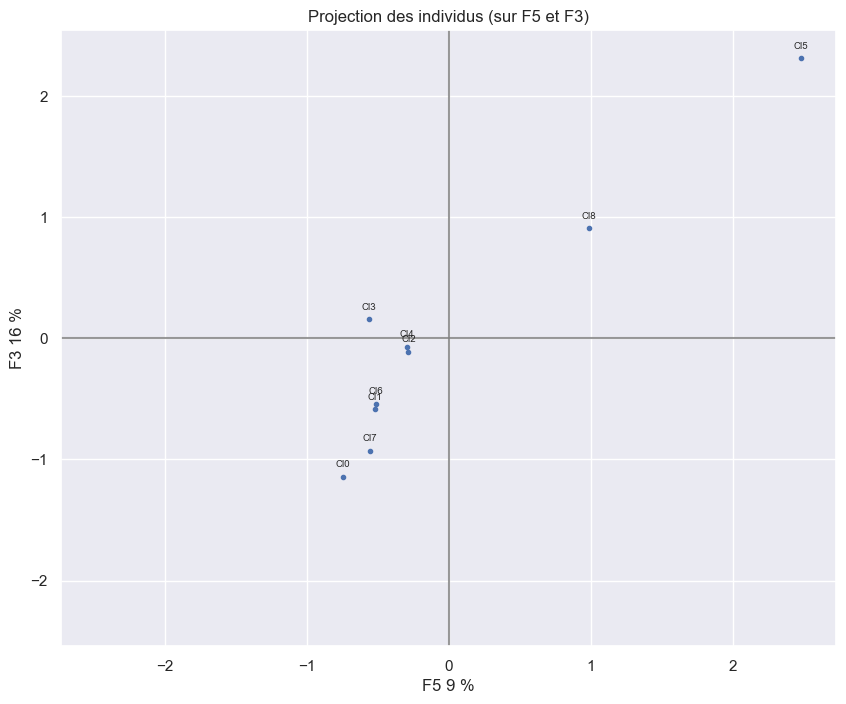

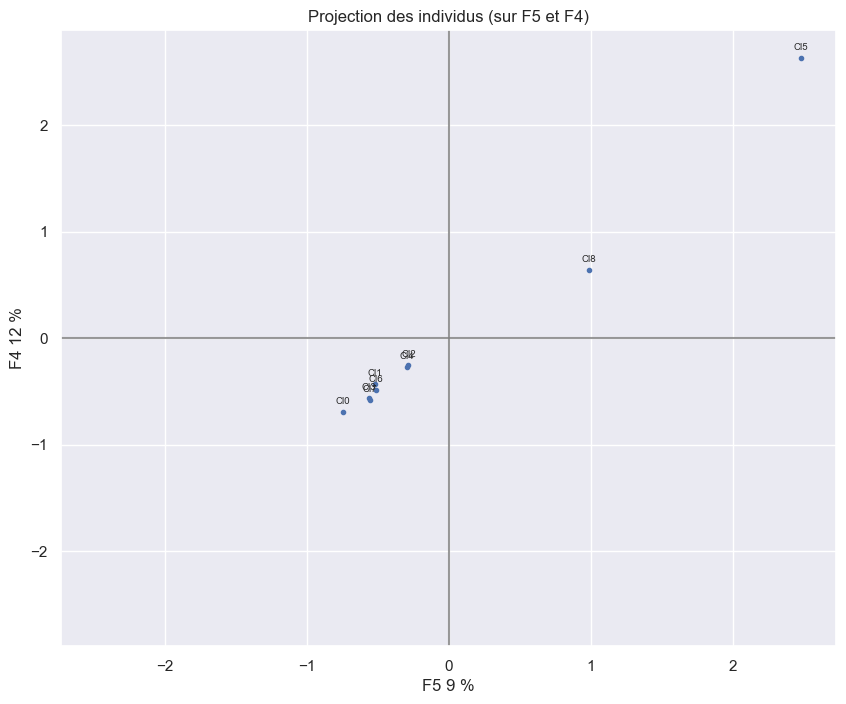

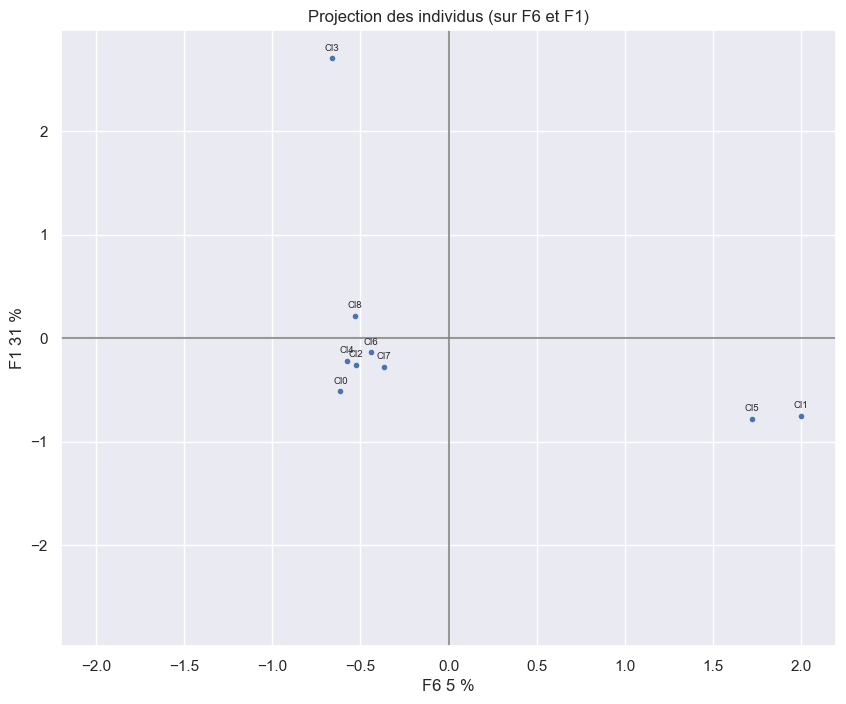

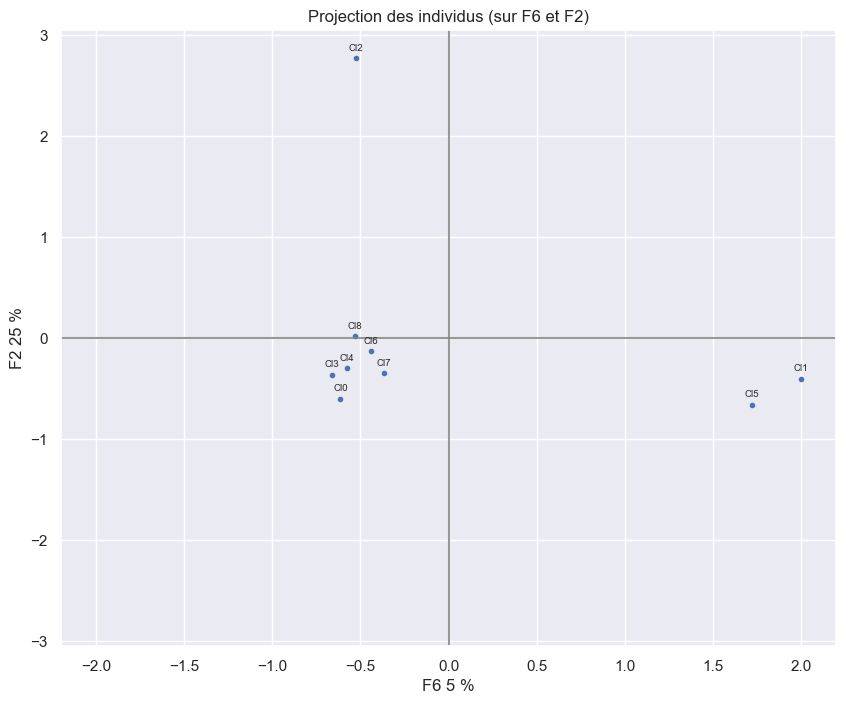

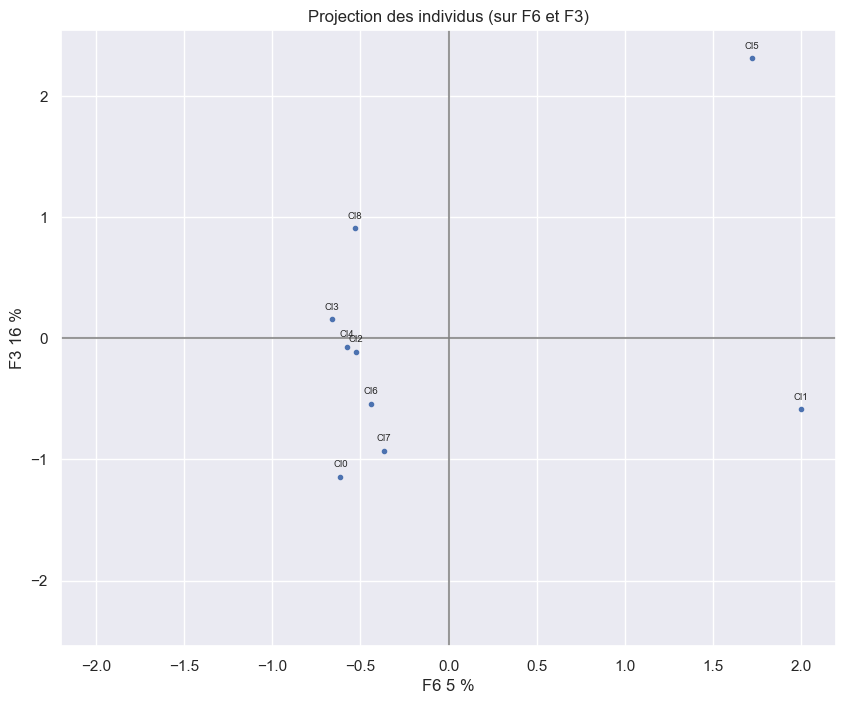

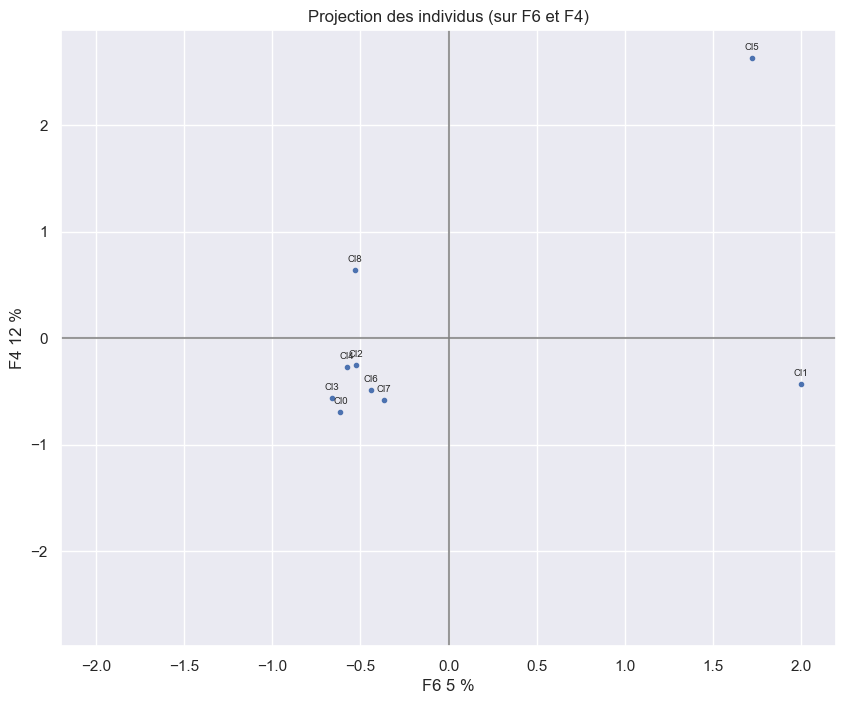

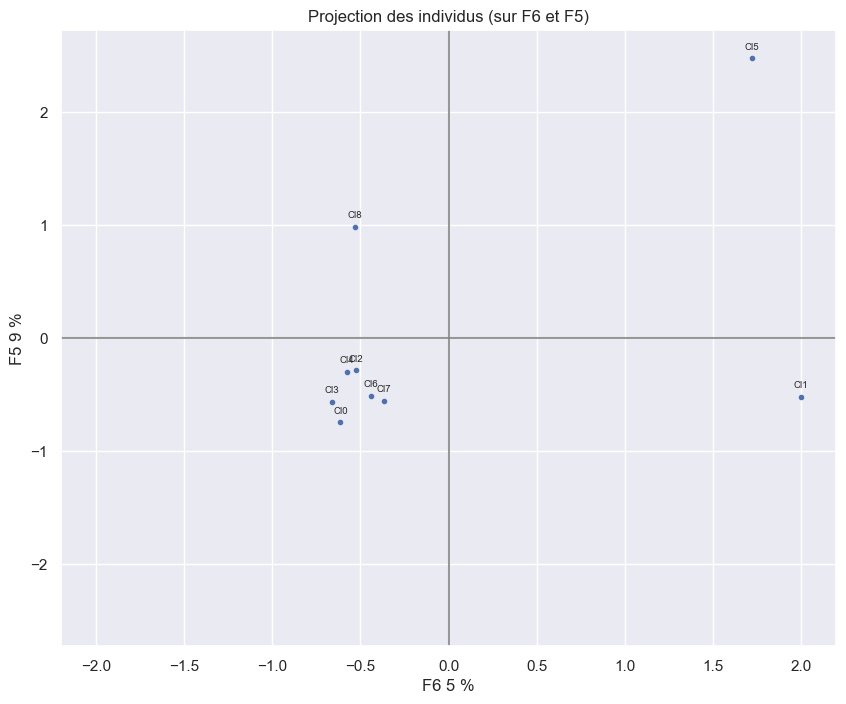

In [61]:
# Refaisons l'APC sur les centroïdes des clusters. Nous gardons bien sur l'APC faite sur l'ensemble des données, donc la heatmap sera la même
# Que en haut du notebook. Projetons simplement nos centroides sur nos plans :X_proj = pca.transform(kmeans.cluster_centers_)
scaler.fit(kmeans.cluster_centers_)
X_proj_centroide = scaler.transform(kmeans.cluster_centers_)
for i in range (0,n_components):
    for j in range(0,i+1):
        if i != j:
            x_y = [i,j]
            display_factorial_planes(X_proj_centroide, x_y, pca, labels = [f'Cl{i}' for i in range(nb_cluster)])

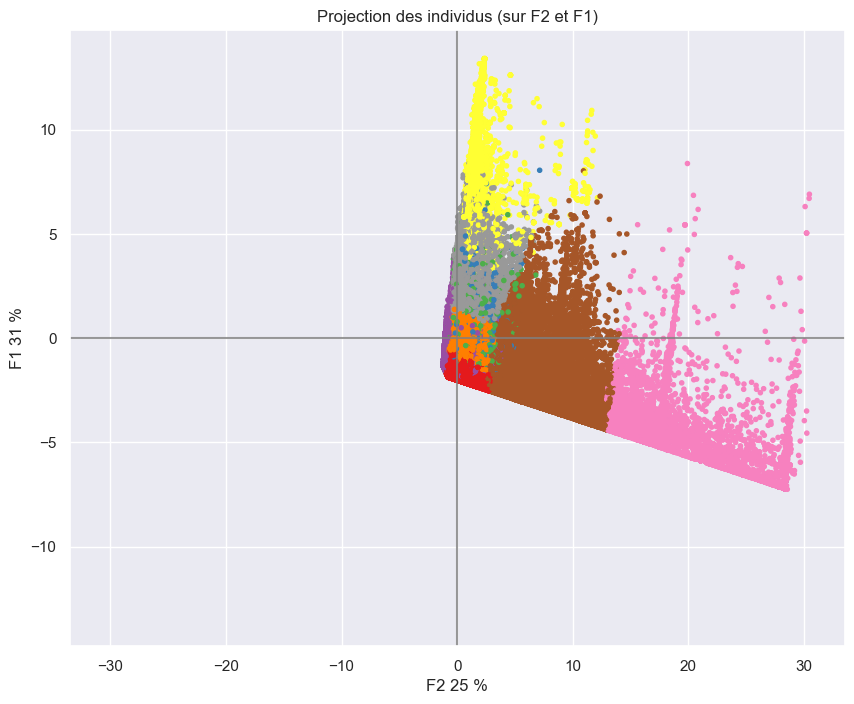

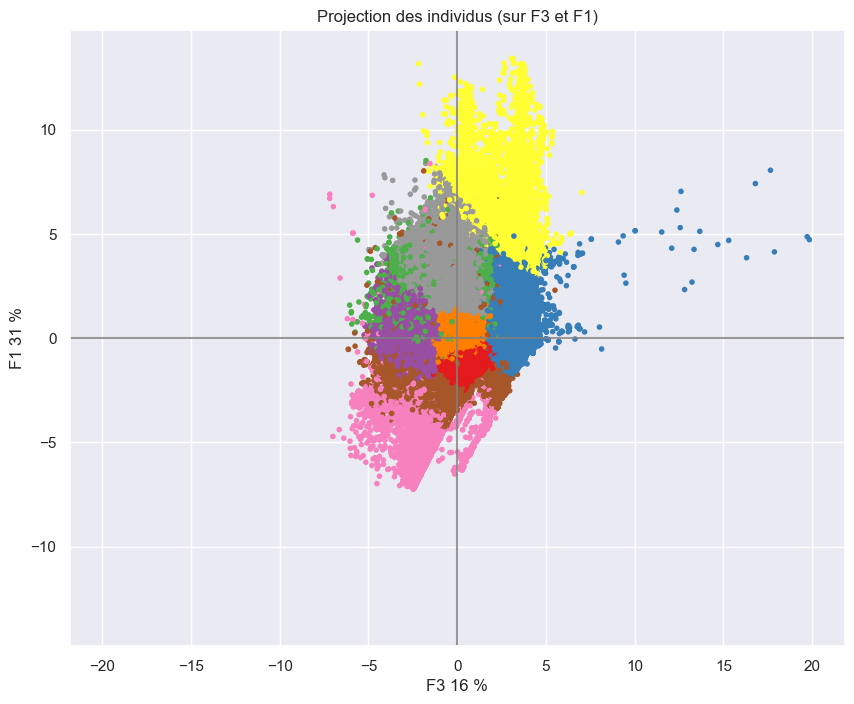

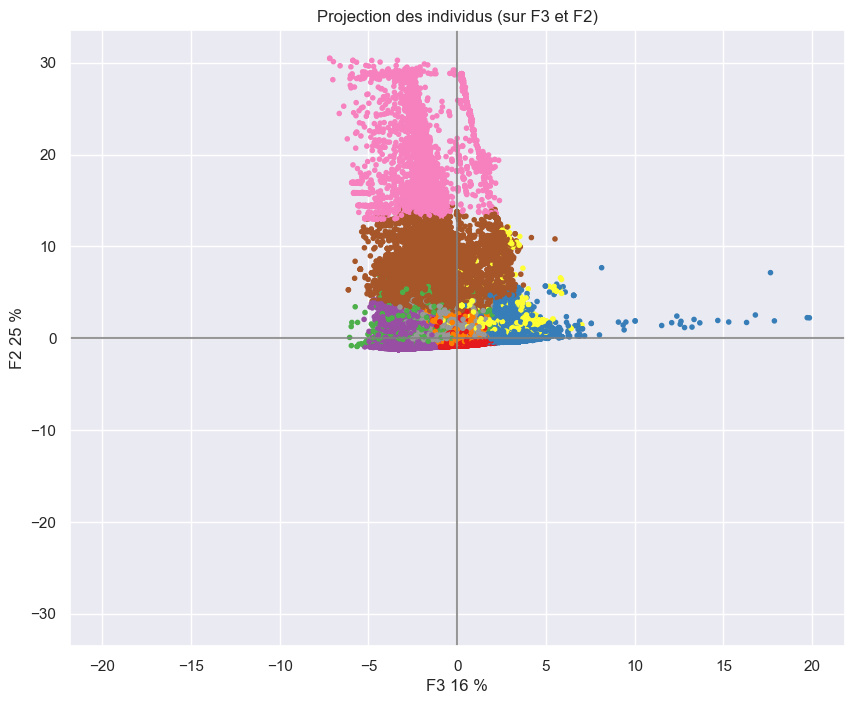

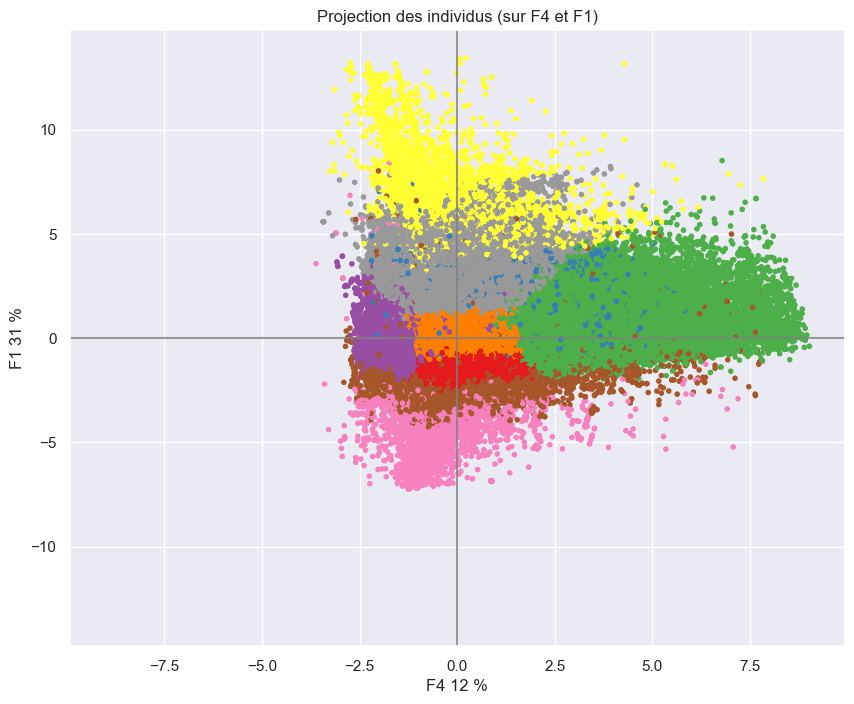

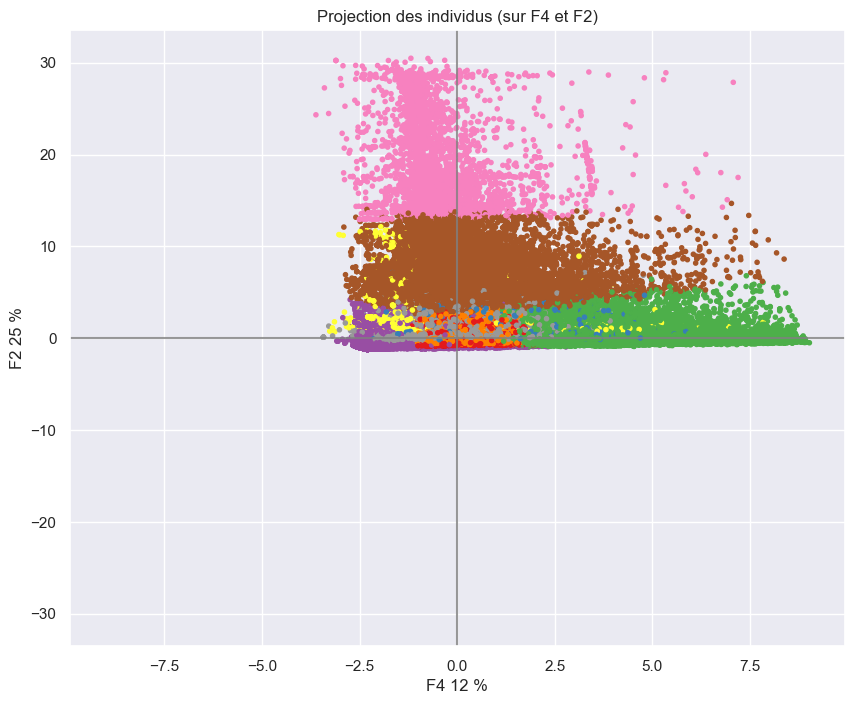

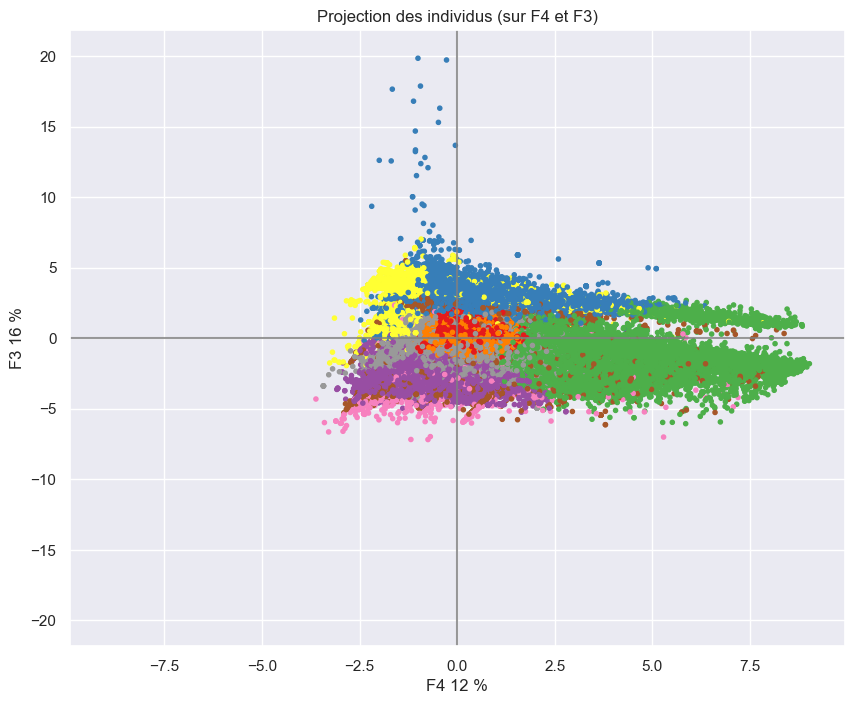

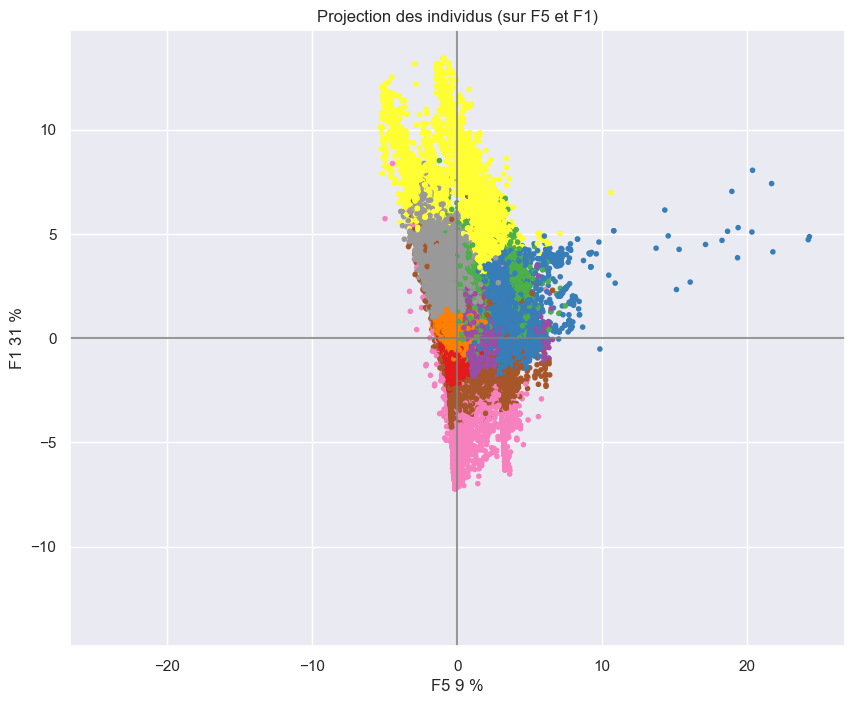

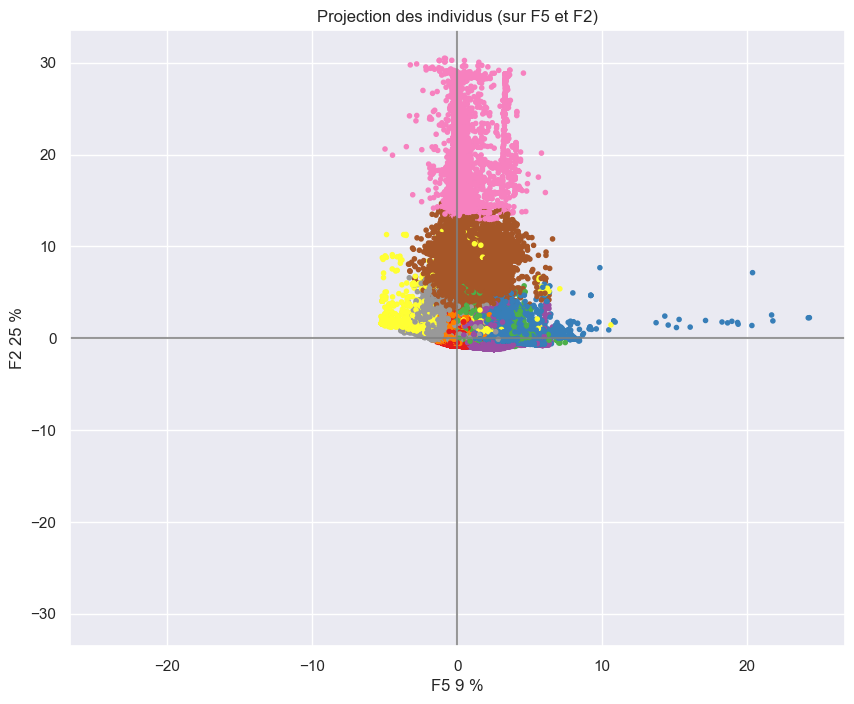

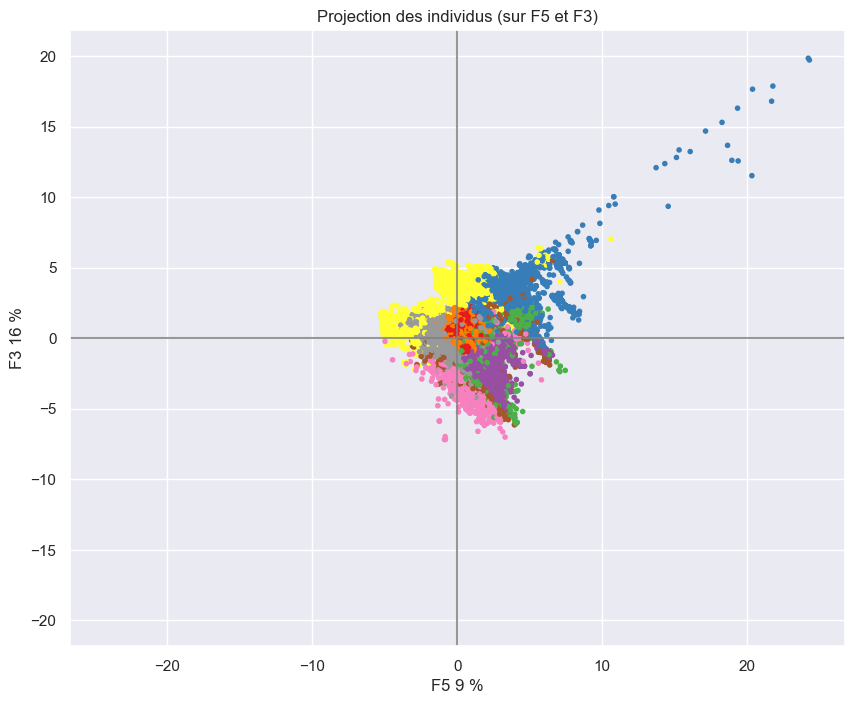

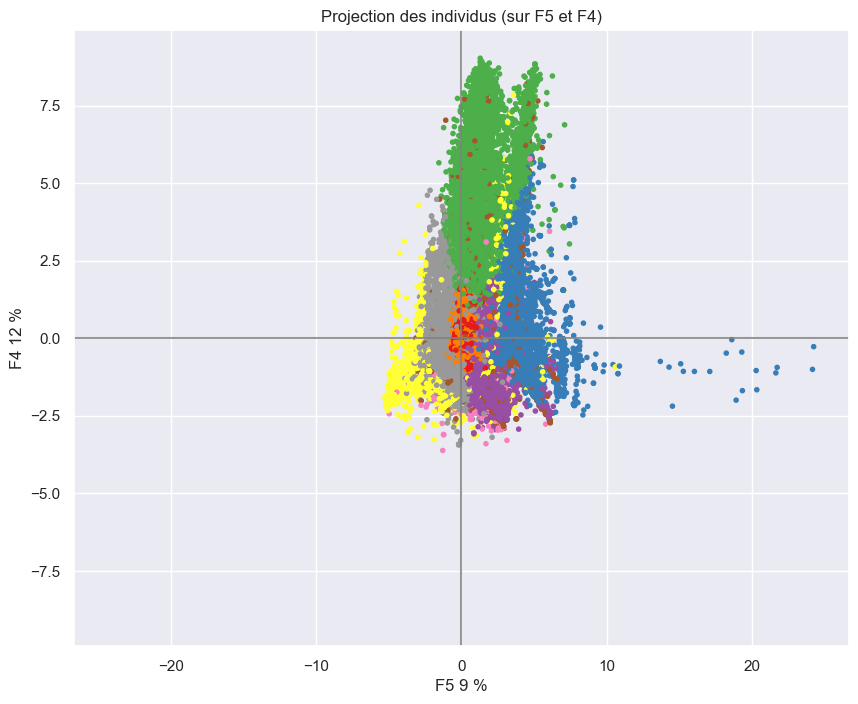

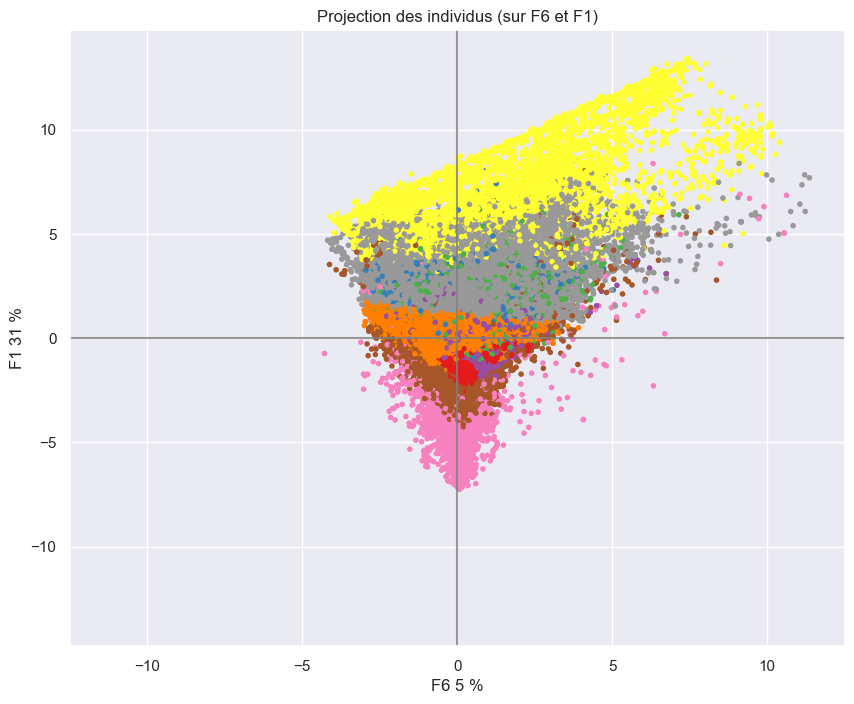

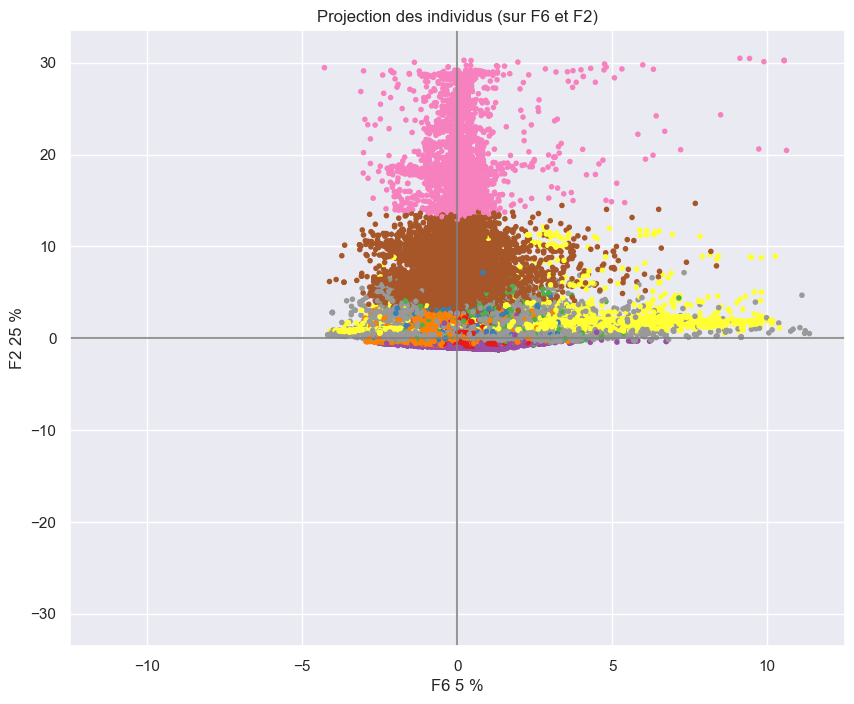

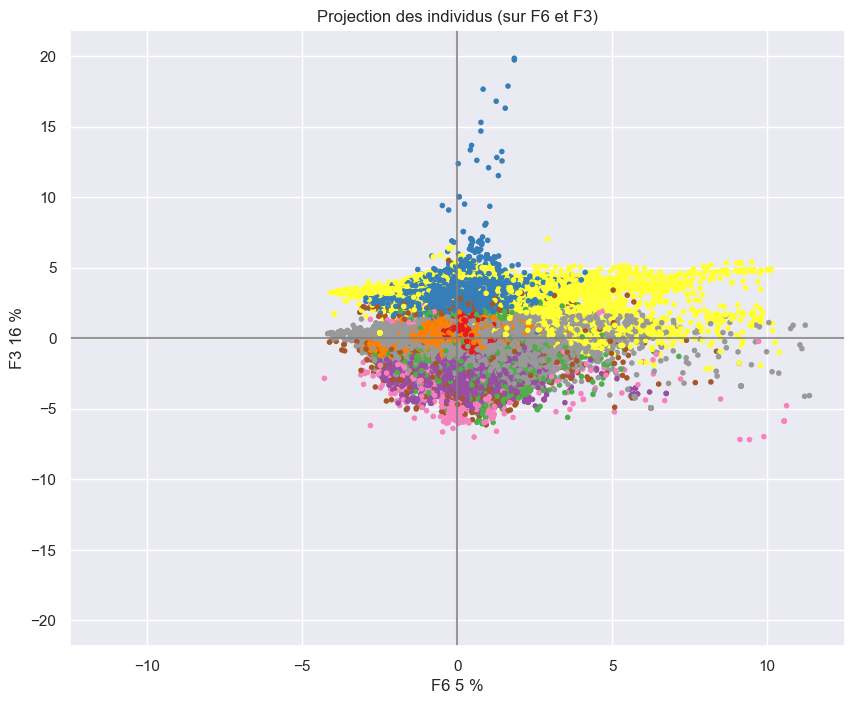

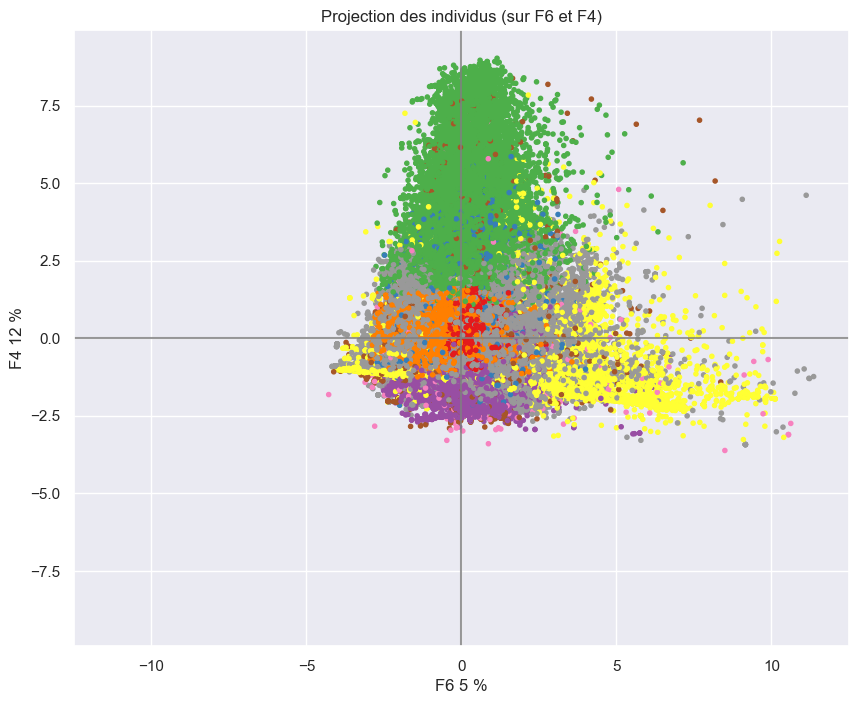

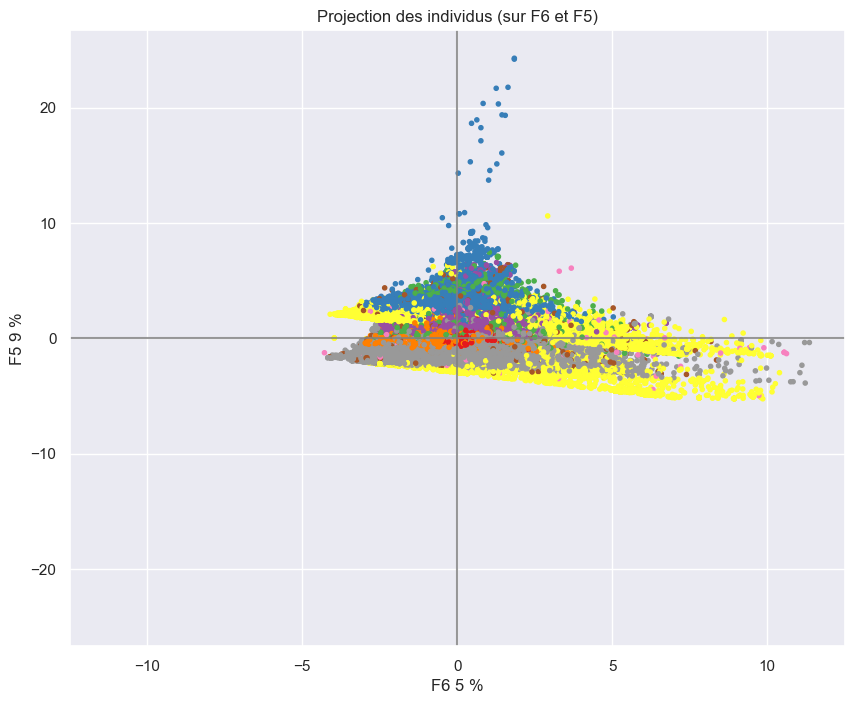

In [62]:
# Projetons maintenant tout les nuages de points de chaque cluster 
for i in range (0,n_components):
    for j in range(0,i+1):
        if i != j:
            x_y = [i,j]
            display_factorial_planes(X_proj,
                                     x_y,
                                     pca,
                                     clusters = kmeans.labels_)

In [63]:
# A supposer un avis "médical" en vue d'adapter les valeurs maximales conseillés dans un repas, rangé dans une liste de 
# 7 valeurs dans "L" permanante dans l'application (modifiable), on setup un dictionnaire de valeur maximale PAR REPAS (pas par 100g)
def valeurs_a_setup (L):
    d = {'sugars_100g' : L[0], 
     'fiber_100g' : L[1], 
     'energy-kcal_100g' : L[2], 
     'fat_100g' : L[3], 
     'saturated-fat_100g' : L[4], 
     'cholesterol_100g' : L[5] ,
     'salt_100g' : L[6] ,
     'sodium_100g' : L[7]}
    return d

In [64]:
# Valeurs par défaut
L=[10,10,10,10,10,10,10,10]

In [65]:
# Paramètres fixe de l'application, en plus du dataset de base.
s = {'sugars_100g' : "de sucre.\n", 
     'fiber_100g' : "de fibres.\n", 
     'energy-kcal_100g' : "de calories.\n", 
     'fat_100g' : "de gras.\n", 
     'saturated-fat_100g' : "d'acide gras saturés.\n", 
     'cholesterol_100g' : "de cholesterol.\n" ,
     'salt_100g' : "de sel.\n" ,
     'sodium_100g' : "de sodium.\n"}

Liste_composant = ['sugars_100g', 
                   'fiber_100g',
                   'energy-kcal_100g', 
                   'fat_100g', 
                   'saturated-fat_100g', 
                   'cholesterol_100g',
                   'salt_100g',
                   'sodium_100g']

d = valeurs_a_setup(L)

In [66]:
# A chaque scan de produit (donc une entrée sous forme de code, première colonne de notre dataset)
# sera demandé le poid préparé pour le repas et créera ainsi une liste de chacun des ingrédient
def checking(liste_produit, liste_poid):
    liste_problemes = []
    for k in Liste_composant:
        sumcomposant = 0
        for i in range(len(liste_produit)):
            sumcomposant += data.loc[(data['code'] == liste_produit[i]),k].values[0]*liste_poid[i]/100
        if sumcomposant >= d[k]:
            liste_problemes.append(k)
    string = ''
    for j in liste_problemes:
        string += f'/!\ Repas possédant trop {s[j]}'
    return print(string)

In [67]:
checking(['2431564037788','2431570031169'],[100,100])

/!\ Repas possédant trop de fibres.
/!\ Repas possédant trop de calories.
/!\ Repas possédant trop de gras.
/!\ Repas possédant trop d'acide gras saturés.
/!\ Repas possédant trop de sel.

